In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR

### Step 1: Preparation and Analyzing the Dataset.

In [2]:
df = pd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/Electric_Vehicle_Population_Data.csv")

In [3]:
df

VIN (1-10)     County        City State  Postal Code  Model Year  \
0       3C3CFFGE4E     Yakima      Yakima    WA      98902.0        2014   
1       5YJXCBE40H   Thurston     Olympia    WA      98513.0        2017   
2       3MW39FS03P       King      Renton    WA      98058.0        2023   
3       7PDSGABA8P  Snohomish     Bothell    WA      98012.0        2023   
4       5YJ3E1EB8L       King        Kent    WA      98031.0        2020   
...            ...        ...         ...   ...          ...         ...   
166795  3FA6P0SU4D    Spokane     Spokane    WA      99223.0        2013   
166796  5YJYGDEE5M       King   Sammamish    WA      98074.0        2021   
166797  7SAYGDEE5N  Snohomish    Mukilteo    WA      98275.0        2022   
166798  1G1RH6E43D      Lewis   Mossyrock    WA      98564.0        2013   
166799  5YJSA1E27H     Pierce  Gig Harbor    WA      98332.0        2017   

             Make    Model                   Electric Vehicle Type  \
0            FIAT      500          Battery Electric Vehicle (BEV)   
1           TESLA  MODEL X          Battery Electric Vehicle (BEV)   
2             BMW     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3          RIVIAN      R1S          Battery Electric Vehicle (BEV)   
4           TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
...           ...      ...                                     ...   
166795       FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
166796      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166797      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166798  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
166799      TESLA  MODEL S          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              87   
1                 Clean Alternative Fuel Vehicle Eligible             200   
2                   Not eligible due to low battery range              20   
3       Eligibility unknown as battery range has not b...               0   
4                 Clean Alternative Fuel Vehicle Eligible             322   
...                                                   ...             ...   
166795              Not eligible due to low battery range              19   
166796  Eligibility unknown as battery range has not b...               0   
166797  Eligibility unknown as battery range has not b...               0   
166798            Clean Alternative Fuel Vehicle Eligible              38   
166799            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0         1593721   
1               0                   2.0       257167501   
2               0                  11.0       224071816   
3               0                  21.0       260084653   
4               0                  33.0       253771913   
...           ...                   ...             ...   
166795          0                   6.0       239527123   
166796          0                  45.0       148715479   
166797          0                  21.0       220504406   
166798          0                  20.0       156418475   
166799          0                  26.0       169045789   

                       Vehicle Location  \
0        POINT (-120.524012 46.5973939)   
1          POINT (-122.817545 46.98876)   
2       POINT (-122.1298876 47.4451257)   
3           POINT (-122.1873 47.820245)   
4       POINT (-122.2012521 47.3931814)   
...                                 ...   
166795     POINT (-117.369705 47.62637)   
166796  POINT (-122.0313266 47.6285782)   
166797     POINT (-122.299965 47.94171)   
166798   POINT (-122.487535 46.5290135)   
166799    POINT (-122.589645 47.342345)   

                                         Electric Utility  2020 Census Tract  
0                       

In [4]:
df1 = df.drop(columns=['VIN (1-10)', 'City', 'State', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'])

In [5]:
df1

County  Postal Code  Model Year       Make    Model  \
0          Yakima      98902.0        2014       FIAT      500   
1        Thurston      98513.0        2017      TESLA  MODEL X   
2            King      98058.0        2023        BMW     330E   
3       Snohomish      98012.0        2023     RIVIAN      R1S   
4            King      98031.0        2020      TESLA  MODEL 3   
...           ...          ...         ...        ...      ...   
166795    Spokane      99223.0        2013       FORD   FUSION   
166796       King      98074.0        2021      TESLA  MODEL Y   
166797  Snohomish      98275.0        2022      TESLA  MODEL Y   
166798      Lewis      98564.0        2013  CHEVROLET     VOLT   
166799     Pierce      98332.0        2017      TESLA  MODEL S   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2       Plug-in Hybrid Electric Vehicle (PHEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
166795  Plug-in Hybrid Electric Vehicle (PHEV)   
166796          Battery Electric Vehicle (BEV)   
166797          Battery Electric Vehicle (BEV)   
166798  Plug-in Hybrid Electric Vehicle (PHEV)   
166799          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              87   
1                 Clean Alternative Fuel Vehicle Eligible             200   
2                   Not eligible due to low battery range              20   
3       Eligibility unknown as battery range has not b...               0   
4                 Clean Alternative Fuel Vehicle Eligible             322   
...                                                   ...             ...   
166795              Not eligible due to low battery range              19   
166796  Eligibility unknown as battery range has not b...               0   
166797  Eligibility unknown as battery range has not b...               0   
166798            Clean Alternative Fuel Vehicle Eligible              38   
166799            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  \
0               0                  14.0   
1               0                   2.0   
2               0                  11.0   
3               0                  21.0   
4               0                  33.0   
...           ...                   ...   
166795          0                   6.0   
166796          0                  45.0   
166797          0                  21.0   
166798          0                  20.0   
166799          0                  26.0   

                                         Electric Utility  
0                                              PACIFICORP  
1                                  PUGET SOUND ENERGY INC  
2           PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
3                                  PUGET SOUND ENERGY INC  
4           PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
...                                                   ...  
166795  BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...  
166796      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
166797                             PUGET SOUND ENERGY INC  
166798  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...  
166799  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...  

[166800 rows x 11 columns]

In [6]:
len(df1.columns)

11

In [7]:
df1.shape

(166800, 11)

In [8]:
df1.head()

County  Postal Code  Model Year    Make    Model  \
0     Yakima      98902.0        2014    FIAT      500   
1   Thurston      98513.0        2017   TESLA  MODEL X   
2       King      98058.0        2023     BMW     330E   
3  Snohomish      98012.0        2023  RIVIAN      R1S   
4       King      98031.0        2020   TESLA  MODEL 3   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1          Battery Electric Vehicle (BEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible             200   
2              Not eligible due to low battery range              20   
3  Eligibility unknown as battery range has not b...               0   
4            Clean Alternative Fuel Vehicle Eligible             322   

   Base MSRP  Legislative District  \
0          0                  14.0   
1          0                   2.0   
2          0                  11.0   
3          0                  21.0   
4          0                  33.0   

                                Electric Utility  
0                                     PACIFICORP  
1                         PUGET SOUND ENERGY INC  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
3                         PUGET SOUND ENERGY INC  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

In [9]:
# Unique values of all the columns in the data set.

cols = df1.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
Unique_Values()

There are 187 nos of unique values in County column out of 166800
There are 836 nos of unique values in Postal Code column out of 166800
There are 22 nos of unique values in Model Year column out of 166800
There are 39 nos of unique values in Make column out of 166800
There are 138 nos of unique values in Model column out of 166800
There are 2 nos of unique values in Electric Vehicle Type column out of 166800
There are 3 nos of unique values in Clean Alternative Fuel Vehicle (CAFV) Eligibility column out of 166800
There are 102 nos of unique values in Electric Range column out of 166800
There are 31 nos of unique values in Base MSRP column out of 166800
There are 49 nos of unique values in Legislative District column out of 166800
There are 76 nos of unique values in Electric Utility column out of 166800


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 11 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             166795 non-null  object 
 1   Postal Code                                        166795 non-null  float64
 2   Model Year                                         166800 non-null  int64  
 3   Make                                               166800 non-null  object 
 4   Model                                              166800 non-null  object 
 5   Electric Vehicle Type                              166800 non-null  object 
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  166800 non-null  object 
 7   Electric Range                                     166800 non-null  int64  
 8   Base MSRP                                          166800 non-null  int64 

In [11]:
# to view the statistical values of numerical columns

df1.describe().style.background_gradient(cmap='cividis')

### step 2 : Handling the missing values.

In [12]:
df1.isnull().sum()

County                                                 5
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
Electric Utility                                       5
dtype: int64

In [13]:
# to view the missing percentages

missing_percentages=df1.isna().sum().sort_values(ascending=False)/len(df1)
missing_percentages

Legislative District                                 0.002158
County                                               0.000030
Postal Code                                          0.000030
Electric Utility                                     0.000030
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
dtype: float64

In [14]:
missing_percentages[missing_percentages !=1]

Legislative District                                 0.002158
County                                               0.000030
Postal Code                                          0.000030
Electric Utility                                     0.000030
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
dtype: float64

<Axes: >

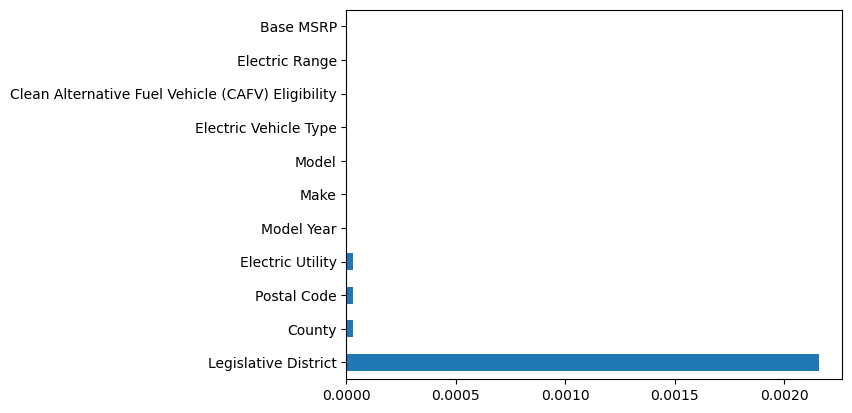

In [15]:
# To plot the missing percentage of the columns in the data set.

missing_percentages[missing_percentages != 1].plot(kind = 'barh')

In [16]:
# Visualize the missing data in percentages using basic numerical equation.

data_missing = df1.isnull().sum()*100/len(df1)
data_missing

County                                               0.002998
Postal Code                                          0.002998
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.215827
Electric Utility                                     0.002998
dtype: float64

<Axes: >

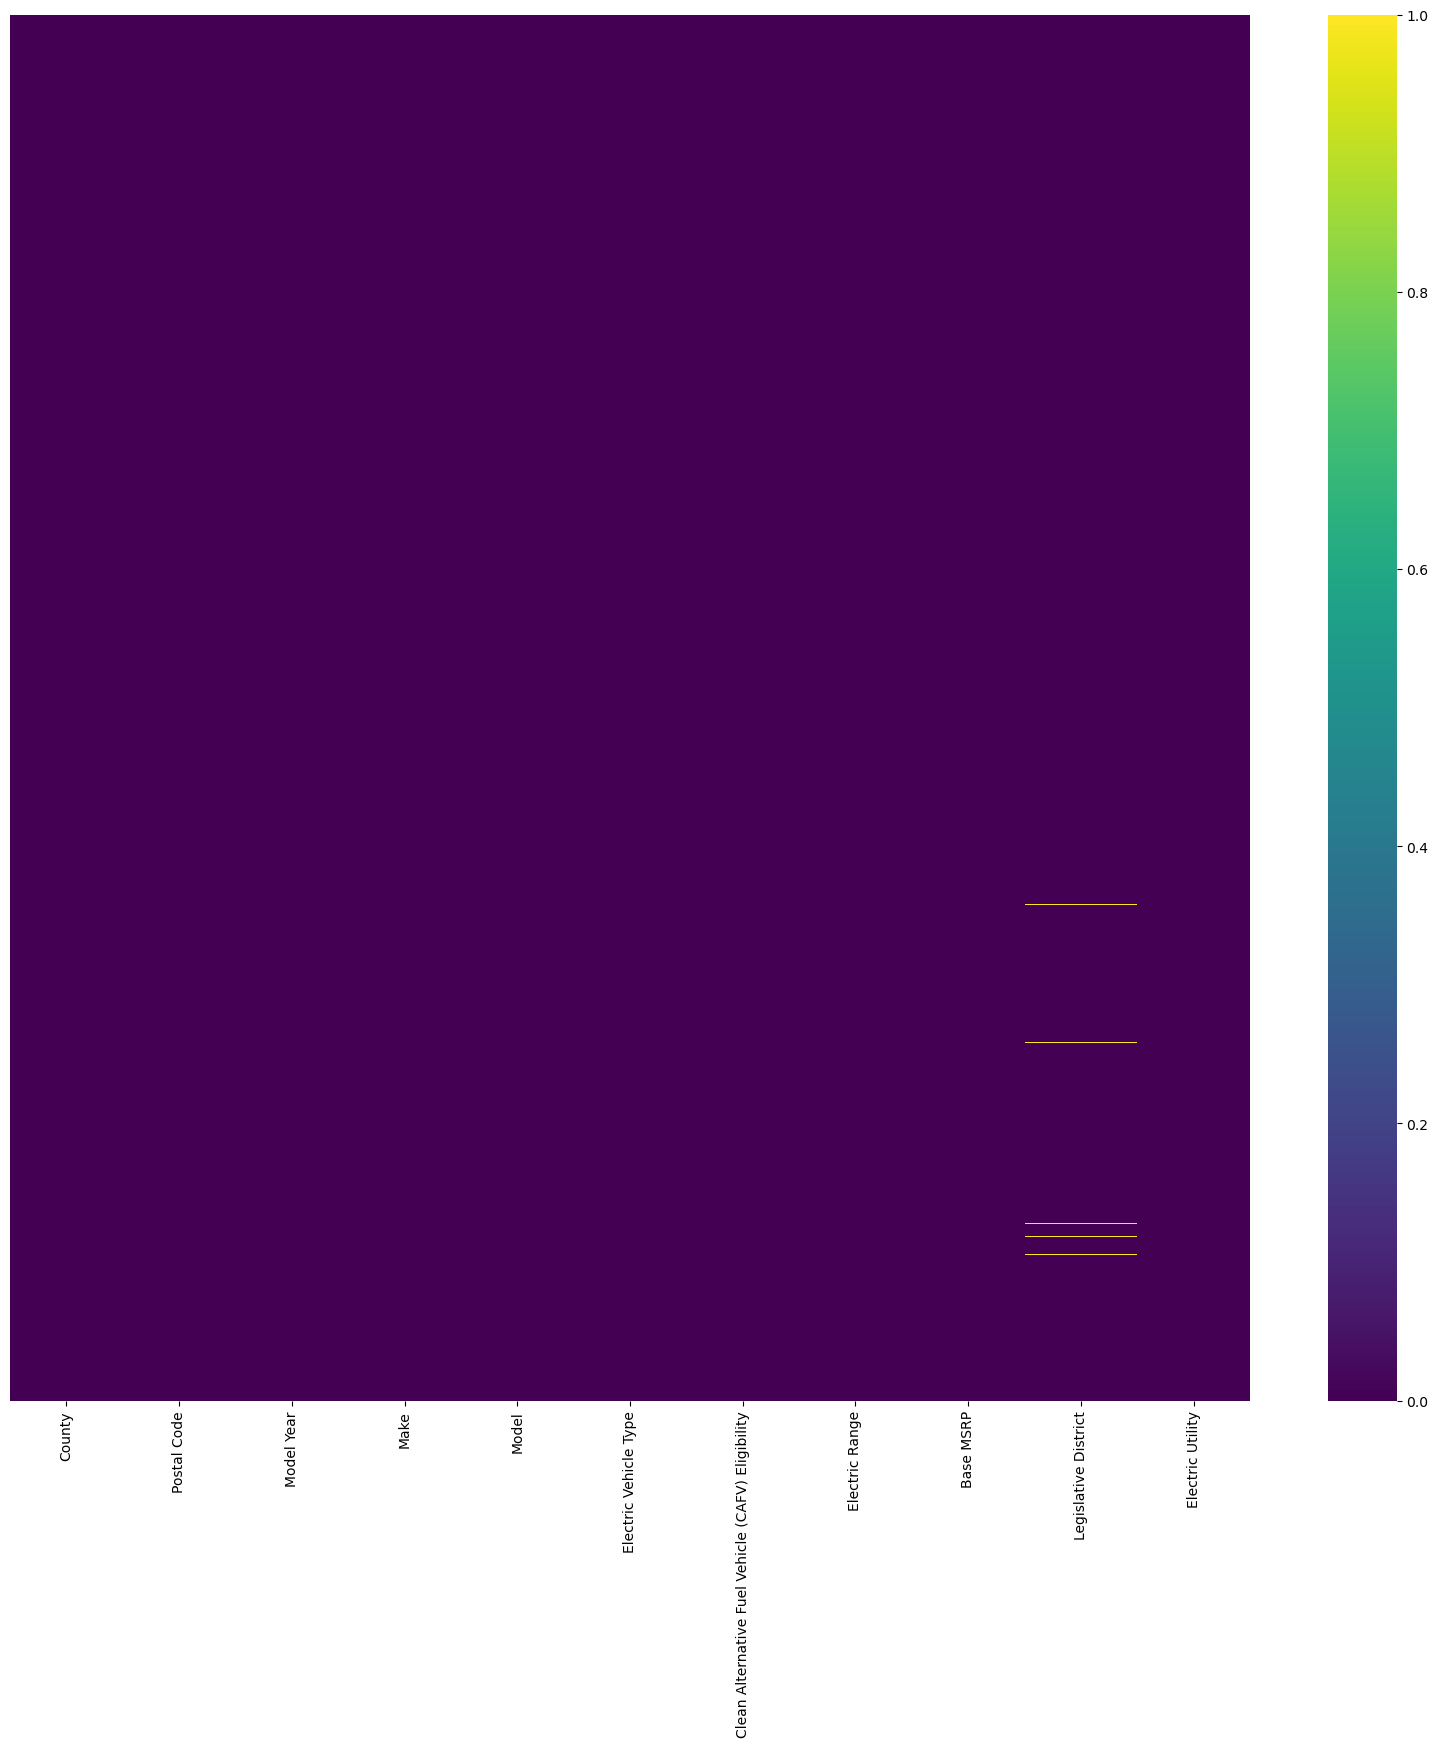

In [17]:
plt.figure(figsize=(20,18))
sns.heatmap(df1.isnull(), yticklabels=False, cmap='viridis')

In [18]:
df1['County'].fillna(df1['County'].mode()[0], inplace=True)

In [19]:
# Use mean of Legislative District column to fill the null values of Legislative District Column.

df1['Legislative District'].fillna(df1['Legislative District'].mean(),inplace =True)

In [20]:
# Using the forwardfill and backwardfill method in Pandas, we can fill all the rows with missing values

df1['Electric Utility'].fillna('ffill',inplace =True)
df1['Postal Code'].fillna('bfill',inplace =True)

In [21]:
# Assuming 'Electric Range' is the column name
df1 = df1[df1['Electric Range'] != 0]

In [22]:
# Assuming 'Base MSRP' is the column name
df1 = df1[df1['Base MSRP'] != 0]

In [23]:
df1.isnull().sum()

County                                               0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Electric Utility                                     0
dtype: int64

In [24]:
df1['Electric Range'].unique()

array([208,  14,  17,  93,  19,  32,  16, 111,  15, 220,  12, 245, 265,
        33, 100,  31], dtype=int64)

In [25]:
df1['Model'].unique()

array(['MODEL S', '330E', 'XC60', 'SOUL', 'CROSSTREK', 'XC90', 'PANAMERA',
       'PACIFICA', '530E', 'SOUL EV', 'ROADSTER', 'COUNTRYMAN', '740E',
       'CAYENNE', 'KARMA', 'WHEEGO', 'CT6', '918'], dtype=object)

In [26]:
df1['Legislative District'].unique()

array([13.        , 47.        , 30.        , 41.        , 48.        ,
       23.        , 20.        ,  1.        , 45.        , 44.        ,
       18.        , 46.        , 35.        , 37.        ,  2.        ,
       26.        , 15.        , 36.        , 32.        , 11.        ,
       22.        , 34.        , 49.        ,  5.        , 43.        ,
       17.        , 24.        , 19.        , 33.        , 21.        ,
       10.        , 31.        , 14.        ,  7.        , 39.        ,
       29.        ,  6.        , 25.        , 40.        , 27.        ,
       38.        , 16.        , 28.        , 42.        , 12.        ,
        3.        ,  9.        ,  4.        ,  8.        , 29.17894136])

In [27]:
df1['Make'].unique()

array(['TESLA', 'BMW', 'VOLVO', 'KIA', 'SUBARU', 'PORSCHE', 'CHRYSLER',
       'MINI', 'FISKER', 'WHEEGO ELECTRIC CARS', 'CADILLAC'], dtype=object)

In [28]:
df1["Electric Range"].replace(0, pd.NA, inplace=True)
df1["Legislative District"].replace(0, pd.NA, inplace=True)

In [29]:
print("\nCleaned Dataset:")
df1.head()


Cleaned Dataset:


County Postal Code  Model Year   Make    Model  \
67   Kittitas     98940.0        2014  TESLA  MODEL S   
152      King     98092.0        2017    BMW     330E   
204      King     98023.0        2014  TESLA  MODEL S   
317      King     98059.0        2013  TESLA  MODEL S   
352      King     98004.0        2014  TESLA  MODEL S   

                      Electric Vehicle Type  \
67           Battery Electric Vehicle (BEV)   
152  Plug-in Hybrid Electric Vehicle (PHEV)   
204          Battery Electric Vehicle (BEV)   
317          Battery Electric Vehicle (BEV)   
352          Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67            Clean Alternative Fuel Vehicle Eligible             208   
152             Not eligible due to low battery range              14   
204           Clean Alternative Fuel Vehicle Eligible             208   
317           Clean Alternative Fuel Vehicle Eligible             208   
352           Clean Alternative Fuel Vehicle Eligible             208   

     Base MSRP  Legislative District  \
67       69900                  13.0   
152      44100                  47.0   
204      69900                  30.0   
317      69900                  41.0   
352      69900                  41.0   

                                  Electric Utility  
67                          PUGET SOUND ENERGY INC  
152  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
204  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
317  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
352  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

#### Label Encoding for categorical variables with ordinality

In [30]:
import pandas as pd

# Assuming df1 is the cleaned dataset

# Label Encoding for categorical variables with ordinality
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Example: Encoding 'Electric Vehicle Type' column
df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Viewing the modified dataset
df1.head()

County Postal Code  Model Year   Make    Model  \
67   Kittitas     98940.0        2014  TESLA  MODEL S   
152      King     98092.0        2017    BMW     330E   
204      King     98023.0        2014  TESLA  MODEL S   
317      King     98059.0        2013  TESLA  MODEL S   
352      King     98004.0        2014  TESLA  MODEL S   

                      Electric Vehicle Type  \
67           Battery Electric Vehicle (BEV)   
152  Plug-in Hybrid Electric Vehicle (PHEV)   
204          Battery Electric Vehicle (BEV)   
317          Battery Electric Vehicle (BEV)   
352          Battery Electric Vehicle (BEV)   

     Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67                                                   0             208   
152                                                  1              14   
204                                                  0             208   
317                                                  0             208   
352                                                  0             208   

     Base MSRP  Legislative District  \
67       69900                  13.0   
152      44100                  47.0   
204      69900                  30.0   
317      69900                  41.0   
352      69900                  41.0   

                                  Electric Utility  
67                          PUGET SOUND ENERGY INC  
152  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
204  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
317  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
352  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

### Feature Engineering:

In [31]:
import pandas as pd


# 1. Create a new feature for the age of the vehicle
current_year = 2024  # Assuming the current year
df1['Vehicle Age'] = current_year - df1['Model Year']


# Viewing the modified dataset
df1.head()

County Postal Code  Model Year   Make    Model  \
67   Kittitas     98940.0        2014  TESLA  MODEL S   
152      King     98092.0        2017    BMW     330E   
204      King     98023.0        2014  TESLA  MODEL S   
317      King     98059.0        2013  TESLA  MODEL S   
352      King     98004.0        2014  TESLA  MODEL S   

                      Electric Vehicle Type  \
67           Battery Electric Vehicle (BEV)   
152  Plug-in Hybrid Electric Vehicle (PHEV)   
204          Battery Electric Vehicle (BEV)   
317          Battery Electric Vehicle (BEV)   
352          Battery Electric Vehicle (BEV)   

     Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67                                                   0             208   
152                                                  1              14   
204                                                  0             208   
317                                                  0             208   
352                                                  0             208   

     Base MSRP  Legislative District  \
67       69900                  13.0   
152      44100                  47.0   
204      69900                  30.0   
317      69900                  41.0   
352      69900                  41.0   

                                  Electric Utility  Vehicle Age  
67                          PUGET SOUND ENERGY INC           10  
152  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)            7  
204  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10  
317  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           11  
352  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10

In [32]:
# 2. Create a binary feature indicating if the vehicle is a luxury brand
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Lexus', 'Porsche', 'KIA', 'VOLVO', 'TESLA', 'CHRYSLER', 'Bentley']
df1['Is Luxury Brand'] = df1['Make'].isin(luxury_brands).astype(int)

# Viewing the modified dataset
df1.head()

County Postal Code  Model Year   Make    Model  \
67   Kittitas     98940.0        2014  TESLA  MODEL S   
152      King     98092.0        2017    BMW     330E   
204      King     98023.0        2014  TESLA  MODEL S   
317      King     98059.0        2013  TESLA  MODEL S   
352      King     98004.0        2014  TESLA  MODEL S   

                      Electric Vehicle Type  \
67           Battery Electric Vehicle (BEV)   
152  Plug-in Hybrid Electric Vehicle (PHEV)   
204          Battery Electric Vehicle (BEV)   
317          Battery Electric Vehicle (BEV)   
352          Battery Electric Vehicle (BEV)   

     Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67                                                   0             208   
152                                                  1              14   
204                                                  0             208   
317                                                  0             208   
352                                                  0             208   

     Base MSRP  Legislative District  \
67       69900                  13.0   
152      44100                  47.0   
204      69900                  30.0   
317      69900                  41.0   
352      69900                  41.0   

                                  Electric Utility  Vehicle Age  \
67                          PUGET SOUND ENERGY INC           10   
152  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)            7   
204  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10   
317  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           11   
352  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10   

     Is Luxury Brand  
67                 1  
152                1  
204                1  
317                1  
352                1

In [33]:
df1

County Postal Code  Model Year     Make      Model  \
67         Kittitas     98940.0        2014    TESLA    MODEL S   
152            King     98092.0        2017      BMW       330E   
204            King     98023.0        2014    TESLA    MODEL S   
317            King     98059.0        2013    TESLA    MODEL S   
352            King     98004.0        2014    TESLA    MODEL S   
...             ...         ...         ...      ...        ...   
166374  Walla Walla     99362.0        2013    TESLA    MODEL S   
166399      Whatcom     98225.0        2019   SUBARU  CROSSTREK   
166567        Clark     98661.0        2014    TESLA    MODEL S   
166604        Grant     98837.0        2013    TESLA    MODEL S   
166718     San Juan     98245.0        2020  PORSCHE    CAYENNE   

                         Electric Vehicle Type  \
67              Battery Electric Vehicle (BEV)   
152     Plug-in Hybrid Electric Vehicle (PHEV)   
204             Battery Electric Vehicle (BEV)   
317             Battery Electric Vehicle (BEV)   
352             Battery Electric Vehicle (BEV)   
...                                        ...   
166374          Battery Electric Vehicle (BEV)   
166399  Plug-in Hybrid Electric Vehicle (PHEV)   
166567          Battery Electric Vehicle (BEV)   
166604          Battery Electric Vehicle (BEV)   
166718  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
67                                                      0             208   
152                                                     1              14   
204                                                     0             208   
317                                                     0             208   
352                                                     0             208   
...                                                   ...             ...   
166374                                                  0             208   
166399                                                  1              17   
166567                                                  0             208   
166604                                                  0             208   
166718                                                  1              14   

        Base MSRP  Legislative District  \
67          69900                  13.0   
152         44100                  47.0   
204         69900                  30.0   
317         69900                  41.0   
352         69900                  41.0   
...           ...                   ...   
166374      69900                  16.0   
166399      34995                  42.0   
166567      69900                  49.0   
166604      69900                  13.0   
166718      81100                  40.0   

                                         Electric Utility  Vehicle Age  \
67                                 PUGET SOUND ENERGY INC           10   
152         PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)            7   
204         PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10   
317         PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           11   
352         PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)           10   
...                                                   ...          ...   
166374                                         PACIFICORP           11   
166399  PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...            5   
166567  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...           10   
166604                           PUD NO 2 OF GRANT COUNTY           11   
166718  BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...            4   

        Is Luxury Brand  
67                    1  
152                   1  
204                   1  
317                   1  
352                   1  
...                 ...  
166374                1  
166399                0  
166567                1  
166604          

### Outlier Detection and Handling.

In [34]:
# Save the DataFrame to a CSV file
df1.to_csv('clean_dataset.csv', index=False)


In [35]:
import os

# Get the current working directory (where your Python script is located)
current_directory = os.getcwd()

print("Current Directory:", current_directory)


Current Directory: C:\Users\sharm


In [36]:
df2=pd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/clean_dataset.csv")

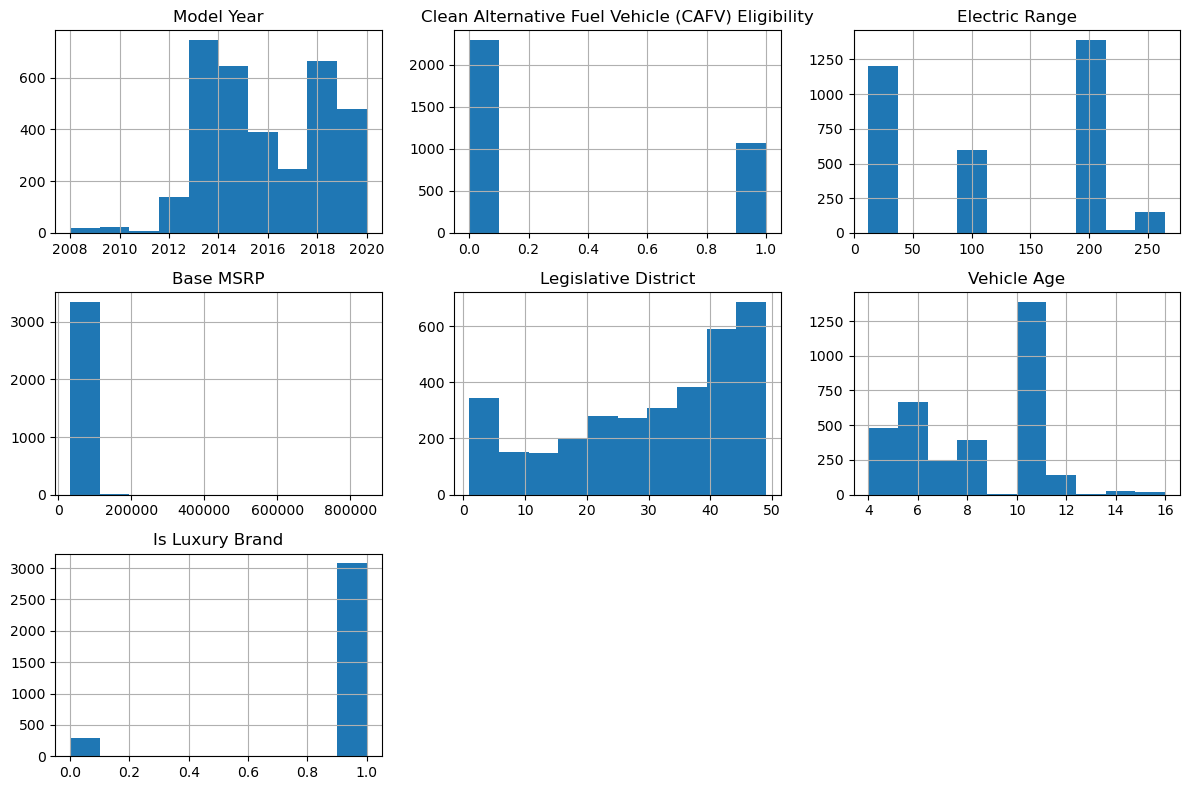

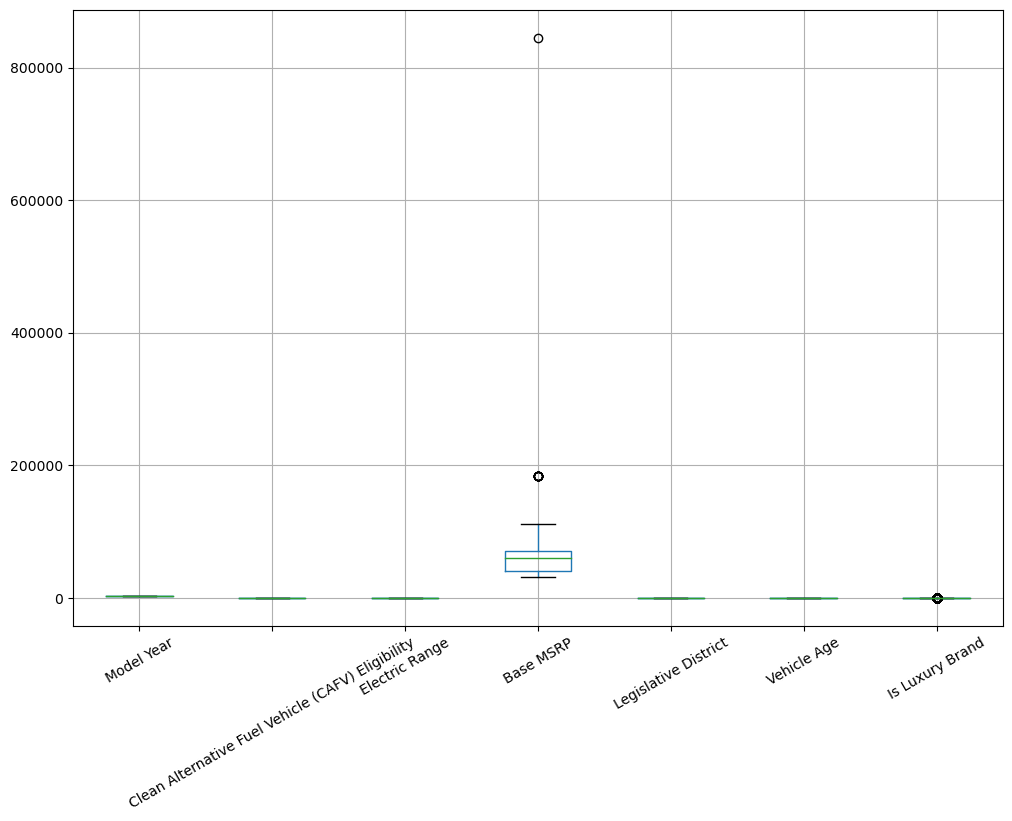

In [37]:
# Visual Inspection - Histograms
df2.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Visual Inspection - Boxplots
df2.boxplot(figsize=(12, 8))
plt.xticks(rotation=30)
plt.show()

In [38]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

# Define data types for columns
dtypes = {'Legislative District': 'float64', 'Postal Code': 'object'}

# Load the dataset using Dask and specify the data types
ddf = dd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/clean_dataset.csv", dtype=dtypes)

# Select only numeric columns
numeric_cols = ddf.select_dtypes(include=np.number)

# Calculate z-scores
z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Identify outliers based on z-scores
outliers_zscore = ddf[((z_scores > 3) | (z_scores < -3)).any(axis=1)]

# Compute IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = ddf[((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Convert Dask DataFrame to Pandas DataFrame for printing
outliers_zscore_pd = outliers_zscore.compute()
outliers_iqr_pd = outliers_iqr.compute()

print("Potential Outliers based on Z-scores:")
print(outliers_zscore_pd)

C:\Users\sharm\anaconda3\Lib\site-packages\dask\utils.py:1327: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return function(*args2, **kwargs)
C:\Users\sharm\anaconda3\Lib\site-packages\dask\utils.py:1327: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return function(*args2, **kwargs)


Potential Outliers based on Z-scores:
        County Postal Code  Model Year     Make       Model  \
9         King       98011        2019   SUBARU   CROSSTREK   
12       Clark       98606        2018  PORSCHE    PANAMERA   
46        King       98033        2008    TESLA    ROADSTER   
60      Kitsap       98110        2018     MINI  COUNTRYMAN   
91        King       98177        2018     MINI  COUNTRYMAN   
...        ...         ...         ...      ...         ...   
3286    Pierce       98405        2019     MINI  COUNTRYMAN   
3301    Benton       99352        2019     MINI  COUNTRYMAN   
3314    Pierce       98332        2019   SUBARU   CROSSTREK   
3359   Whatcom       98225        2019   SUBARU   CROSSTREK   
3362  San Juan       98245        2020  PORSCHE     CAYENNE   

                       Electric Vehicle Type  \
9     Plug-in Hybrid Electric Vehicle (PHEV)   
12    Plug-in Hybrid Electric Vehicle (PHEV)   
46            Battery Electric Vehicle (BEV)   
60    Plug-in

In [39]:
print("\nPotential Outliers based on IQR:")
print(outliers_iqr_pd)


Potential Outliers based on IQR:
        County Postal Code  Model Year     Make       Model  \
9         King       98011        2019   SUBARU   CROSSTREK   
12       Clark       98606        2018  PORSCHE    PANAMERA   
60      Kitsap       98110        2018     MINI  COUNTRYMAN   
91        King       98177        2018     MINI  COUNTRYMAN   
125       King       98102        2019   SUBARU   CROSSTREK   
...        ...         ...         ...      ...         ...   
3286    Pierce       98405        2019     MINI  COUNTRYMAN   
3301    Benton       99352        2019     MINI  COUNTRYMAN   
3314    Pierce       98332        2019   SUBARU   CROSSTREK   
3359   Whatcom       98225        2019   SUBARU   CROSSTREK   
3362  San Juan       98245        2020  PORSCHE     CAYENNE   

                       Electric Vehicle Type  \
9     Plug-in Hybrid Electric Vehicle (PHEV)   
12    Plug-in Hybrid Electric Vehicle (PHEV)   
60    Plug-in Hybrid Electric Vehicle (PHEV)   
91    Plug-in Hyb

In [40]:
# Calculate the first quartile (Q1)
Q1 = df2['Base MSRP'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df2['Base MSRP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 4.5 * IQR
upper_bound = Q3 + 4.5 * IQR

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)


Lower bound for outliers: -94577.5
Upper bound for outliers: 204472.5


In [41]:
# Merge outlier detection results
merged_outliers = pd.concat([outliers_zscore_pd, outliers_iqr_pd])

# Remove duplicate rows if any
merged_outliers = merged_outliers.drop_duplicates()

# Optionally, add a column indicating the method used for outlier detection
merged_outliers['Outlier Detection Method'] = np.where(merged_outliers.index.isin(outliers_zscore_pd.index), 'Z-score', 'IQR')

# Reset index
merged_outliers.reset_index(drop=True, inplace=True)

# Print the merged outlier detection results
print("Merged Outliers:")
print(merged_outliers)

Merged Outliers:
        County Postal Code  Model Year     Make       Model  \
0         King       98011        2019   SUBARU   CROSSTREK   
1        Clark       98606        2018  PORSCHE    PANAMERA   
2         King       98033        2008    TESLA    ROADSTER   
3       Kitsap       98110        2018     MINI  COUNTRYMAN   
4         King       98177        2018     MINI  COUNTRYMAN   
..         ...         ...         ...      ...         ...   
262  Klickitat       98620        2018     MINI  COUNTRYMAN   
263     Benton       99352        2019     MINI  COUNTRYMAN   
264     Pierce       98332        2019   SUBARU   CROSSTREK   
265    Whatcom       98225        2019   SUBARU   CROSSTREK   
266   San Juan       98245        2020  PORSCHE     CAYENNE   

                      Electric Vehicle Type  \
0    Plug-in Hybrid Electric Vehicle (PHEV)   
1    Plug-in Hybrid Electric Vehicle (PHEV)   
2            Battery Electric Vehicle (BEV)   
3    Plug-in Hybrid Electric Vehicle (

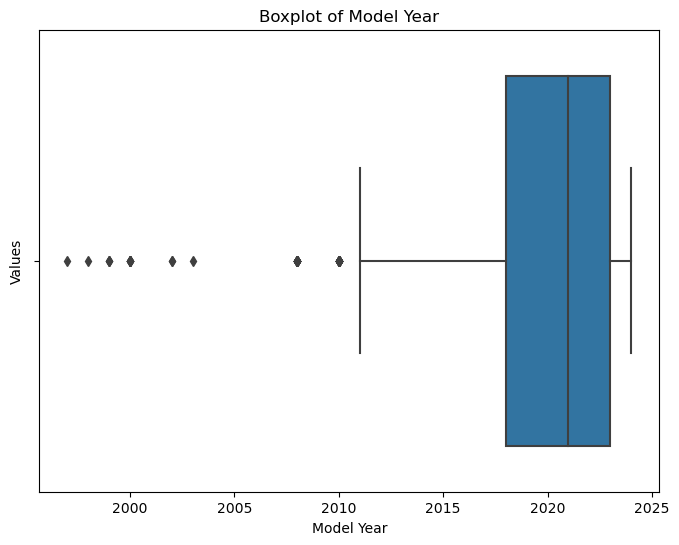

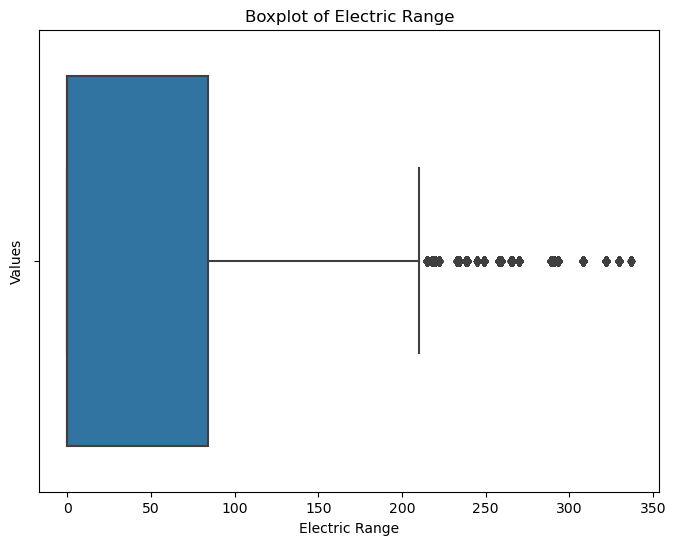

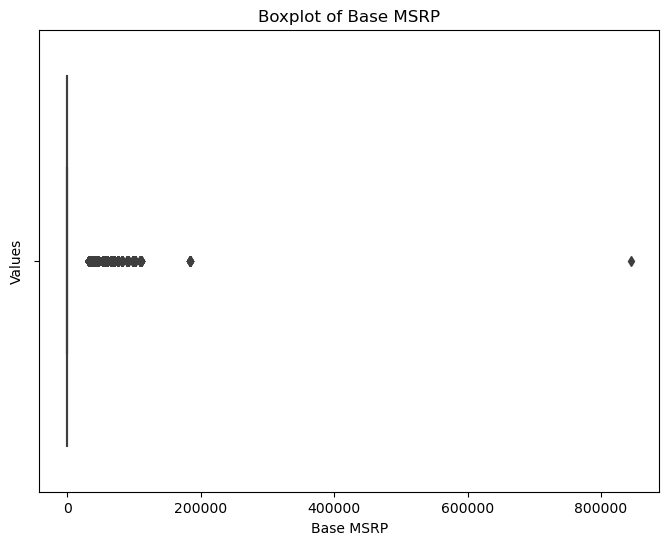

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df is loaded properly with your dataset

# Features more likely to be useful for predicting future sales of cars
features_for_prediction = ['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                          'Electric Range', 'Base MSRP']

# Outlier analysis (box plot) for numerical features
for column in features_for_prediction:
    if df[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.show()

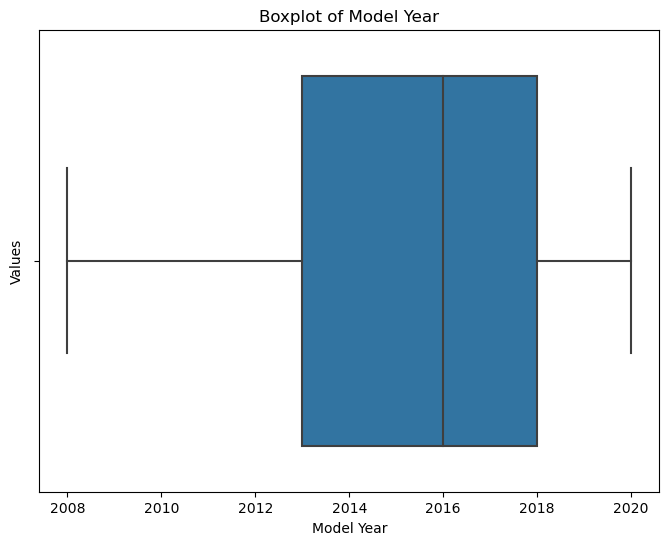

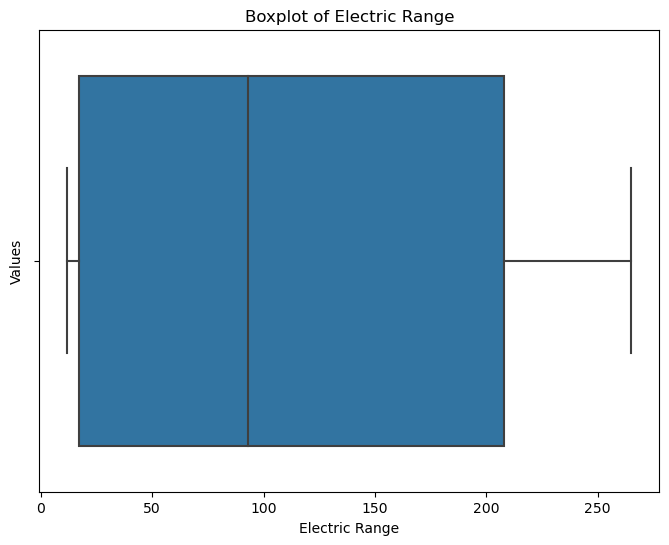

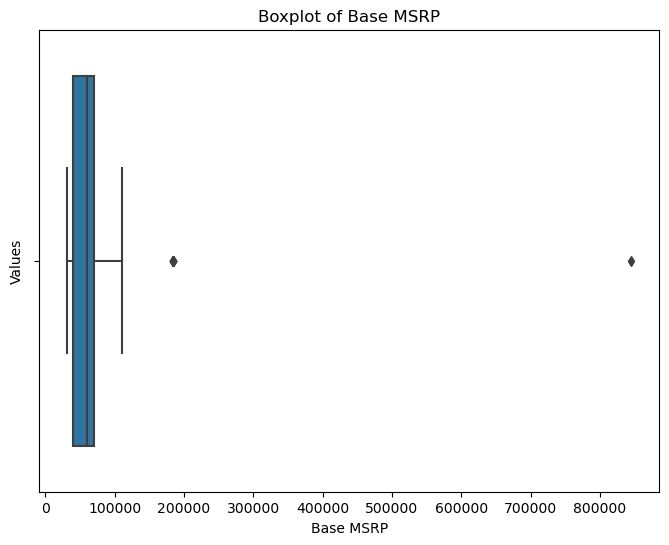

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df2 is loaded properly with your dataset

# Features more likely to be useful for predicting future sales of cars
features_for_prediction = ['Model Year', 
                          'Electric Range', 'Base MSRP']

for column in features_for_prediction:
    if ddf[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=column, data=ddf.compute())  # Using data=ddf.compute() to convert Dask DataFrame to Pandas for plotting
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Values')
        plt.show()

In [44]:
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: KNN-based outlier detection
def knn_outlier_detection(data, k=100):
    numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
    nbrs = NearestNeighbors(n_neighbors=k).fit(numeric_data)
    distances, _ = nbrs.kneighbors(numeric_data)
    return np.mean(distances, axis=1)

# Compute outlier scores using KNN
outlier_scores = knn_outlier_detection(df2)
outlier_scores

array([2.22509516e+00, 3.66247109e+01, 1.46271650e+00, ...,
       1.17057172e+00, 2.20681253e+00, 7.41553461e+03])

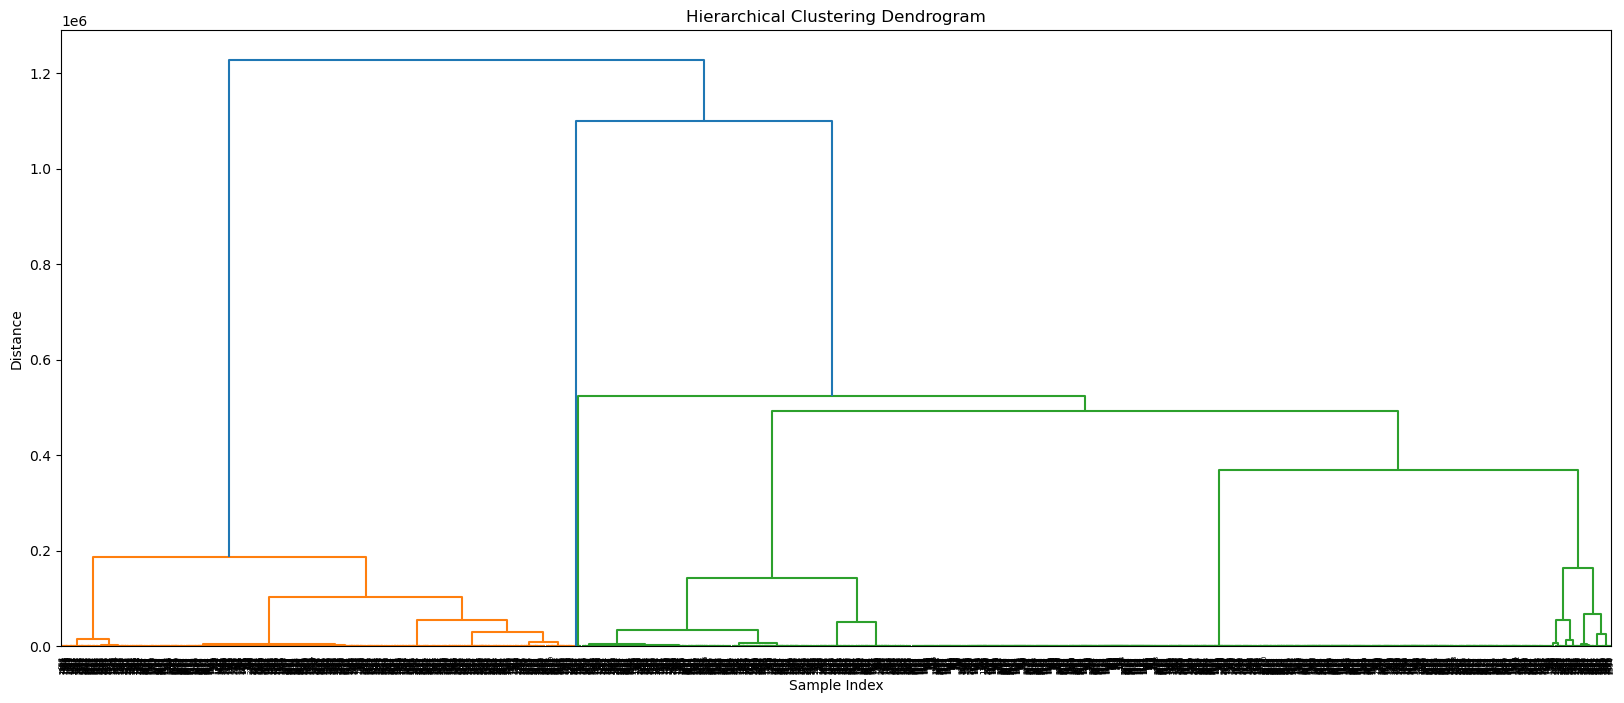

In [45]:
# Step 2: Dendrogram-based outlier detection
def dendrogram_outlier_detection(data):
    numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
    Z = linkage(numeric_data, method='ward')
    plt.figure(figsize=(20, 8))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Perform dendrogram-based outlier detection
dendrogram_outlier_detection(df2)

# You can further analyze the dendrogram to identify potential outliers visually.


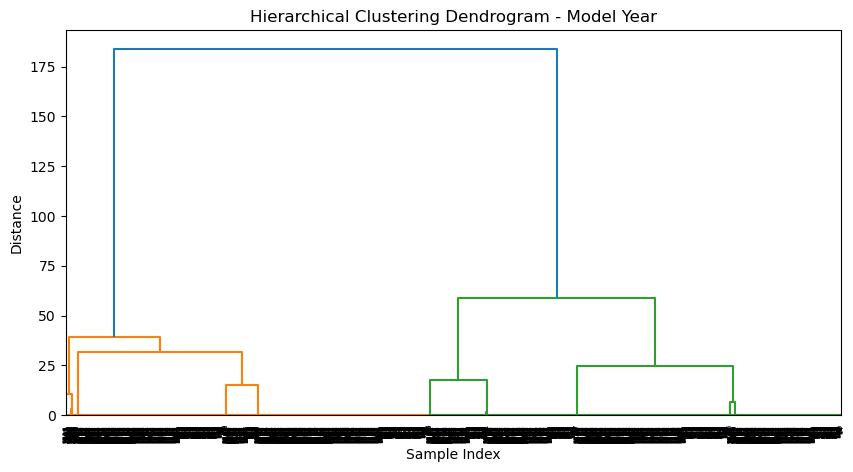

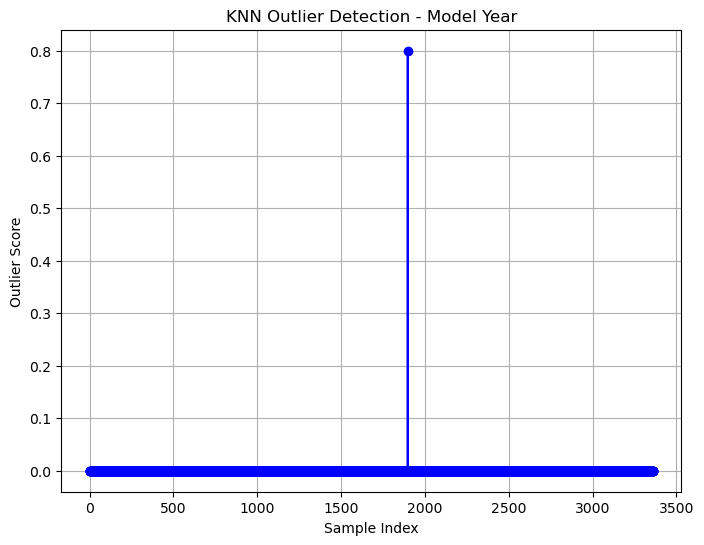

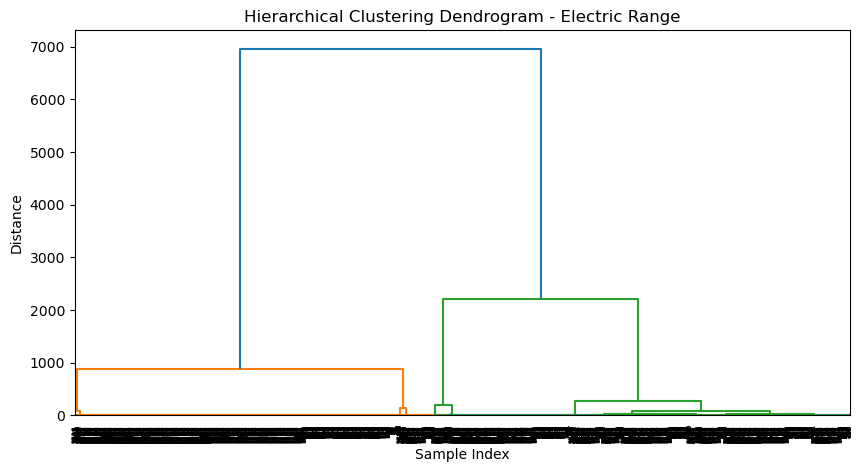

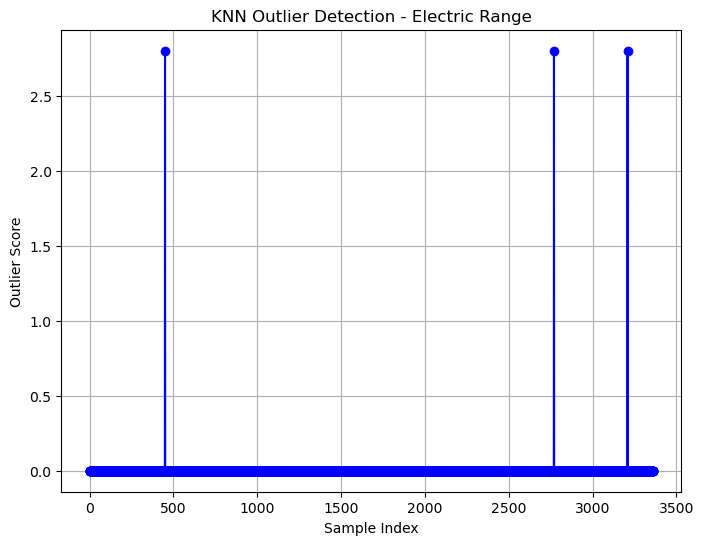

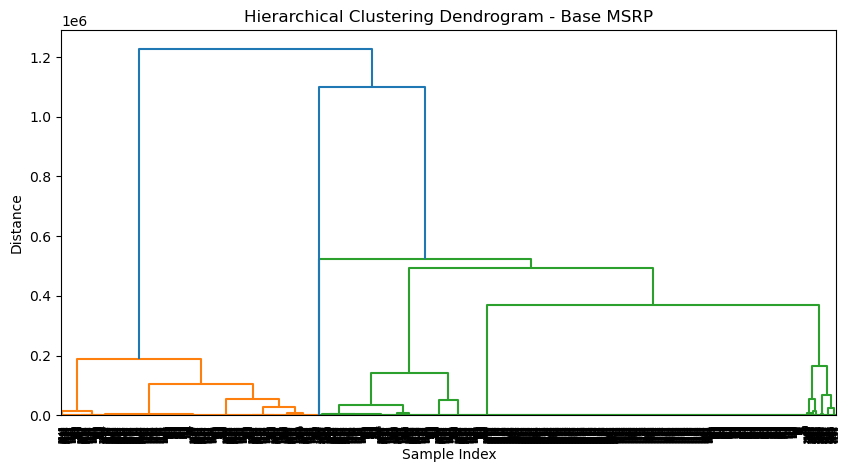

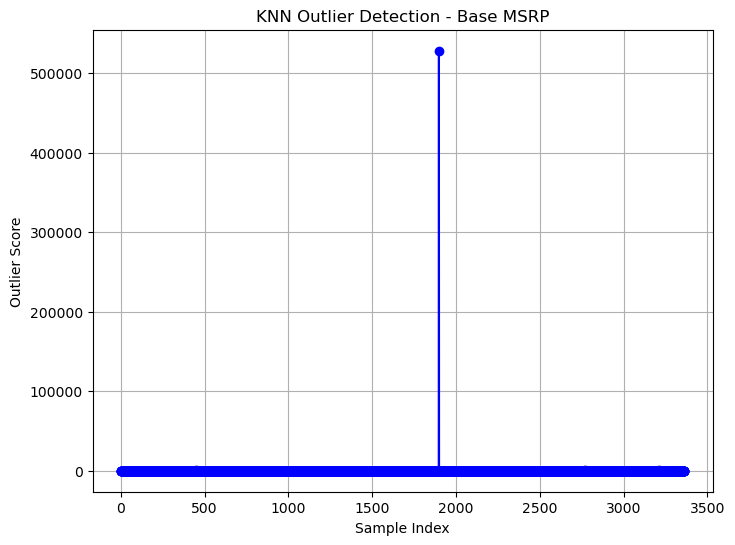

In [46]:
# Step 1: Define KNN-based outlier detection function
def knn_outlier_detection(data, column, k=5):
    column_data = data[column].values.reshape(-1, 1)  # Reshape to 2D array
    nbrs = NearestNeighbors(n_neighbors=k).fit(column_data)
    distances, _ = nbrs.kneighbors(column_data)
    return np.mean(distances, axis=1)

# Step 2: Define dendrogram-based outlier detection function
def dendrogram_outlier_detection(data, column):
    column_data = data[column].values.reshape(-1, 1)  # Reshape to 2D array
    Z = linkage(column_data, method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram - {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Step 3: Perform outlier analysis and plot for each column
columns_of_interest = ['Model Year', 'Electric Range', 'Base MSRP']
for column in columns_of_interest:
    # KNN-based outlier detection
    outlier_scores = knn_outlier_detection(df2, column)
    
    # Dendrogram-based outlier detection
    dendrogram_outlier_detection(df2, column)
    
    # Optionally, plot the KNN-based outlier scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(outlier_scores)), outlier_scores, marker='o', linestyle='-', color='b')
    plt.title(f'KNN Outlier Detection - {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Outlier Score')
    plt.grid(True)
    plt.show()

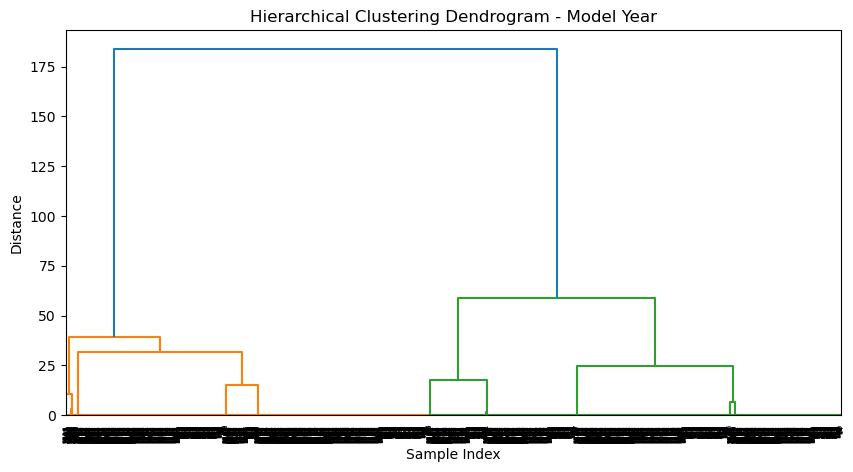

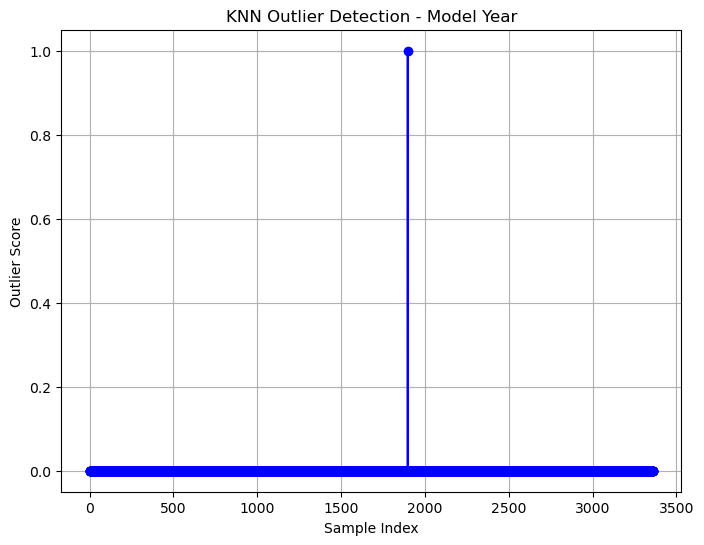

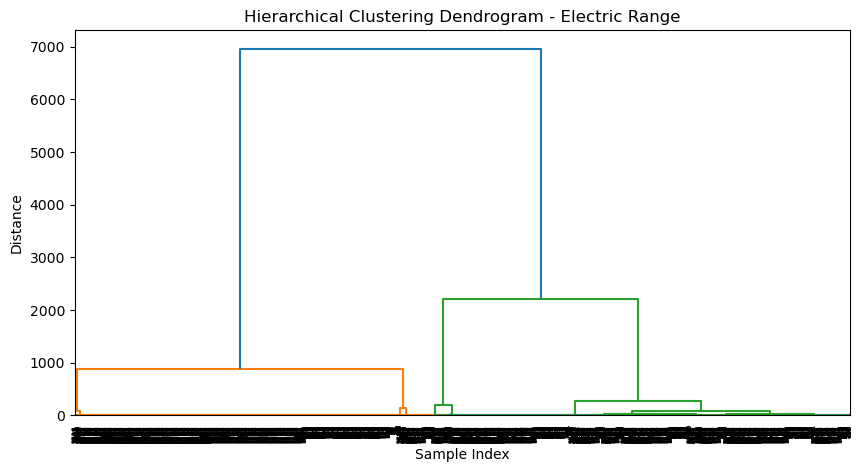

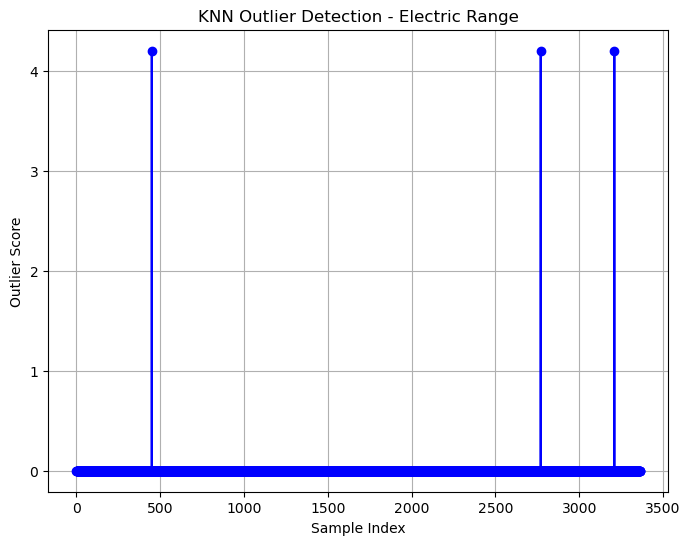

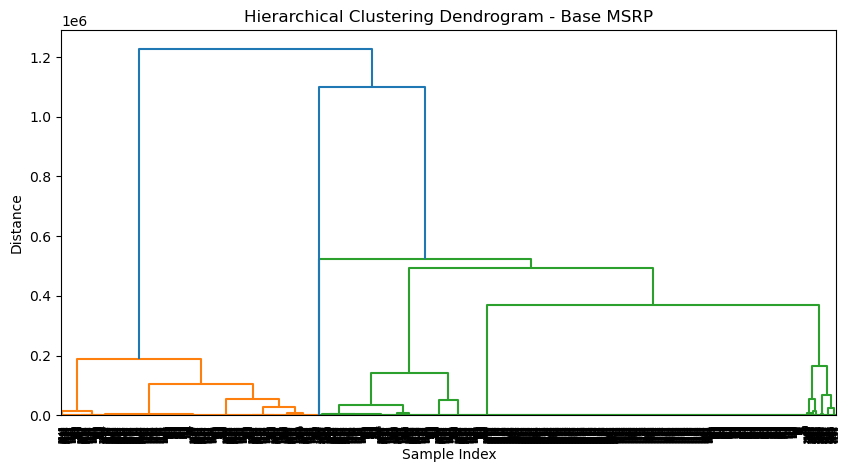

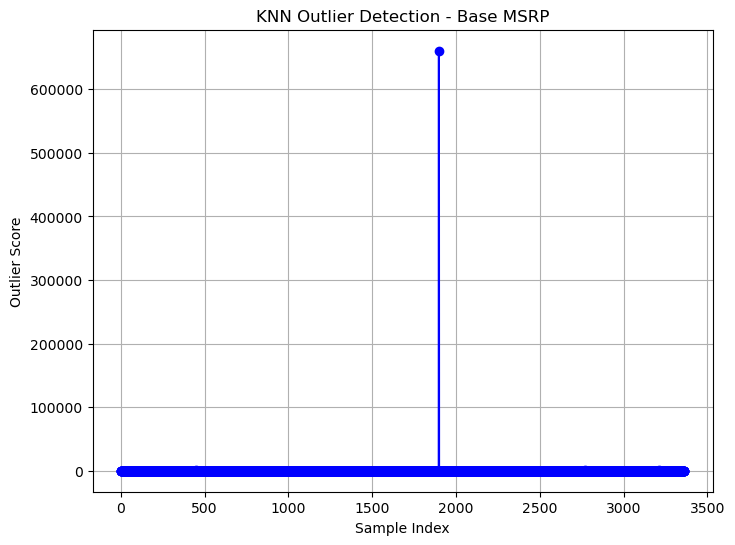

In [47]:
# Step 1: Define KNN-based outlier detection function
def knn_outlier_detection(data, column, k=5):
    nbrs = NearestNeighbors(n_neighbors=k)
    distances = nbrs.fit(data[[column]]).kneighbors()[0]
    return np.mean(distances, axis=1)

# Step 2: Define dendrogram-based outlier detection function
def dendrogram_outlier_detection(data, column):
    Z = linkage(data[[column]], method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram - {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Step 3: Perform outlier analysis and plot for each column
columns_of_interest = ['Model Year', 'Electric Range', 'Base MSRP']
for column in columns_of_interest:
    # KNN-based outlier detection
    outlier_scores = knn_outlier_detection(ddf, column)
    
    # Dendrogram-based outlier detection
    dendrogram_outlier_detection(ddf, column)
    
    # Optionally, plot the KNN-based outlier scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(outlier_scores)), outlier_scores, marker='o', linestyle='-', color='b')
    plt.title(f'KNN Outlier Detection - {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Outlier Score')
    plt.grid(True)
    plt.show()

In [48]:
# Distribution of Electric Vehicles Types.

ev_types = df2["Electric Vehicle Type"].value_counts().reset_index()
ev_types.columns = (["Electric Vehicle Type", "Number Of Vehicles"])
ev_types

Electric Vehicle Type  Number Of Vehicles
0          Battery Electric Vehicle (BEV)                2154
1  Plug-in Hybrid Electric Vehicle (PHEV)                1209

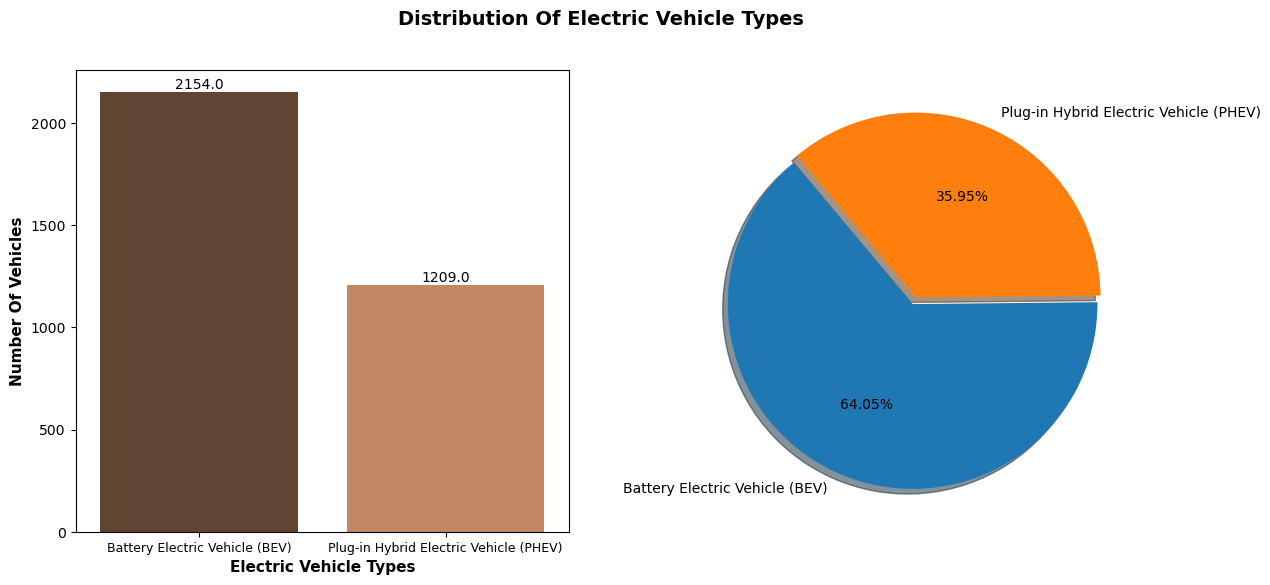

In [49]:
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

figure.suptitle('Distribution Of Electric Vehicle Types', fontweight='bold', fontsize=14)

barplot = sns.barplot(ev_types, x="Electric Vehicle Type", y="Number Of Vehicles", ax=axes[0], palette="copper")
axes[0].set_xlabel('Electric Vehicle Types', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Number Of Vehicles', fontweight='bold', fontsize=11)
axes[0].set_xticklabels(barplot.get_xticklabels(), fontsize=9)

for p in barplot.patches:
    barplot.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), va="bottom", ha="center", fontsize=10)

sizes1 = ev_types["Number Of Vehicles"]
labels1 = ev_types["Electric Vehicle Type"]
explode1 = [.02, .02]

axes[1].pie(sizes1, labels=labels1, autopct='%0.2f%%', shadow=True, explode=explode1, startangle=130)

plt.show()

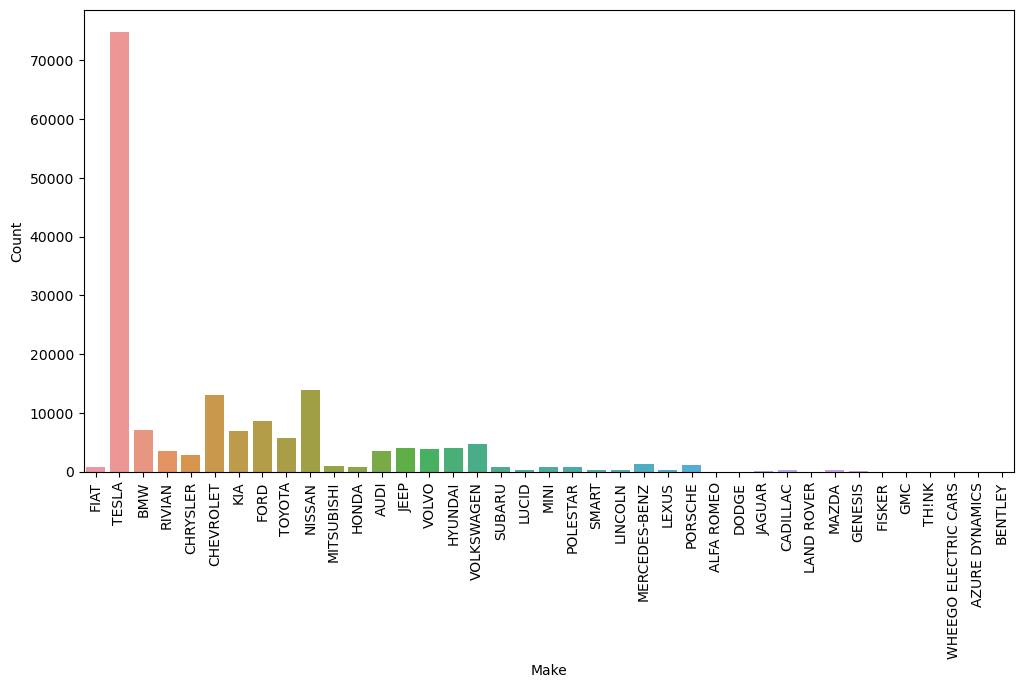

In [50]:
# Count of Cars by Make.

plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Make')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

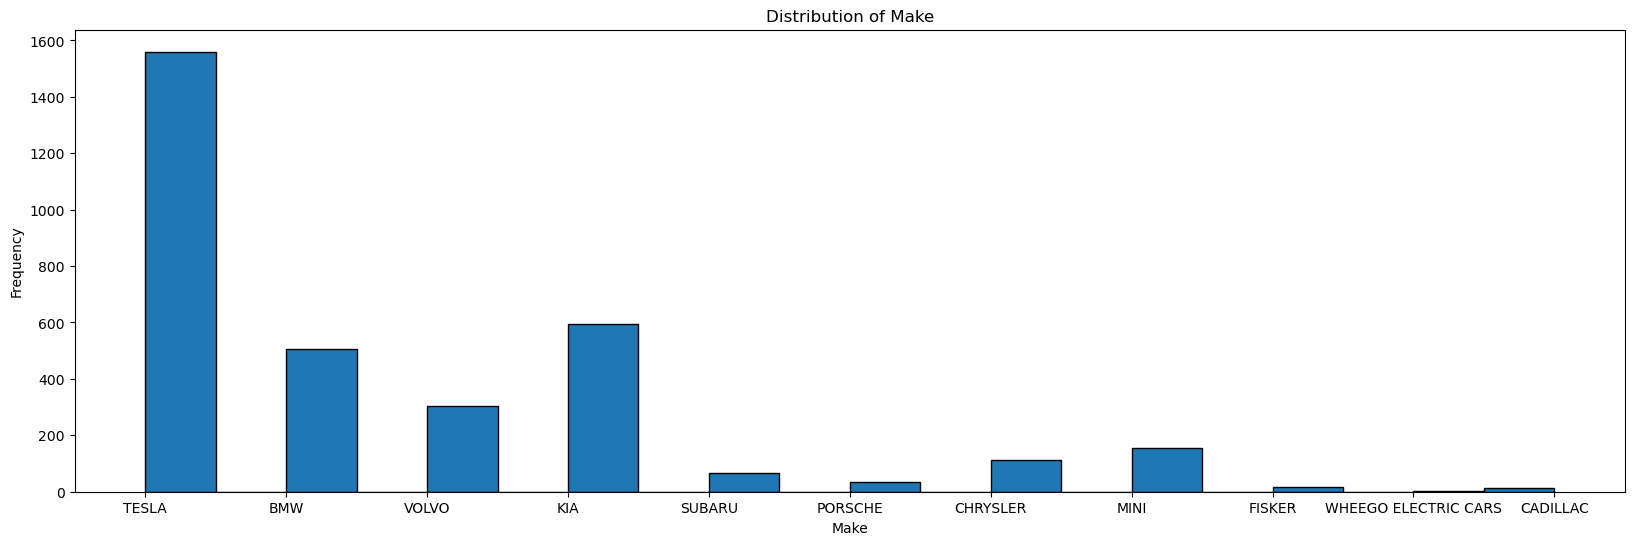

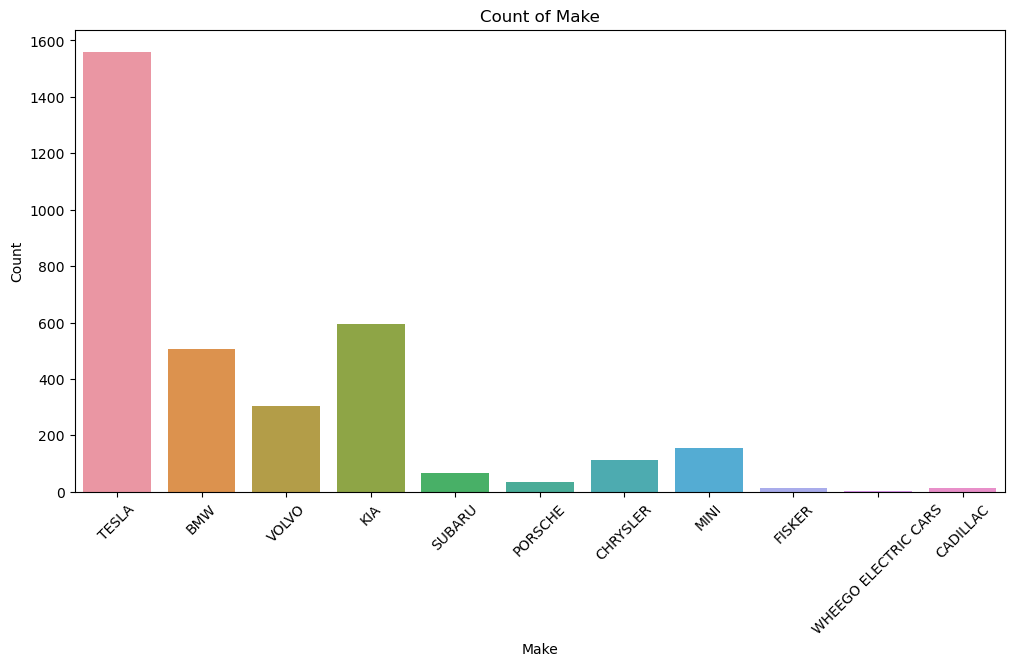

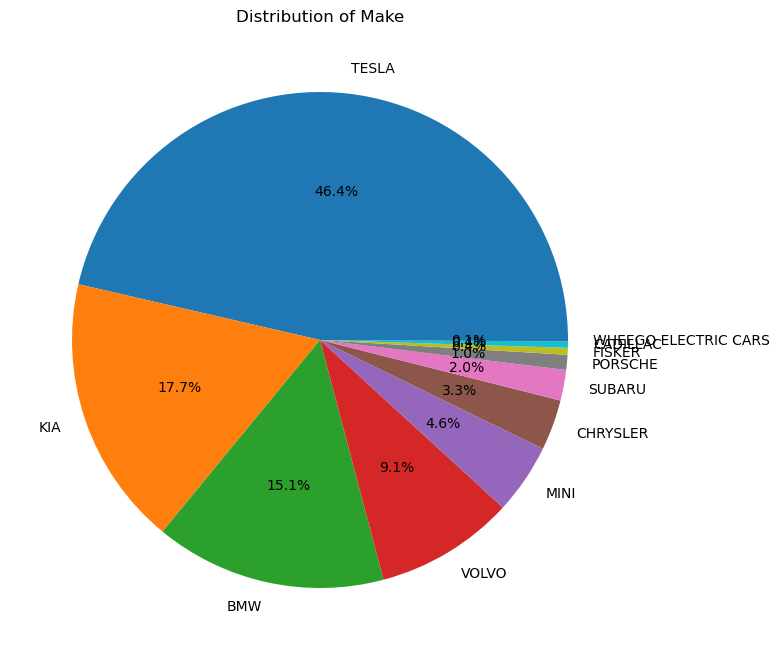

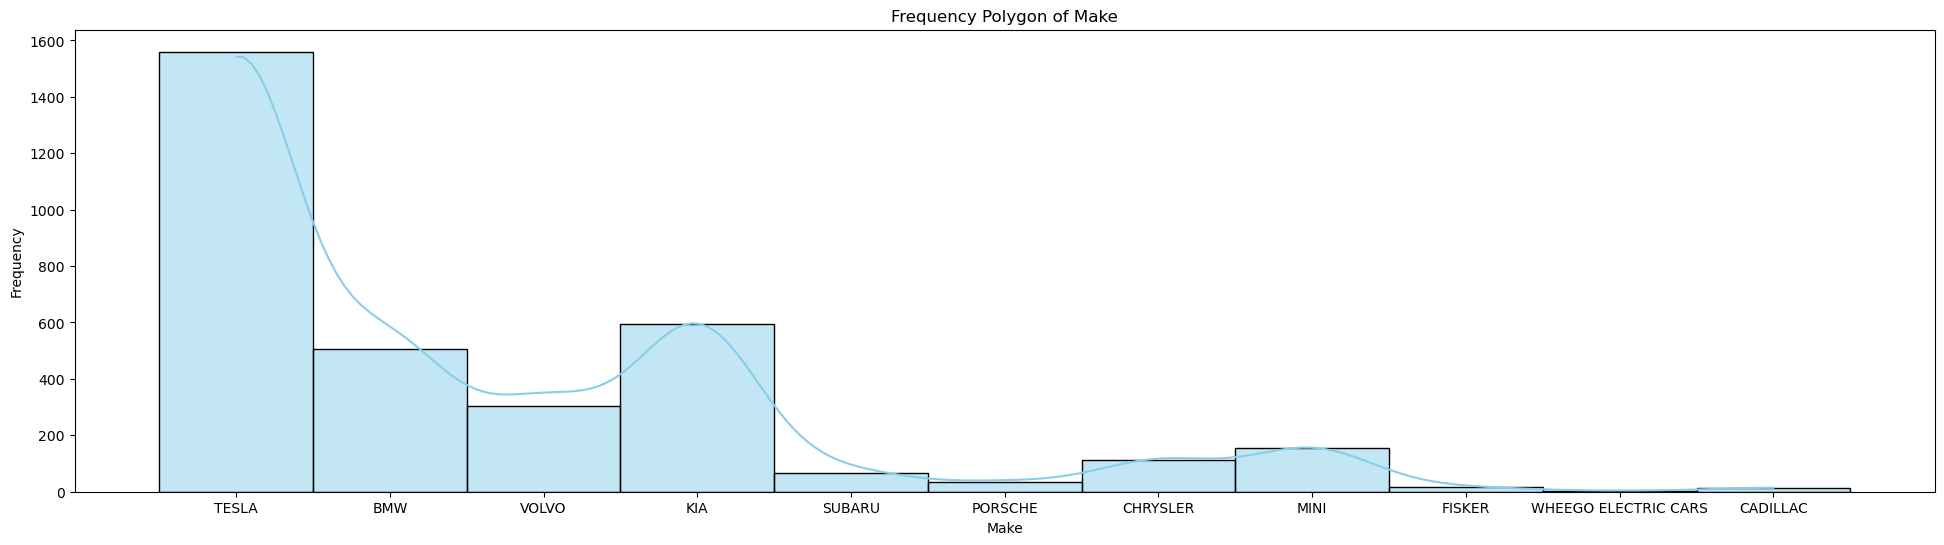

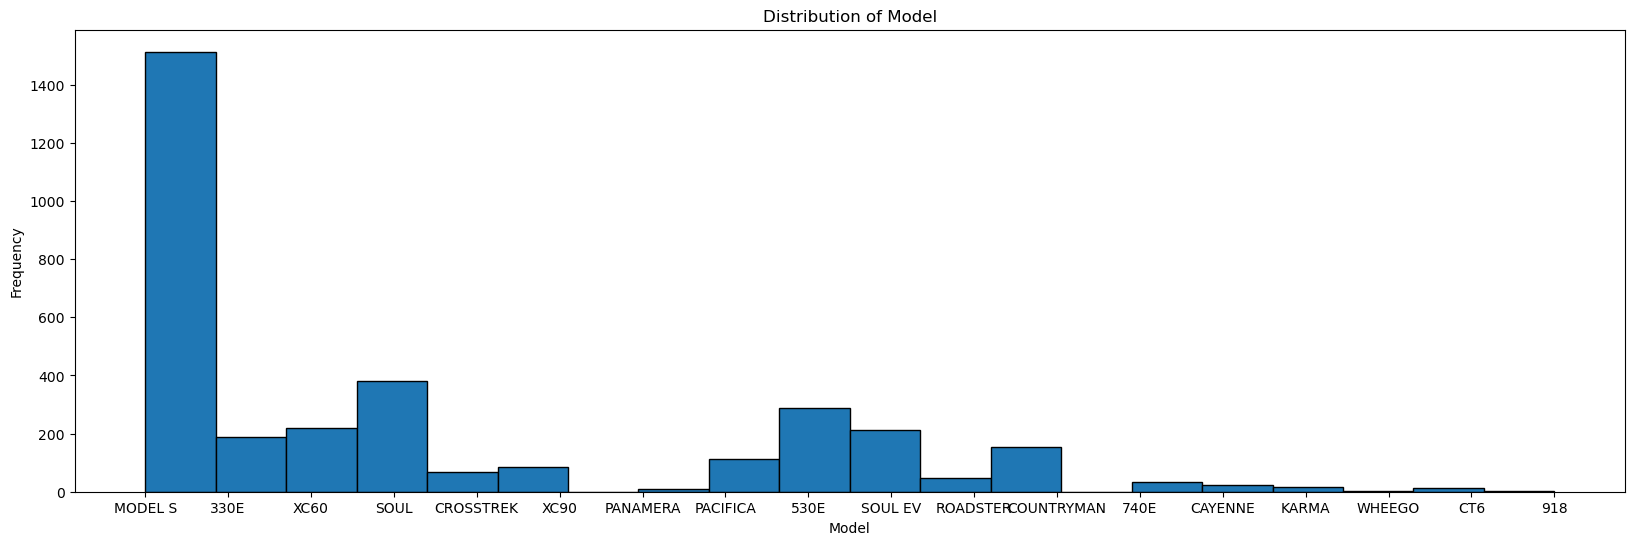

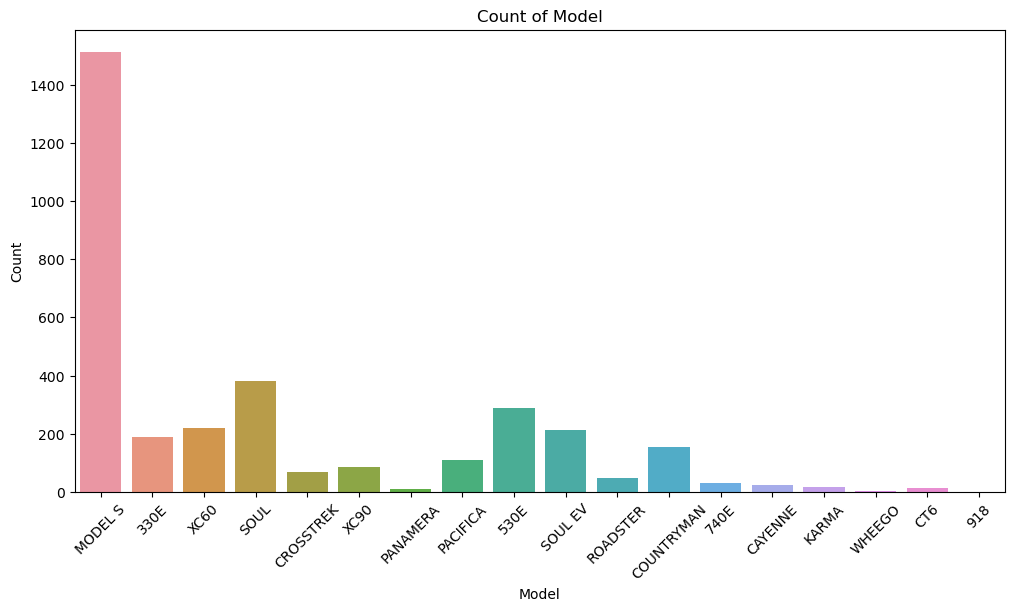

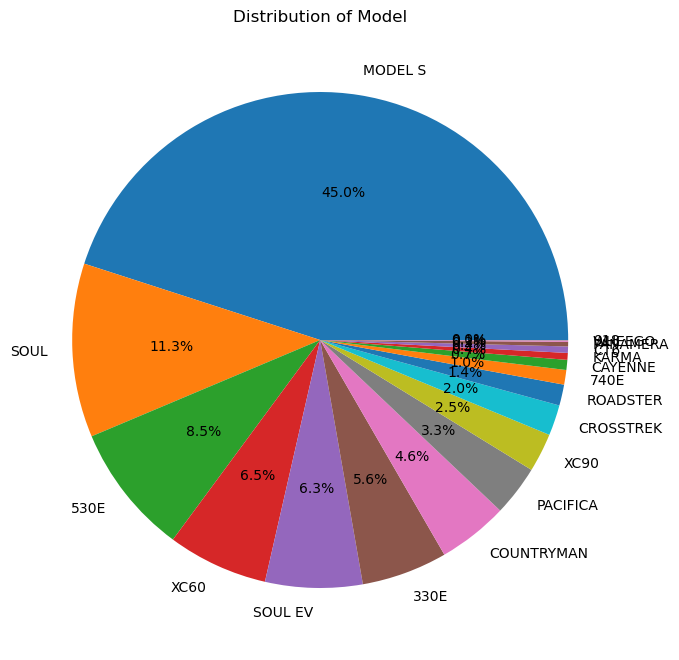

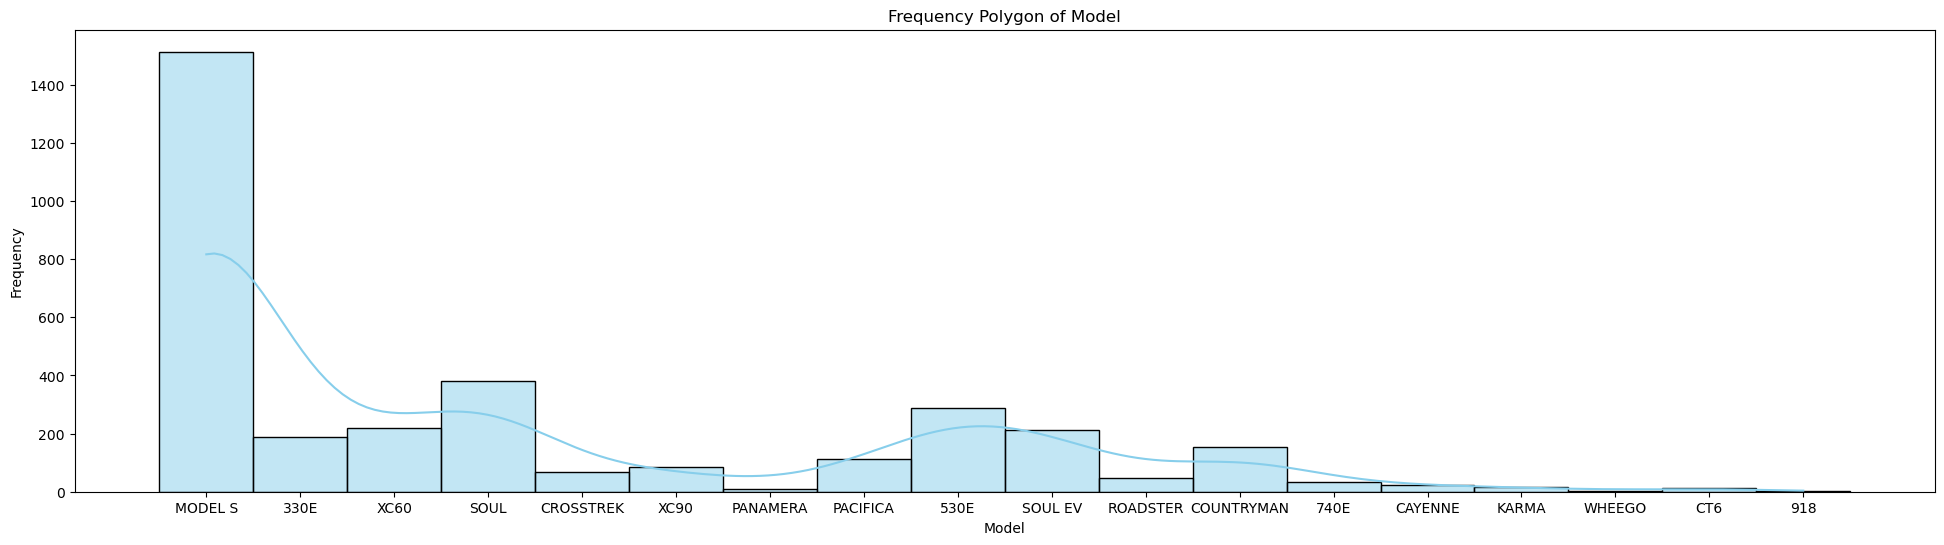

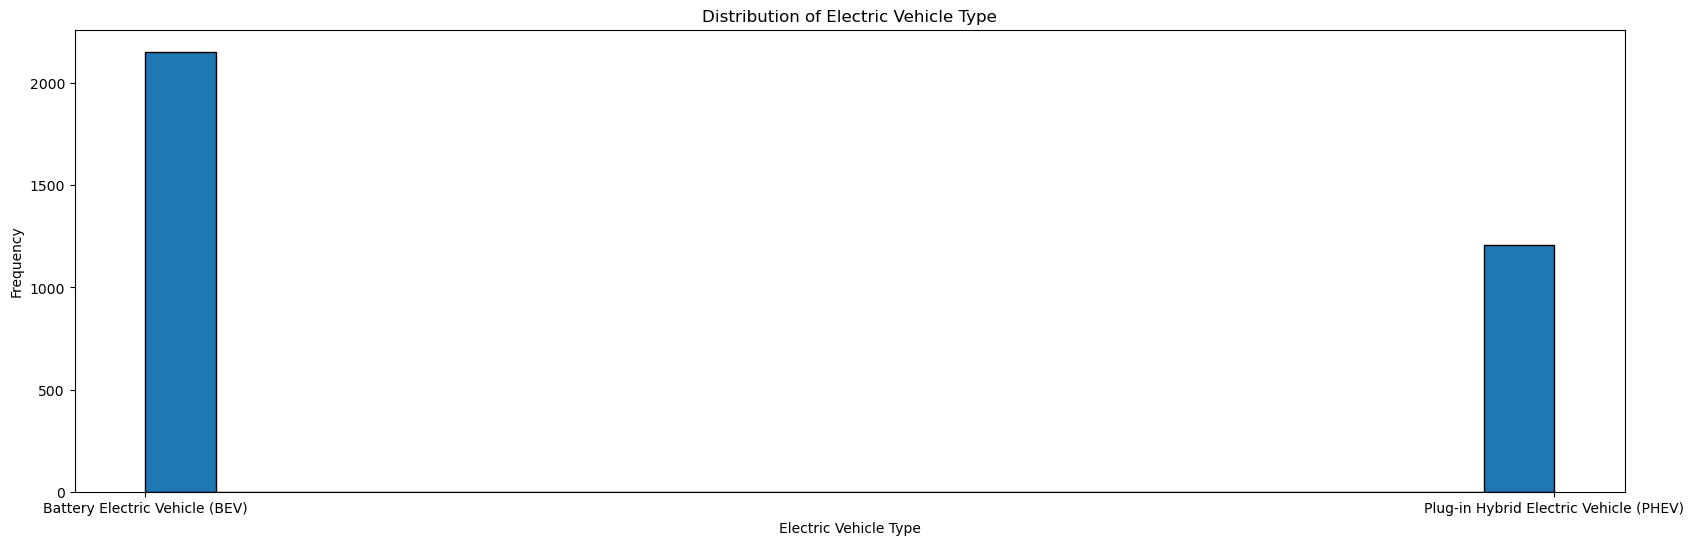

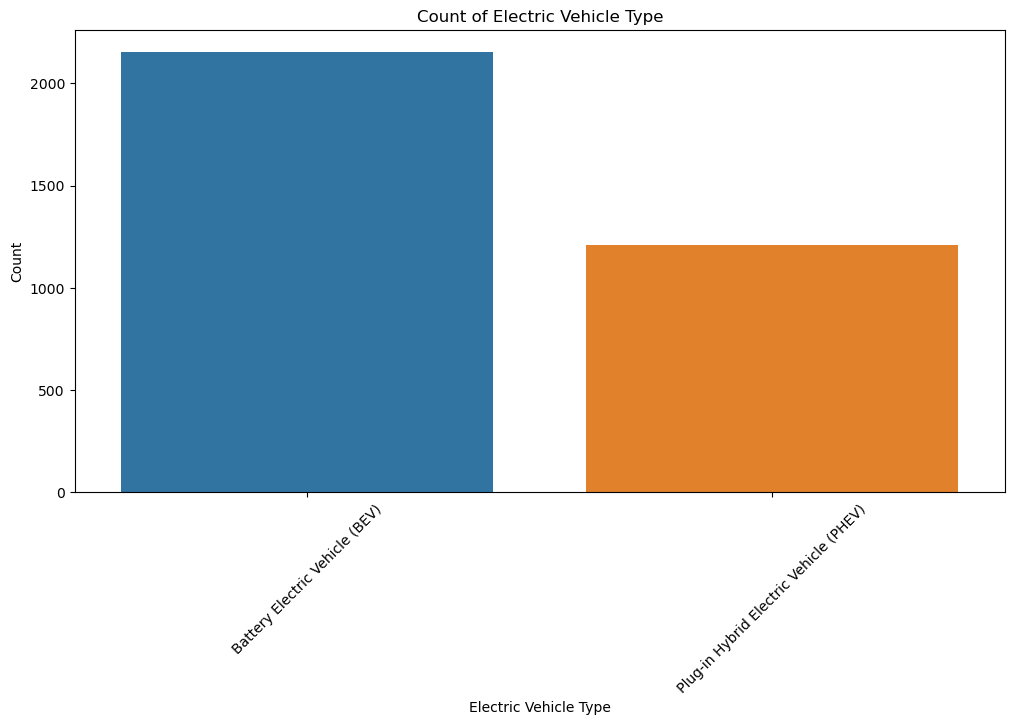

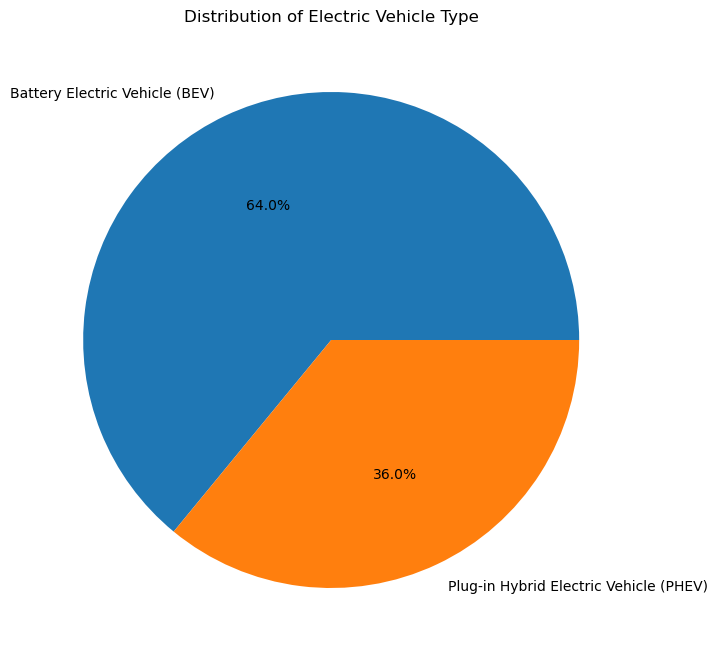

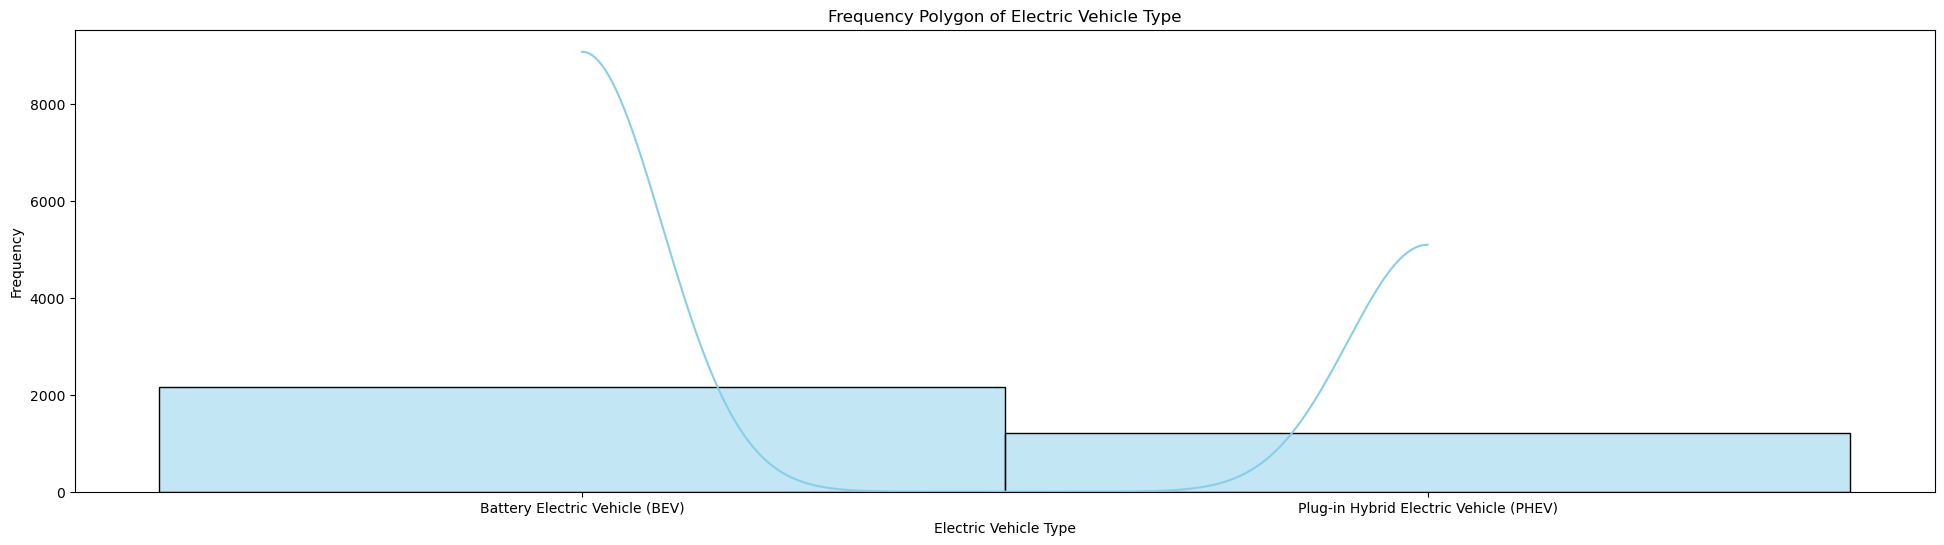

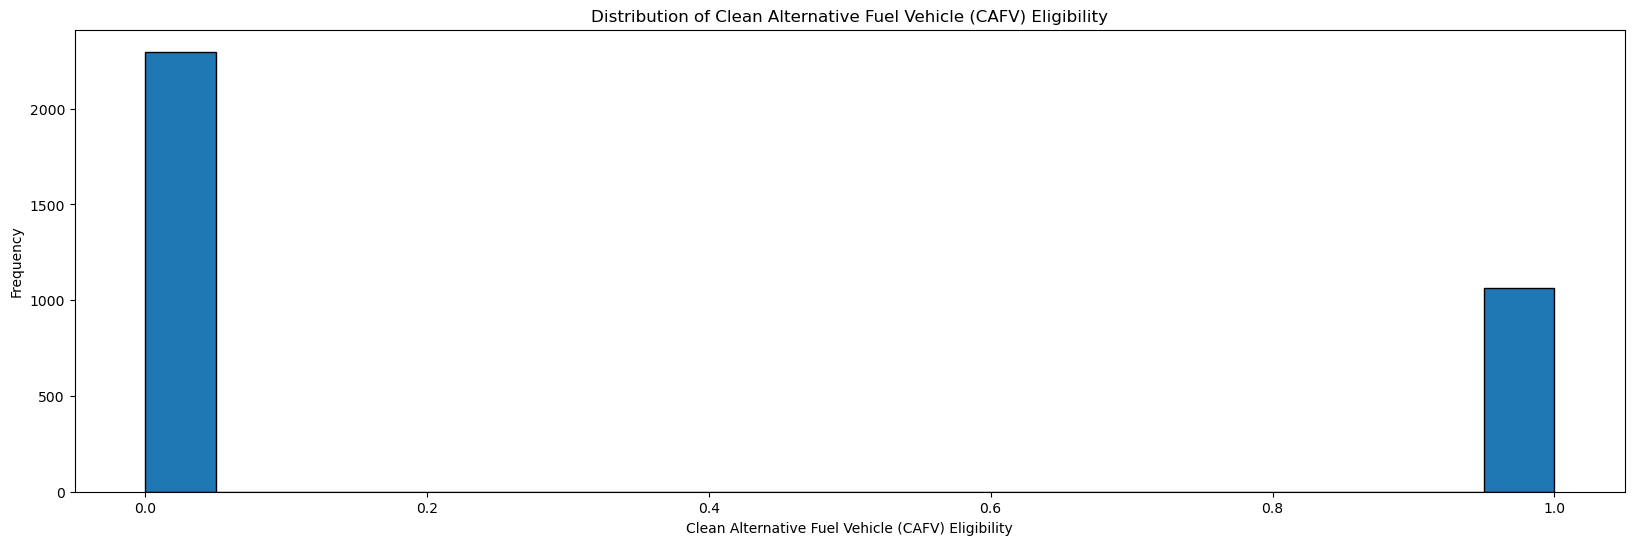

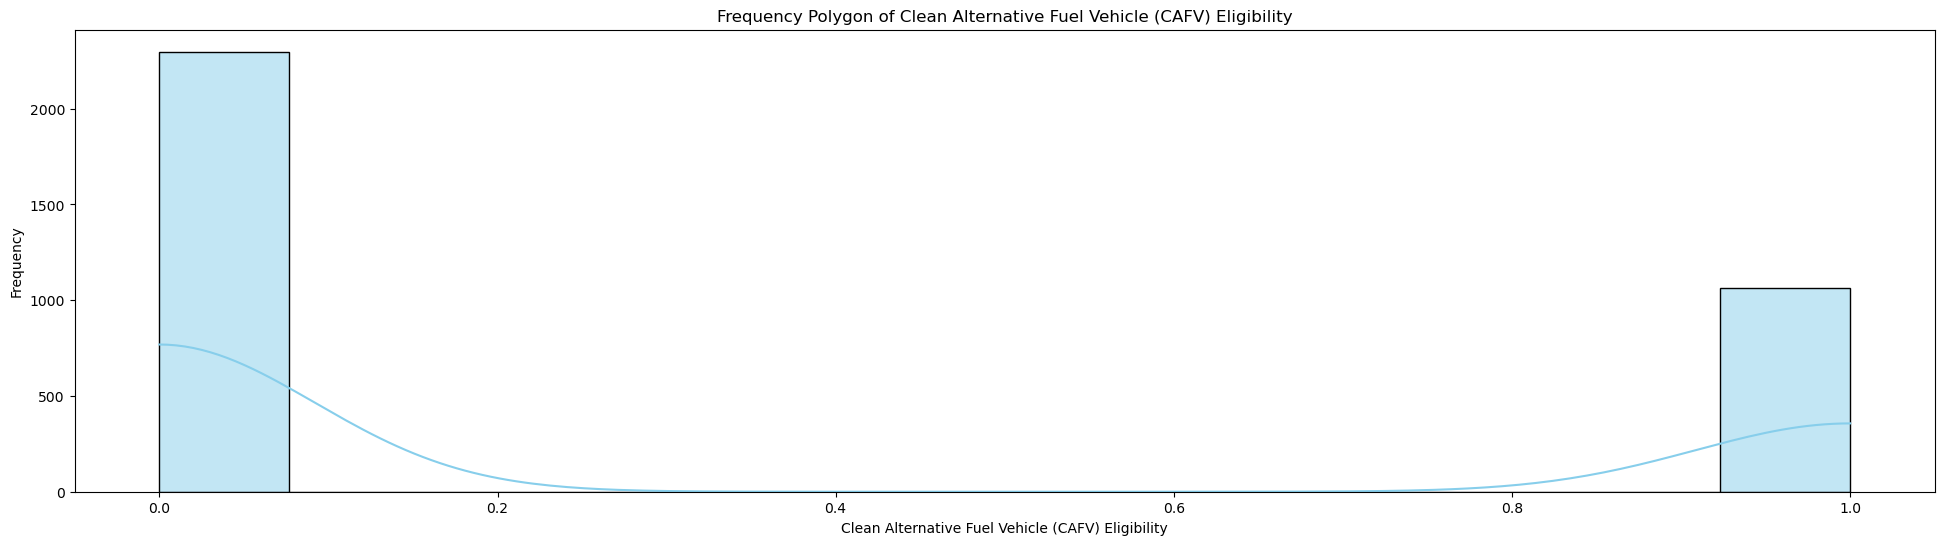

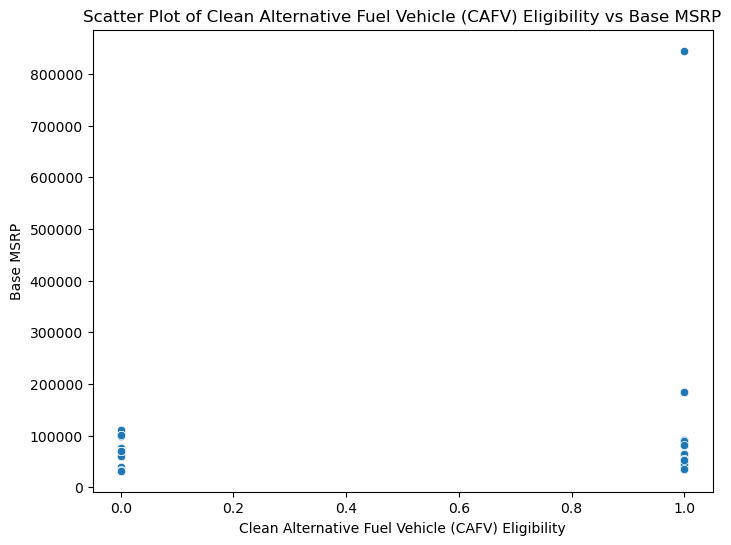

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


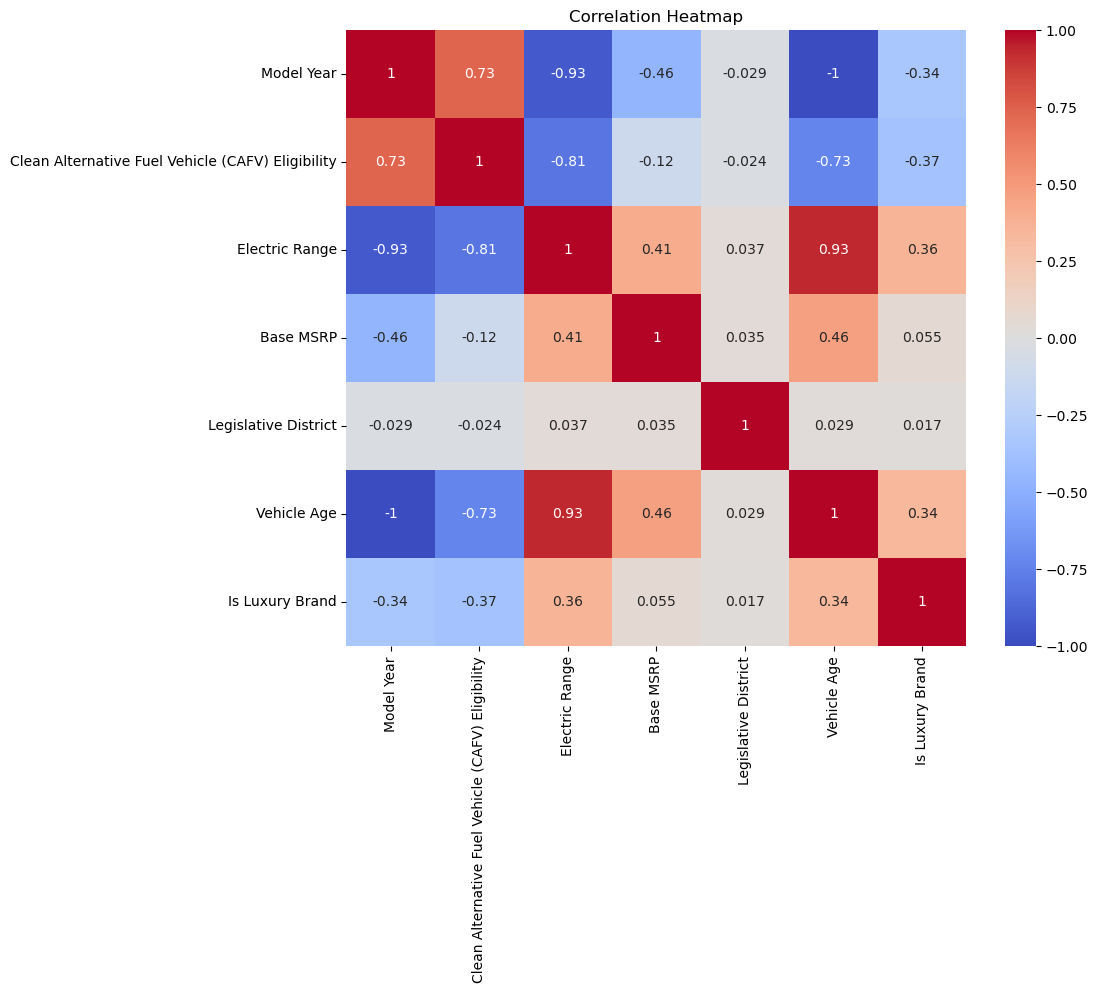

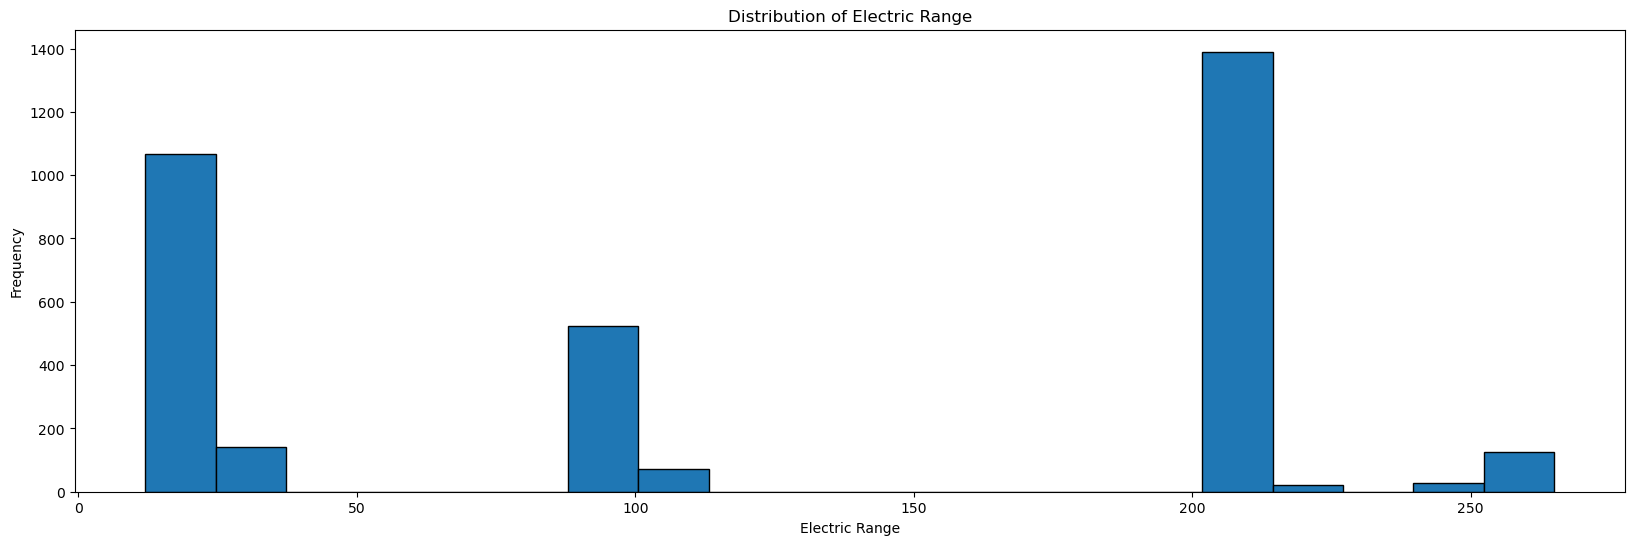

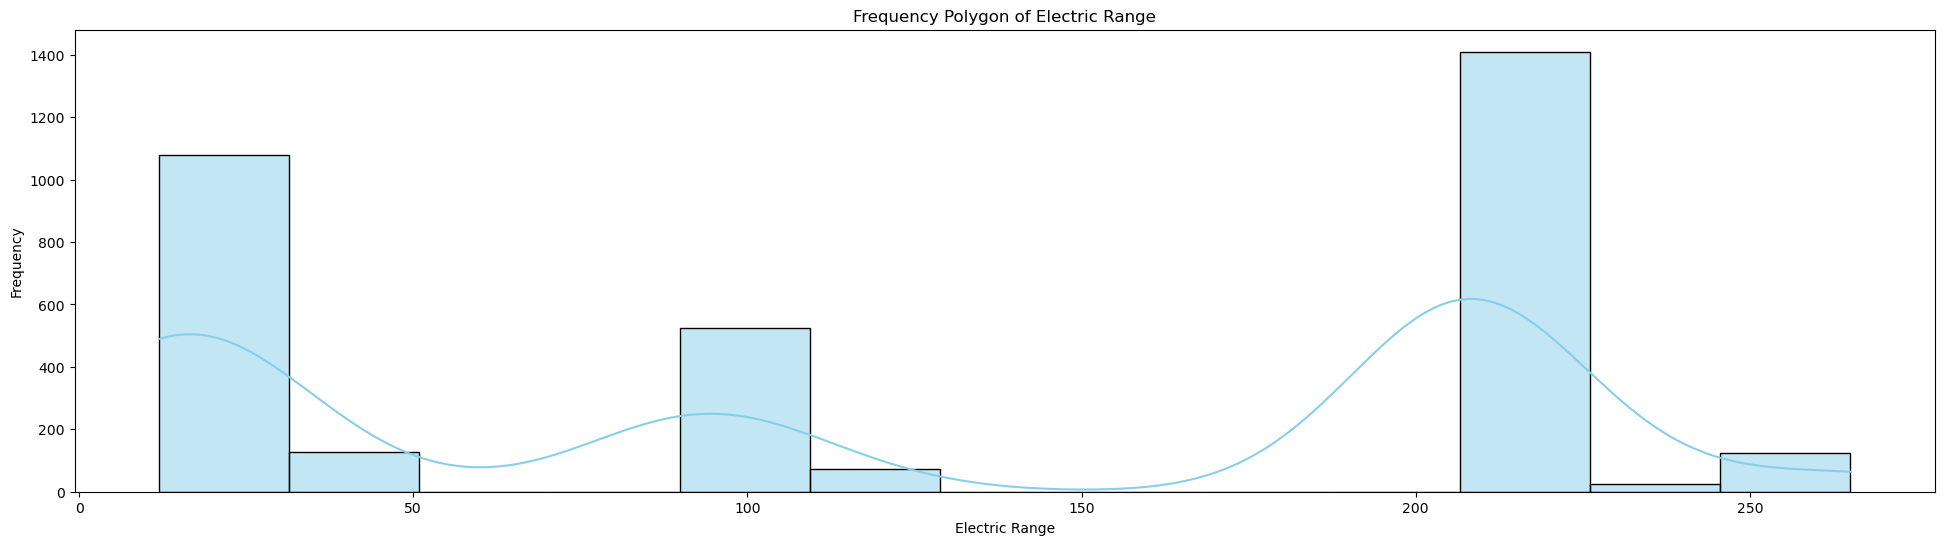

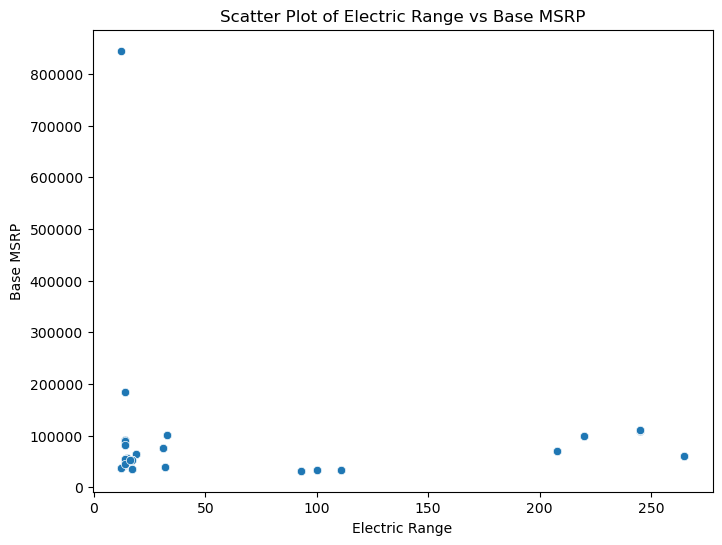

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


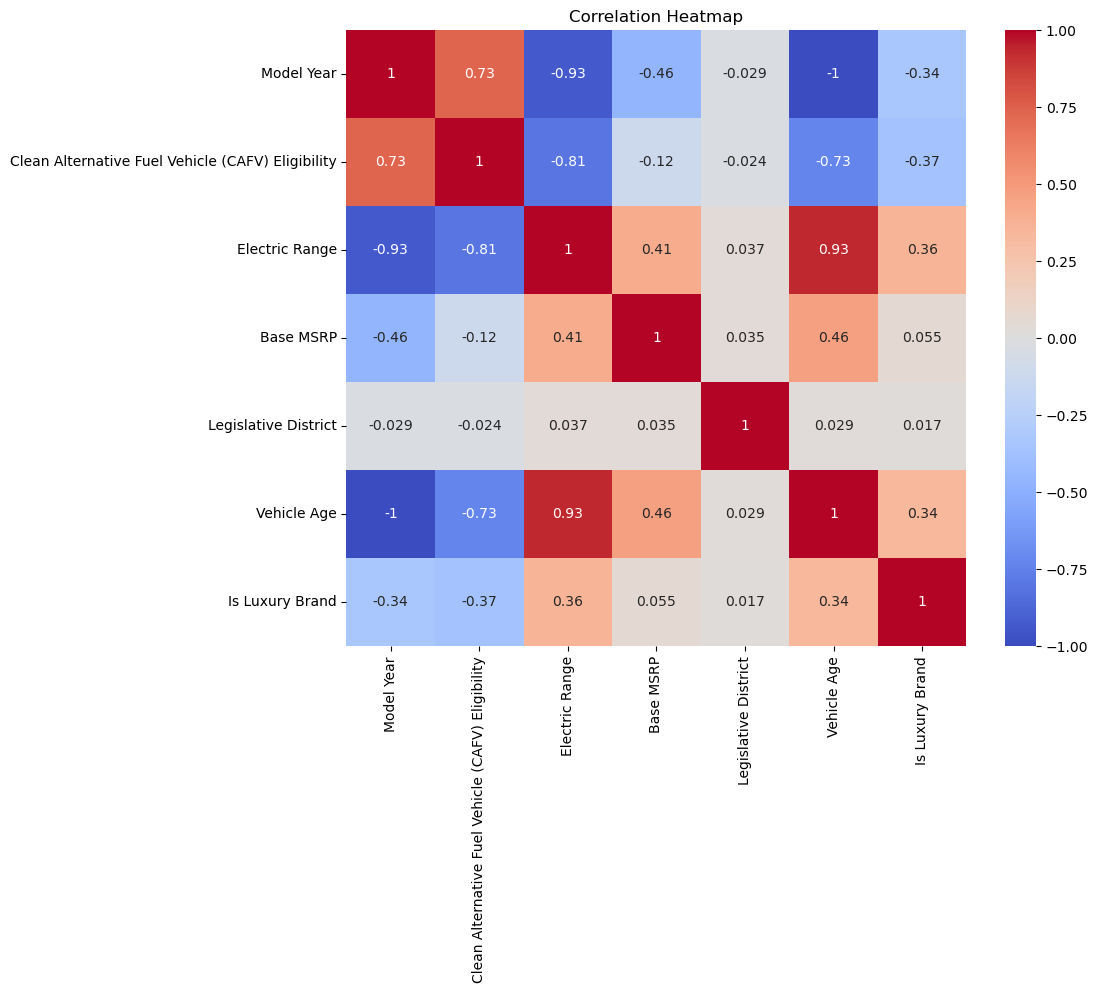

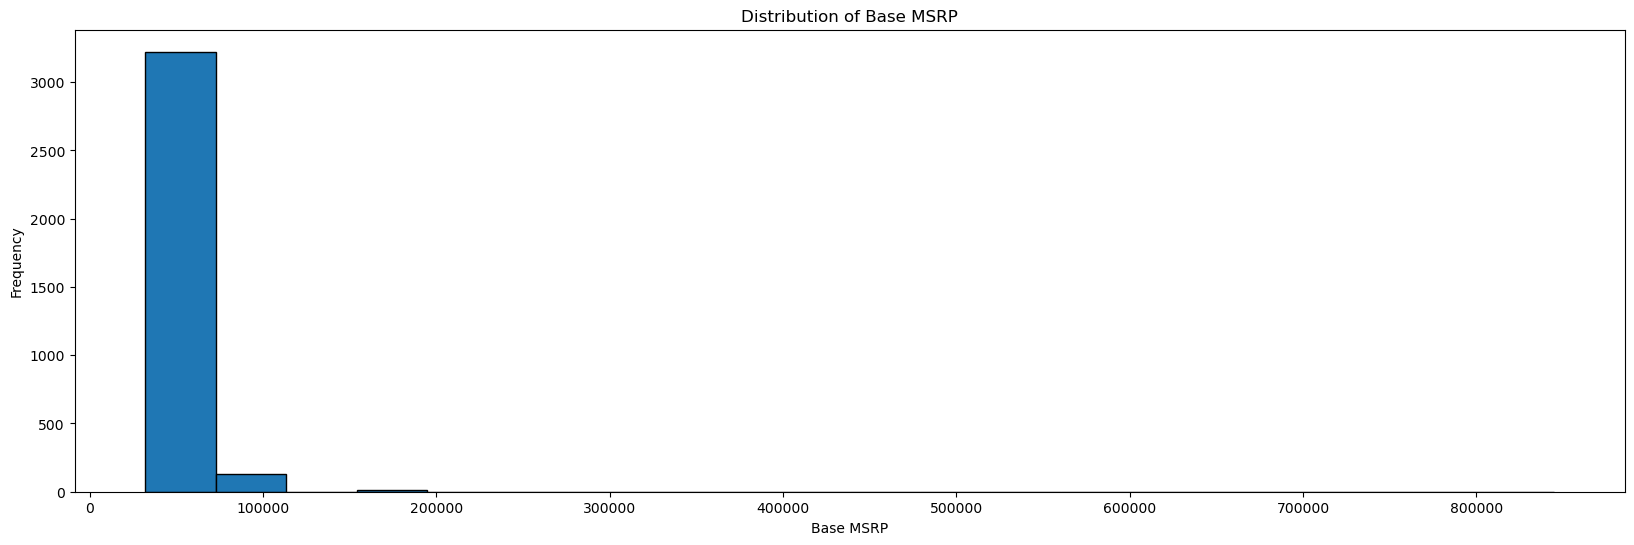

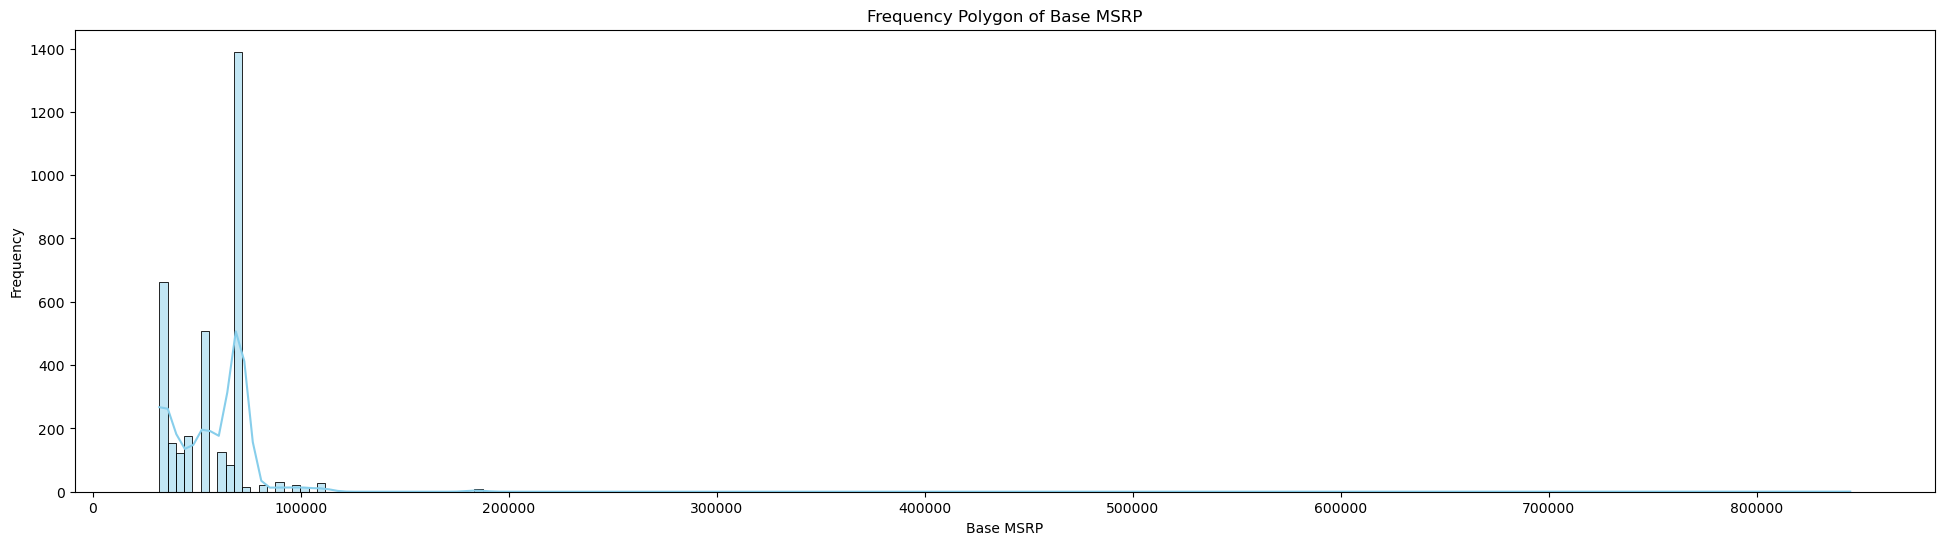

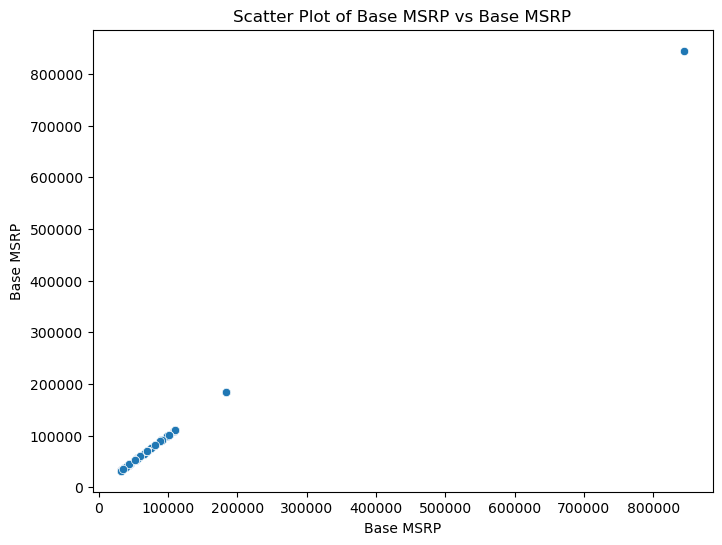

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


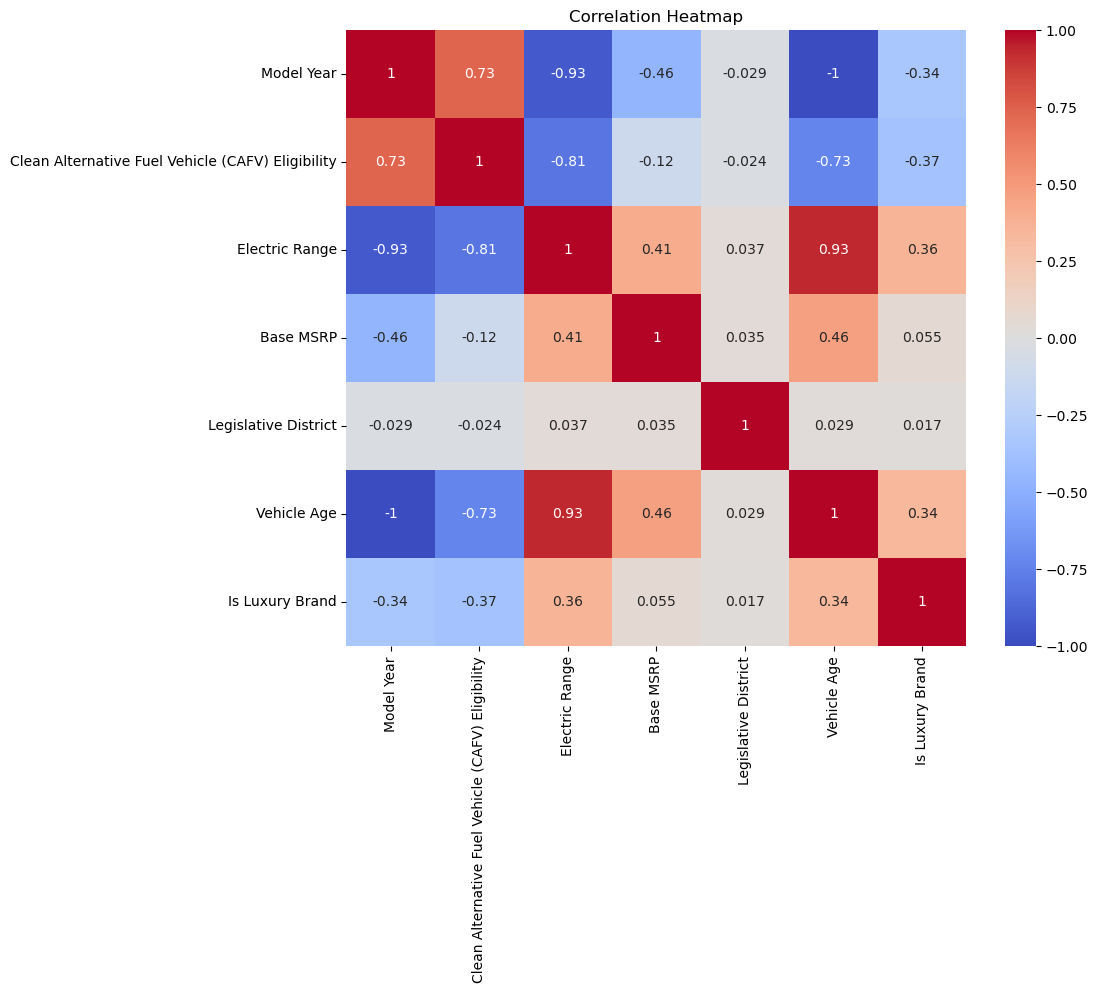

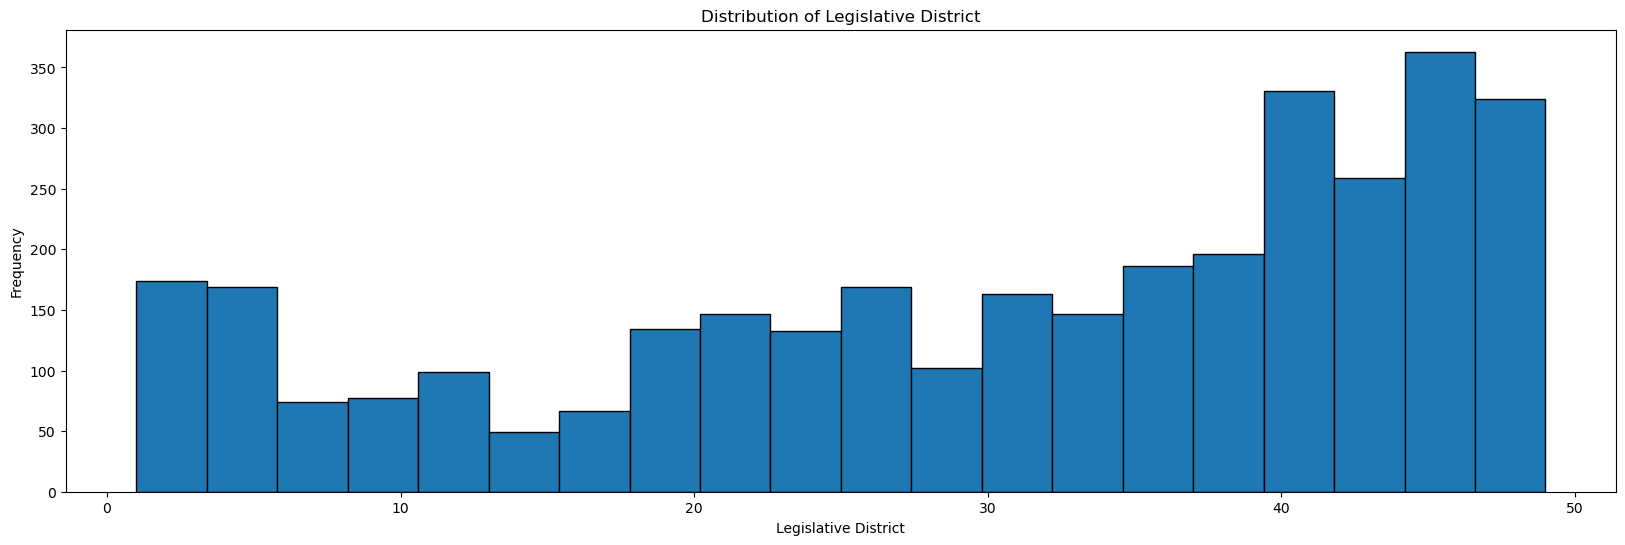

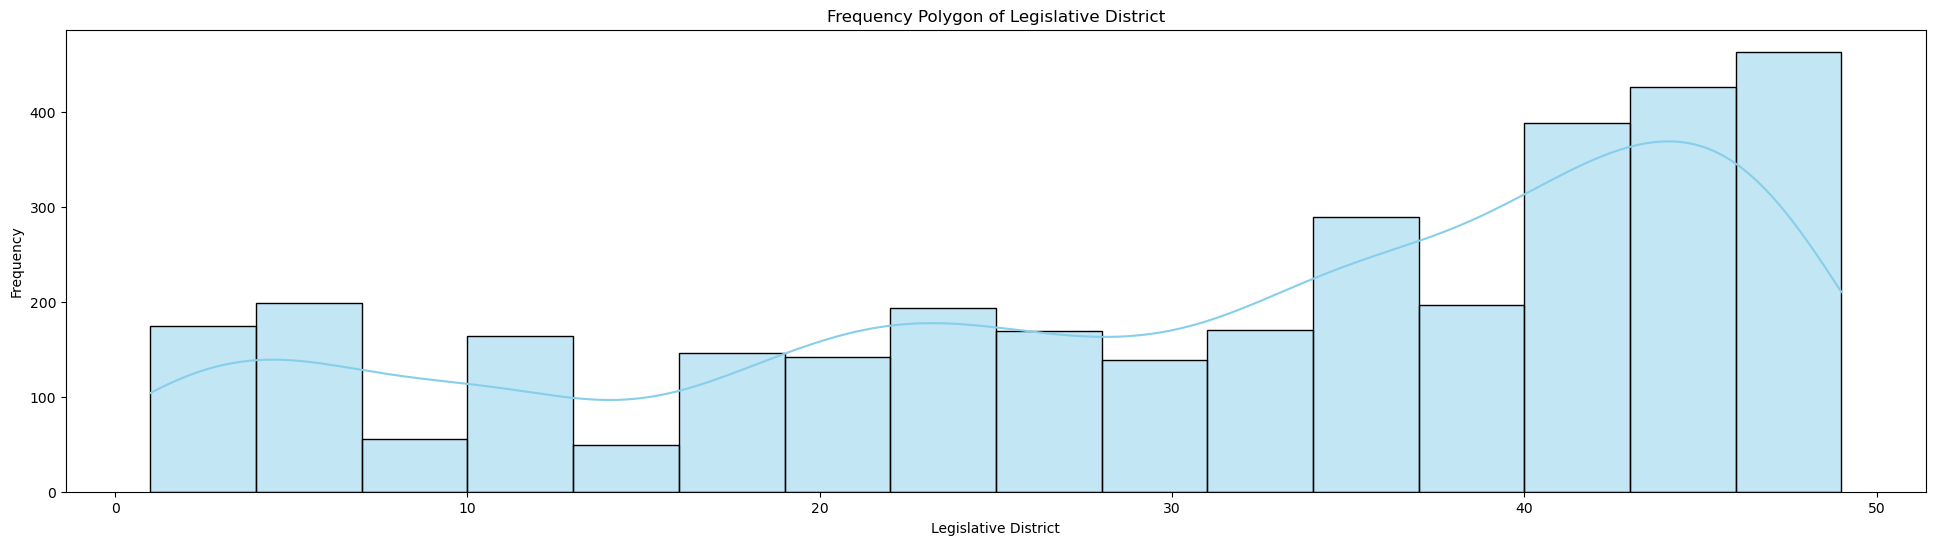

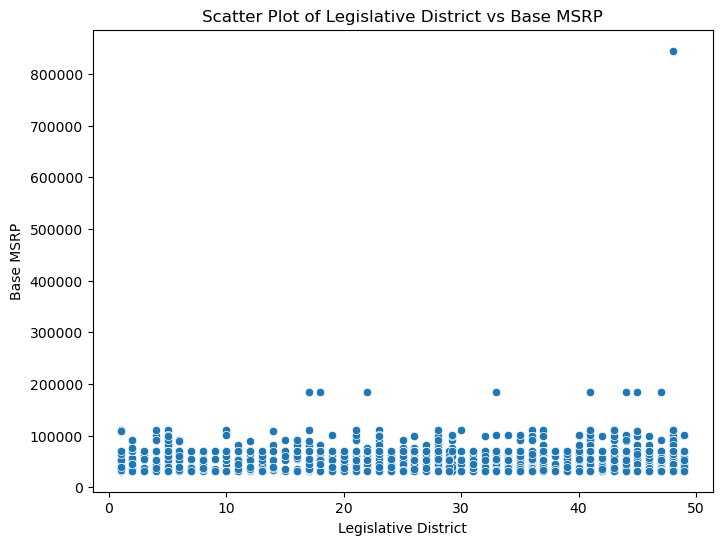

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


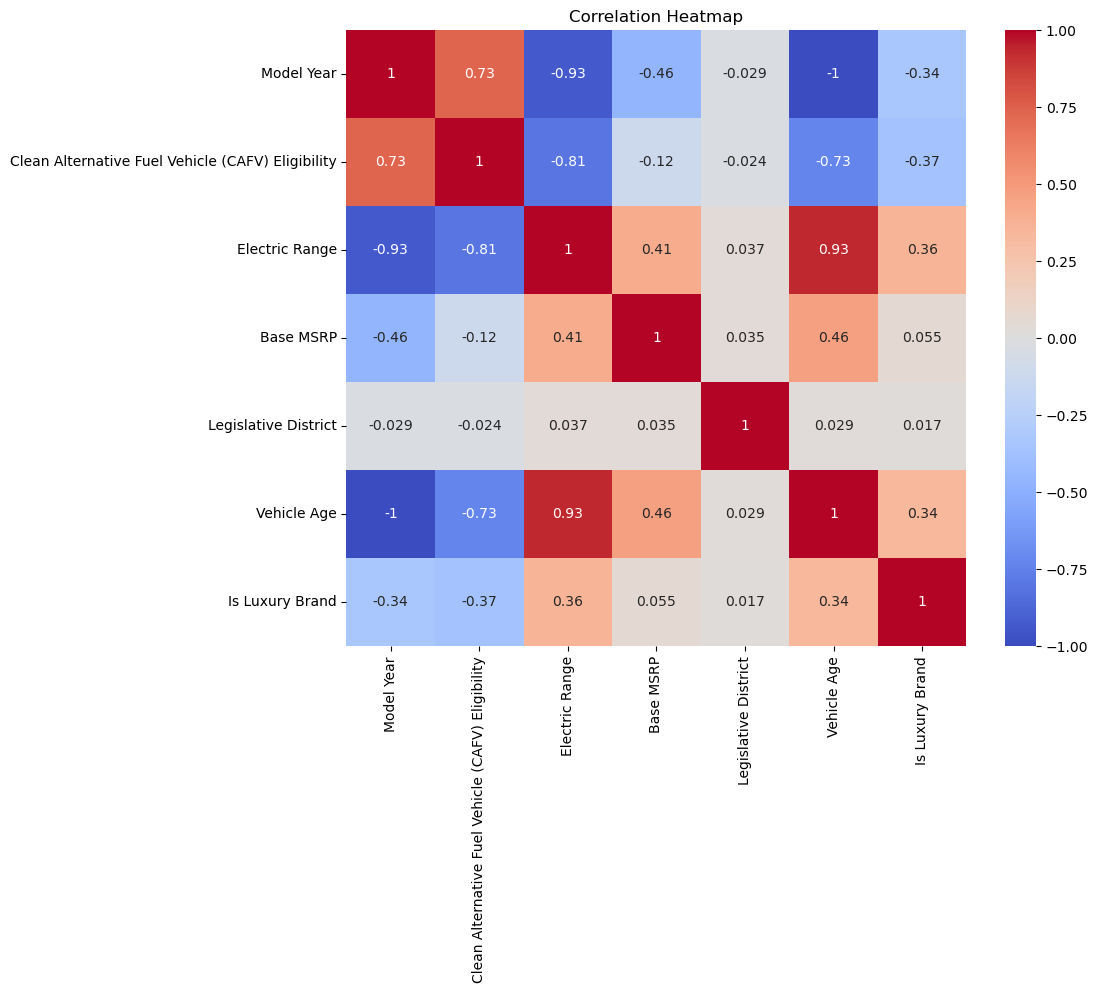

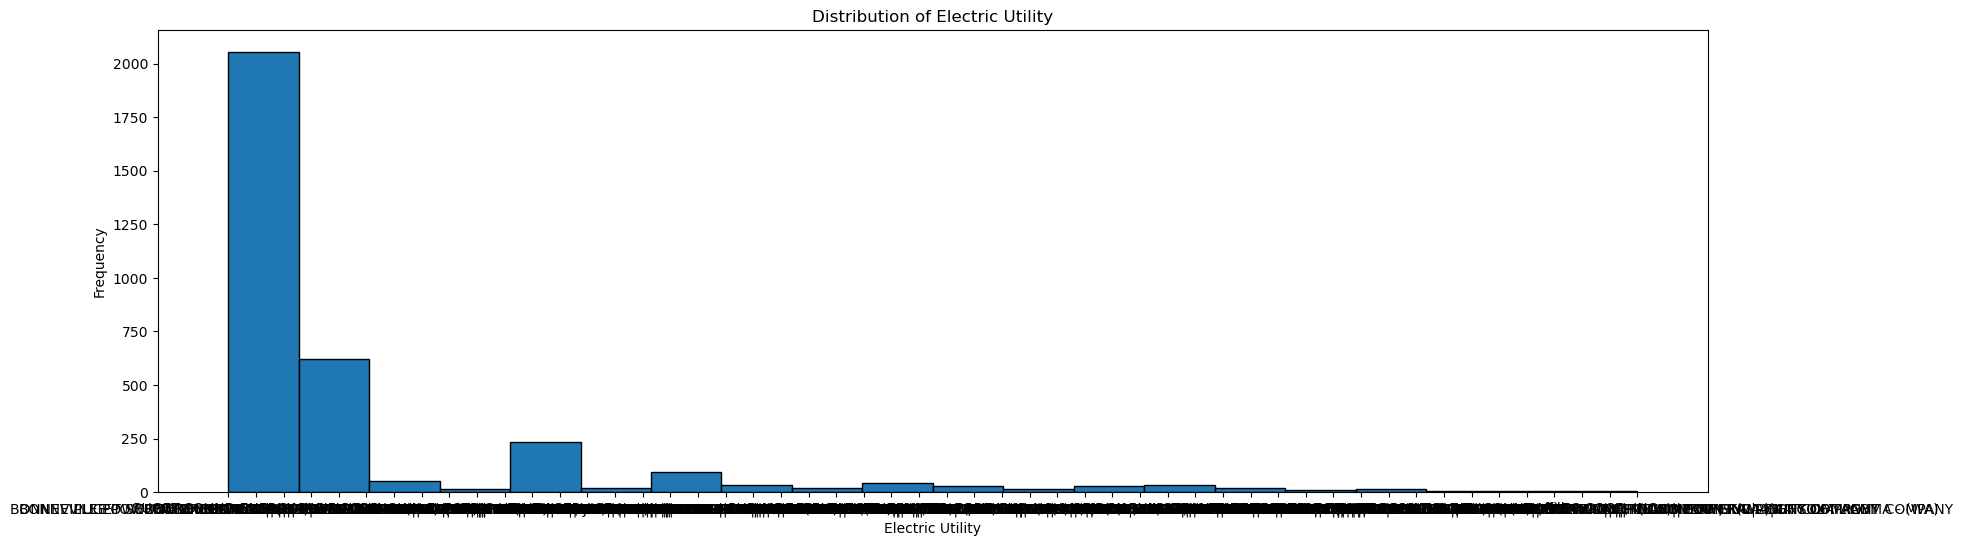

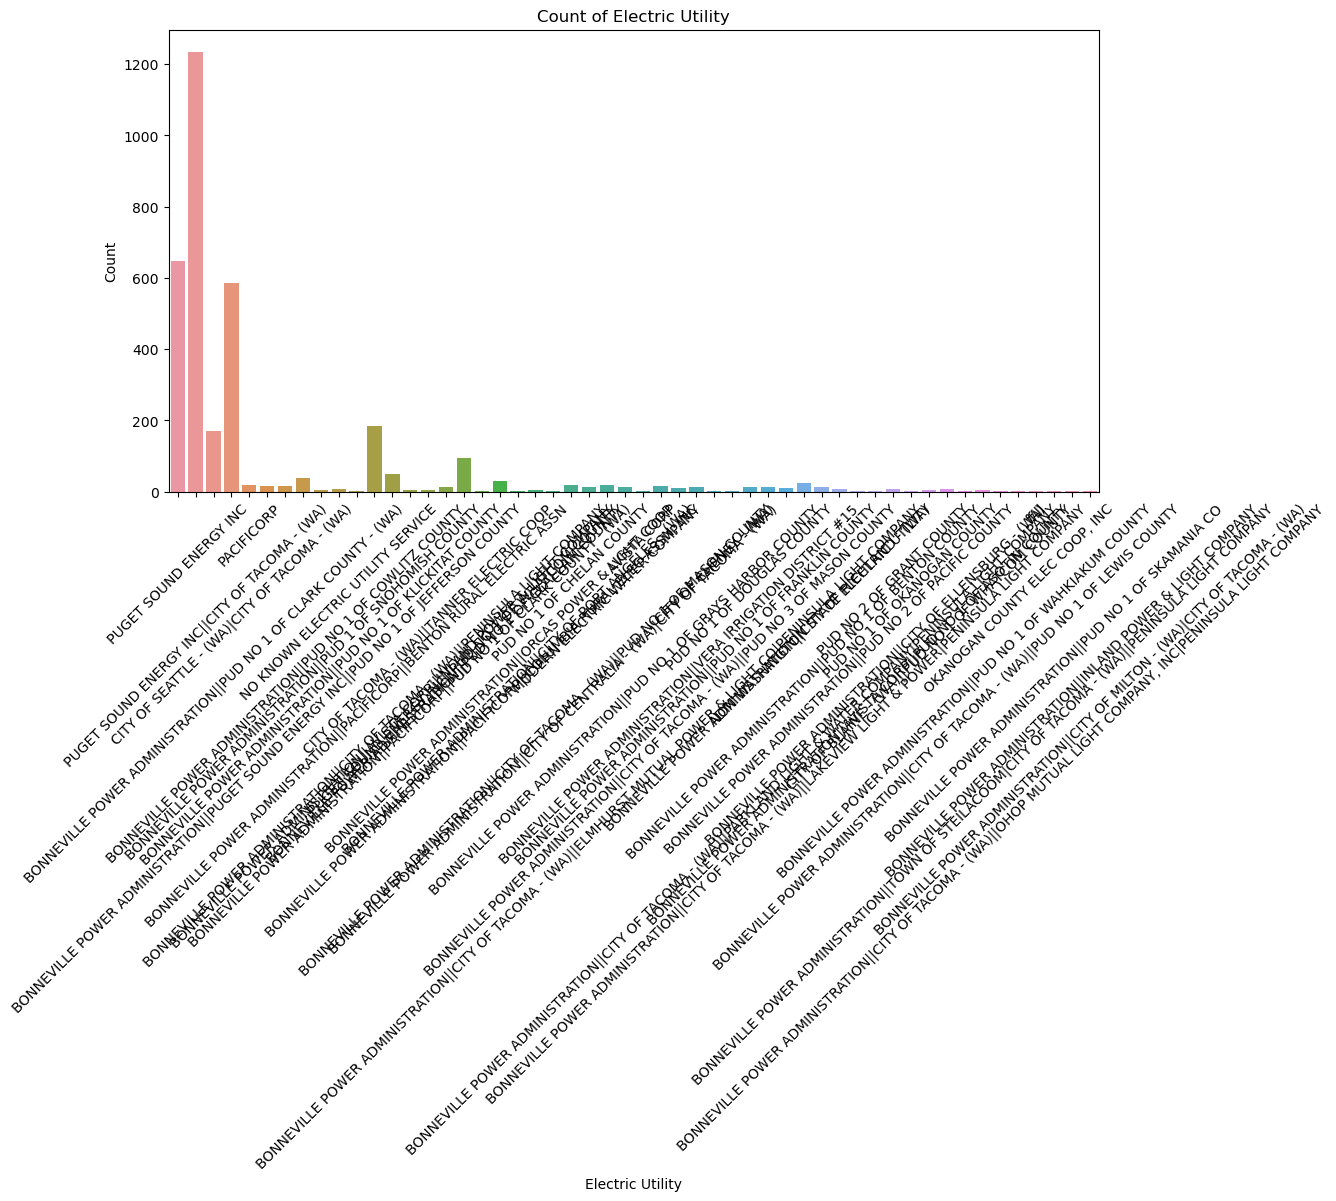

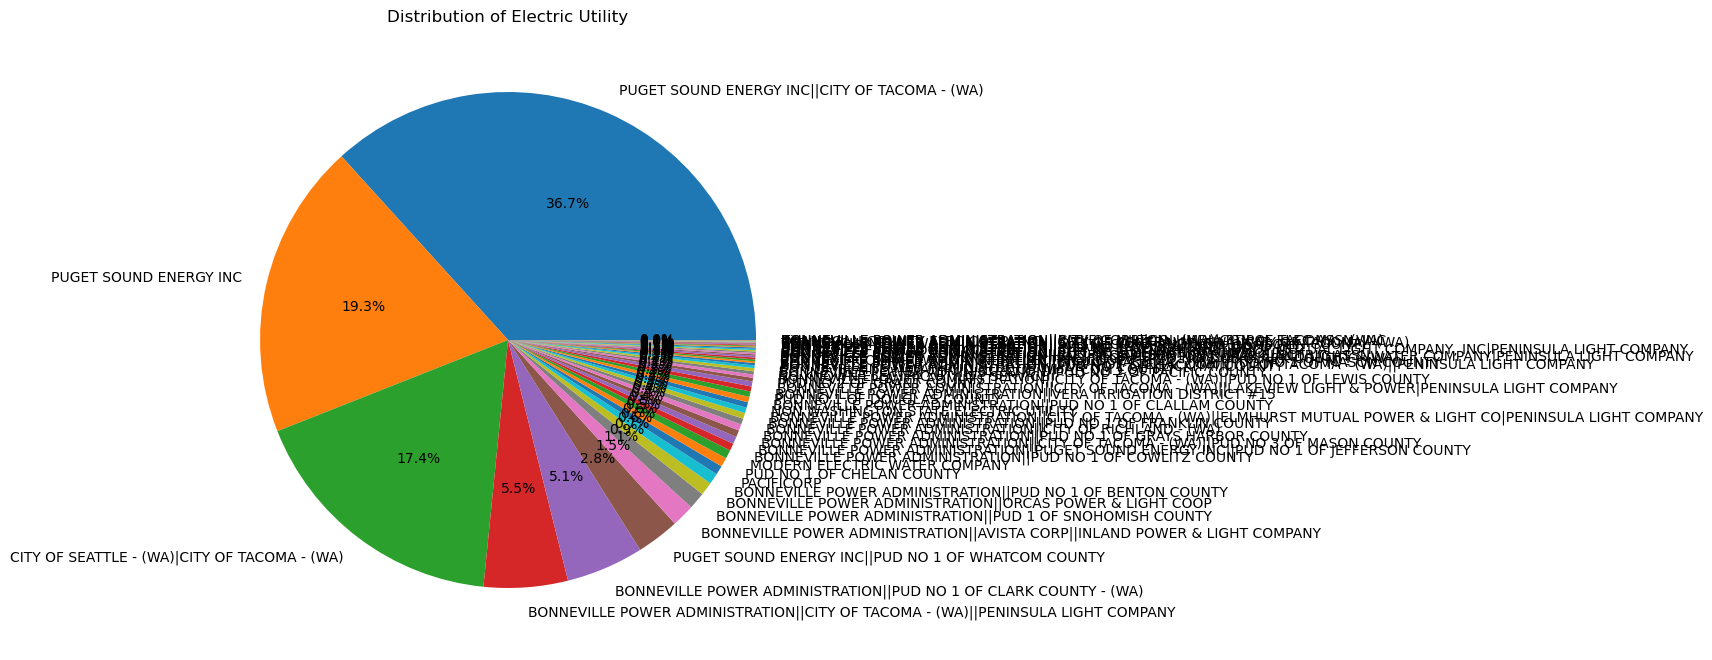

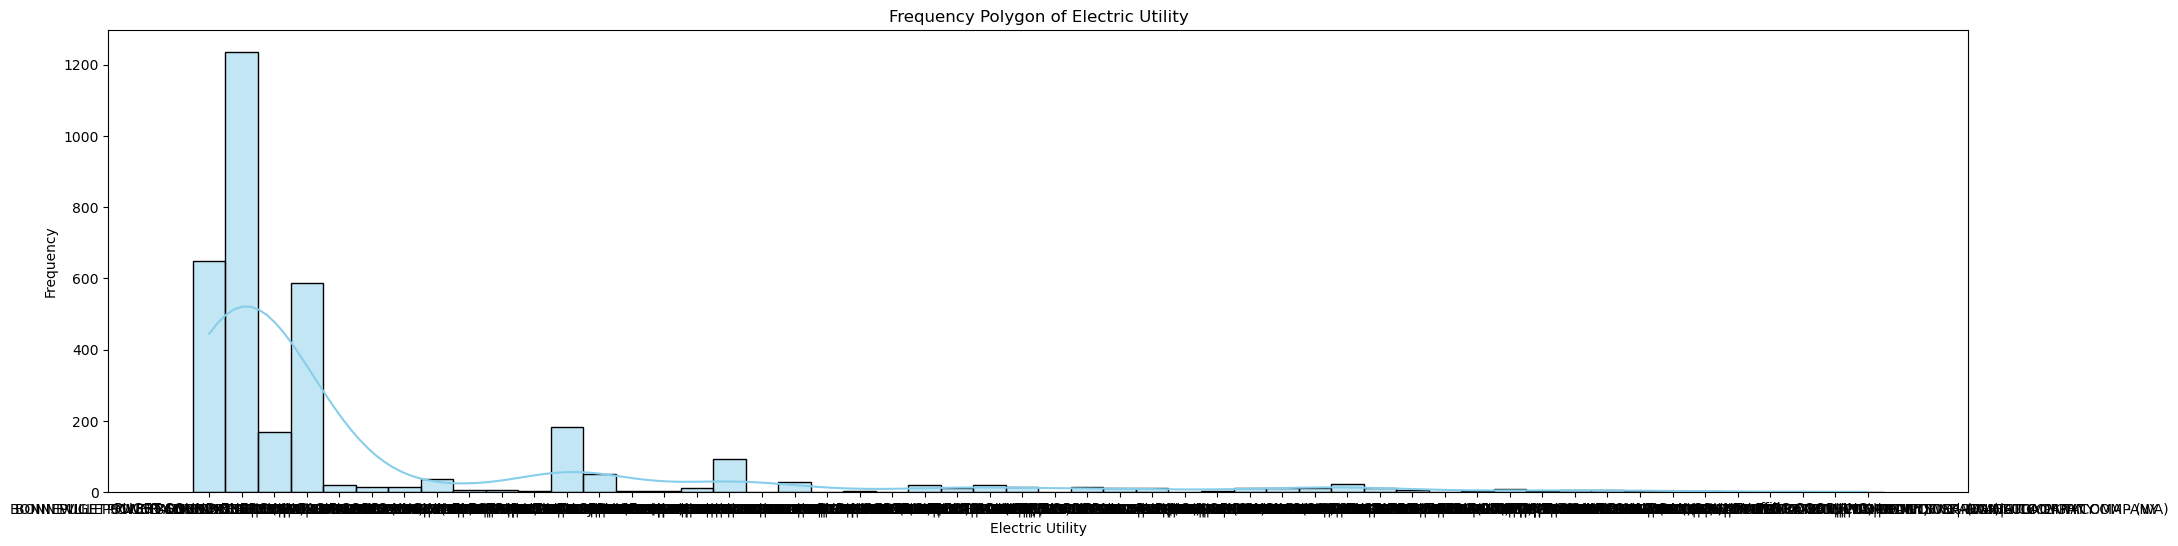

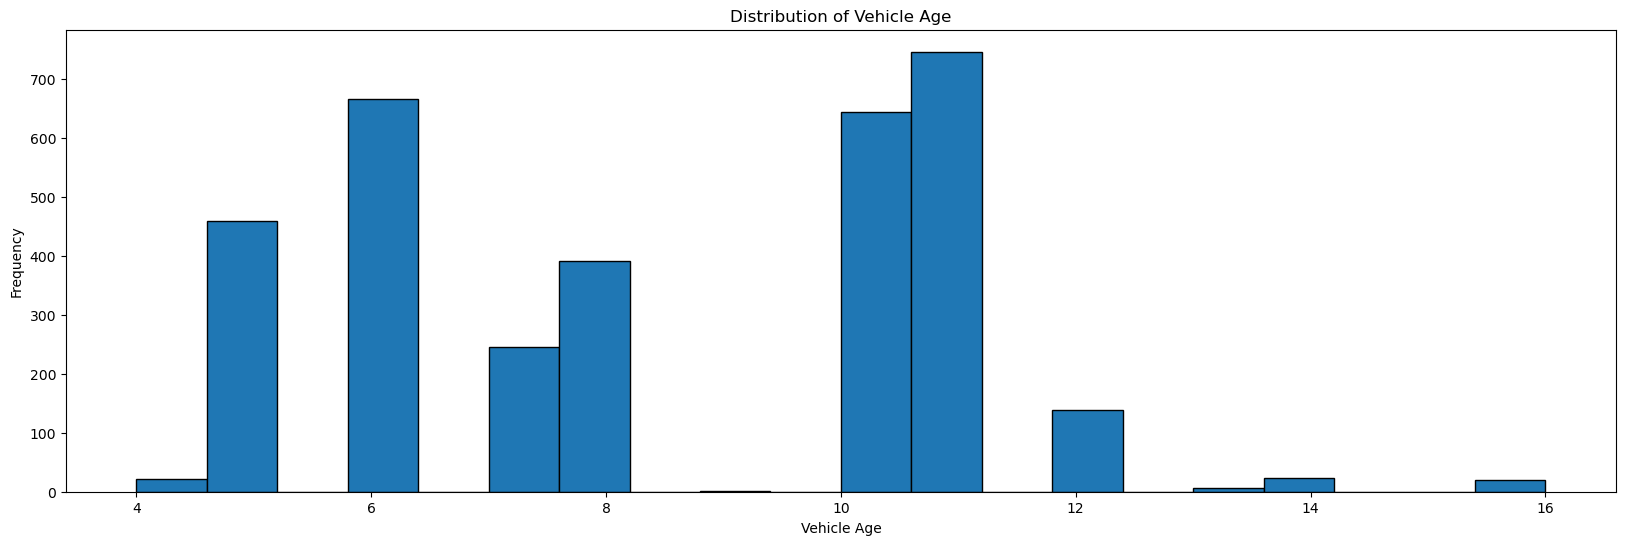

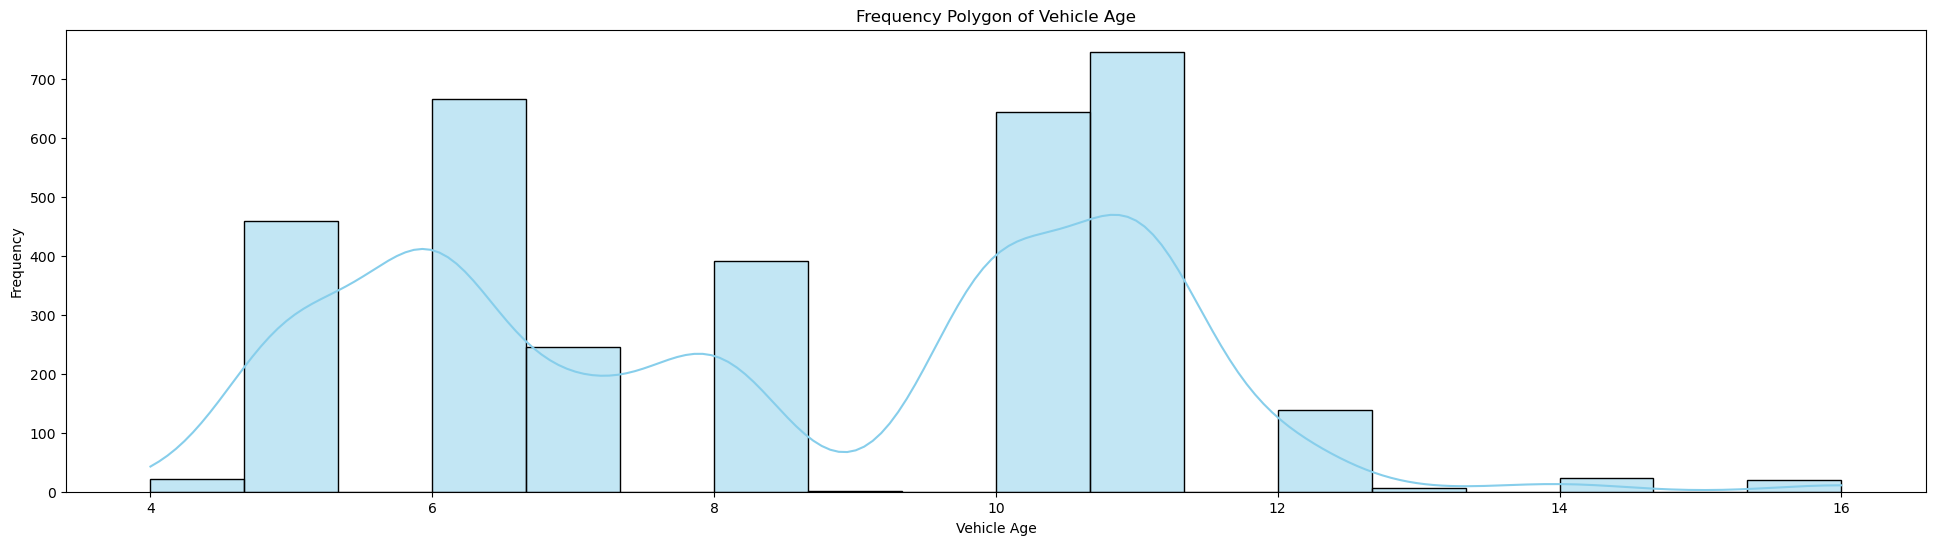

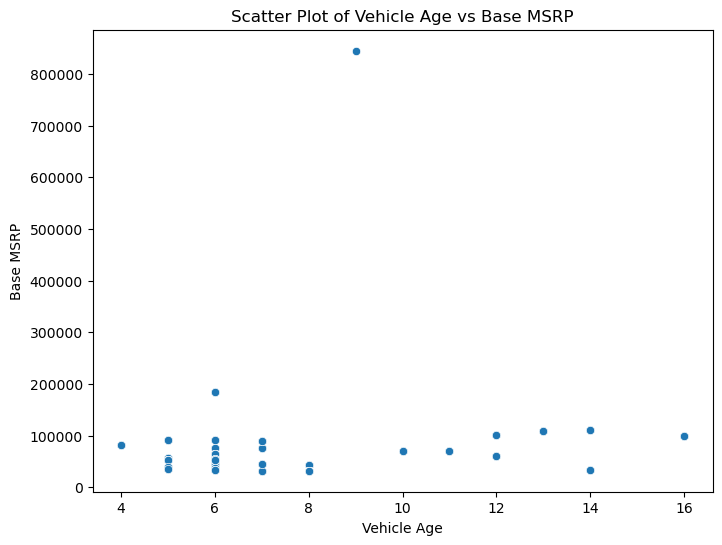

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


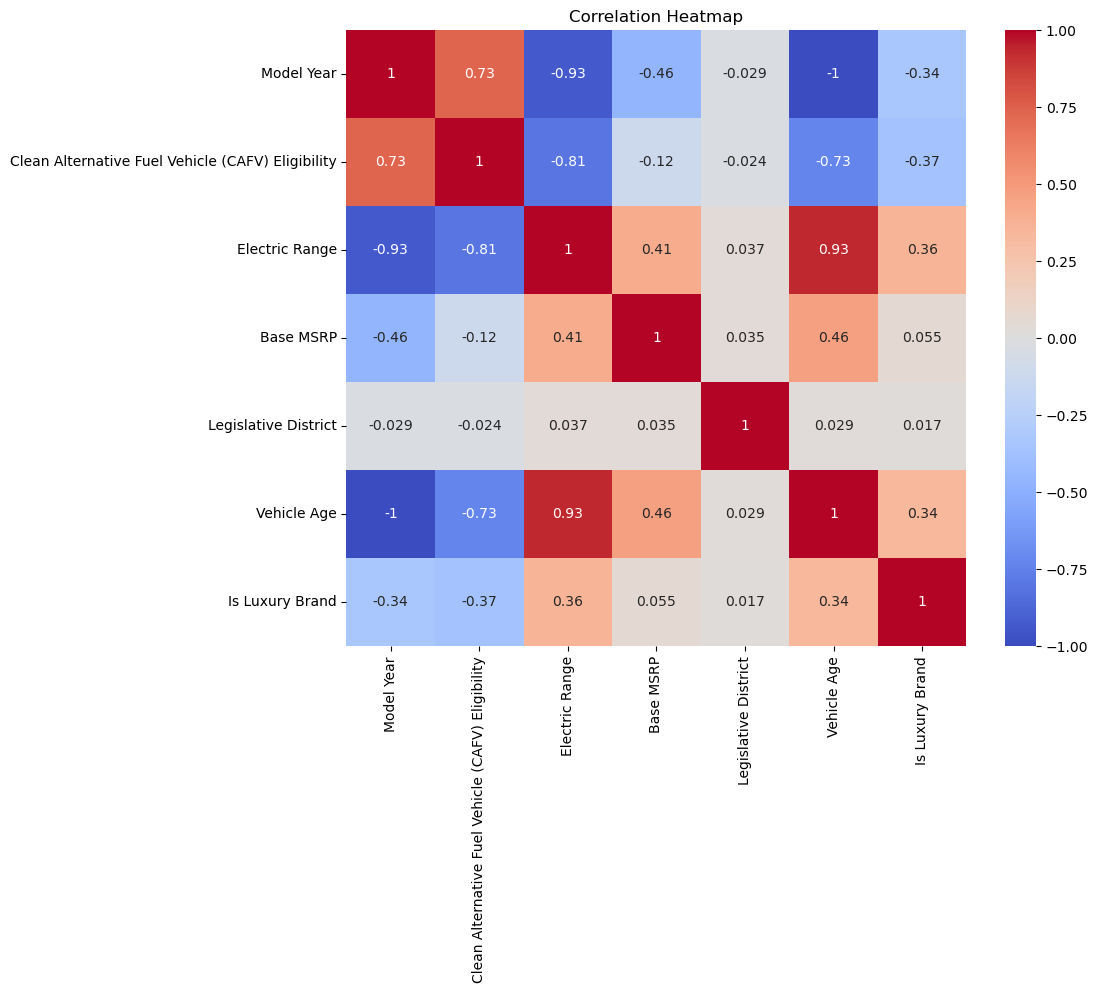

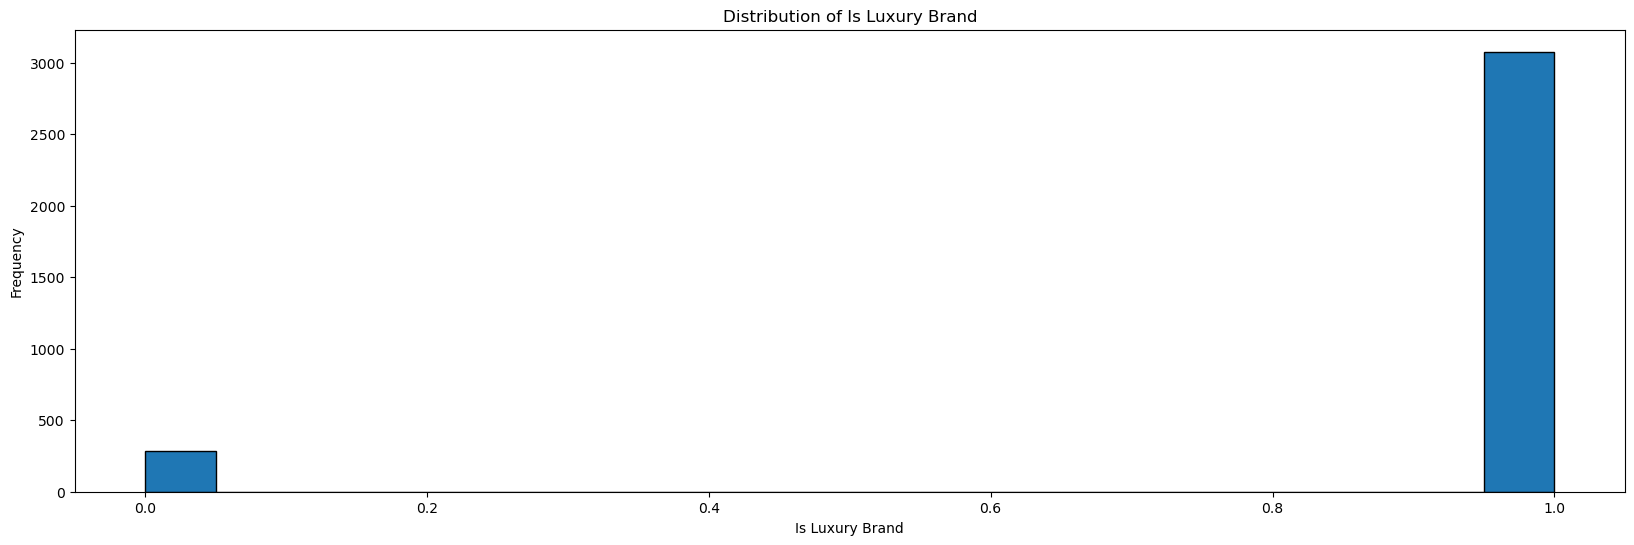

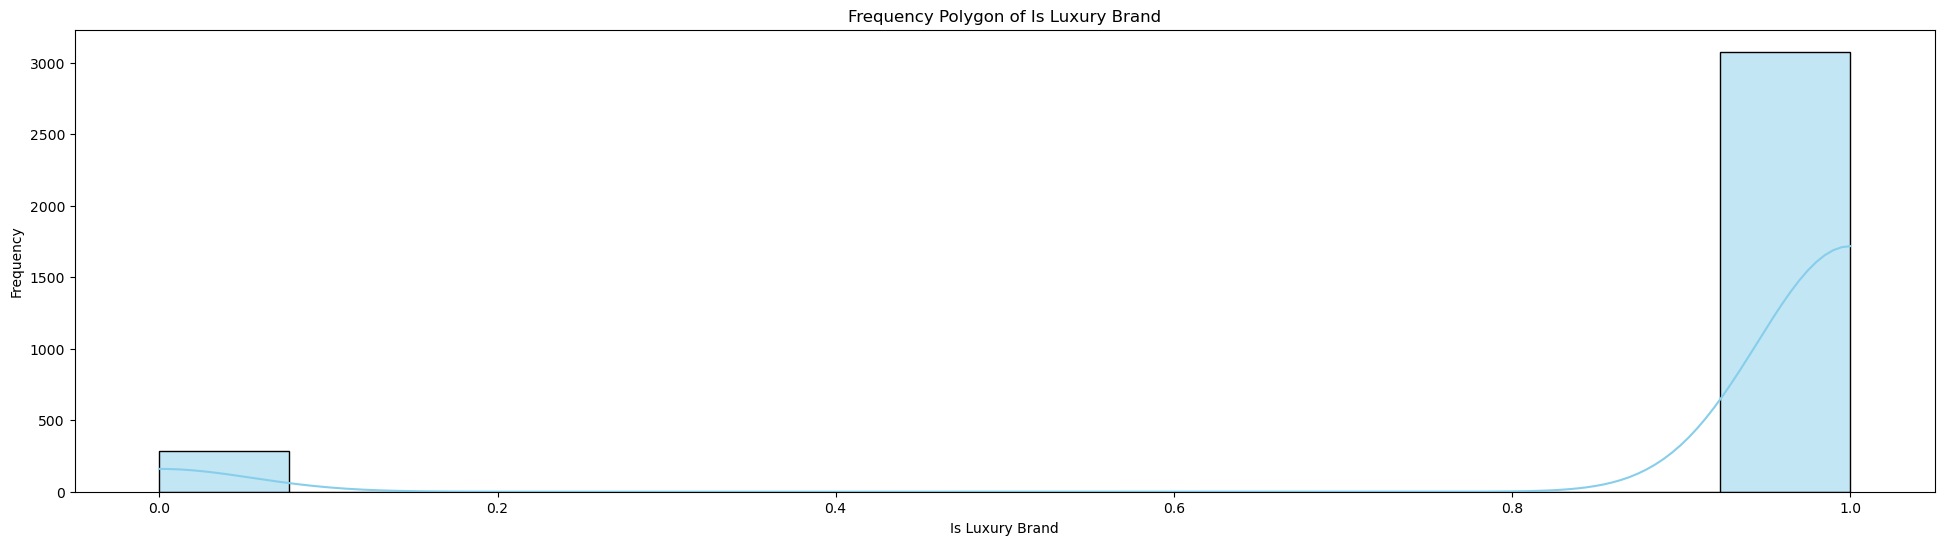

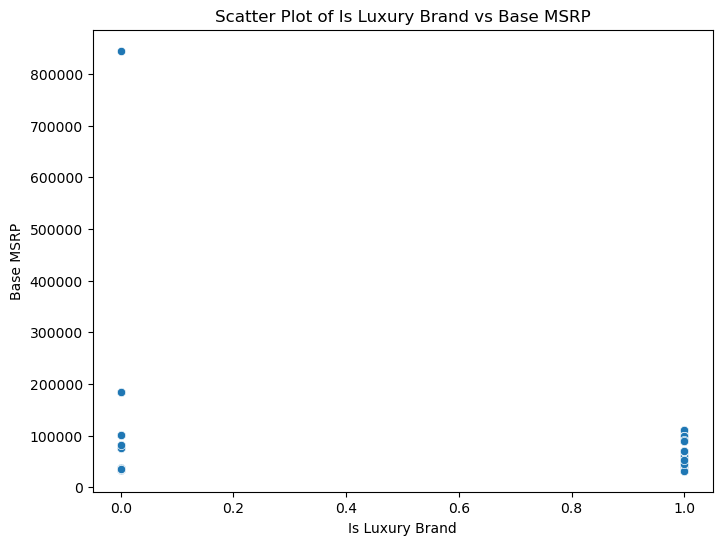

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\2297688952.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')


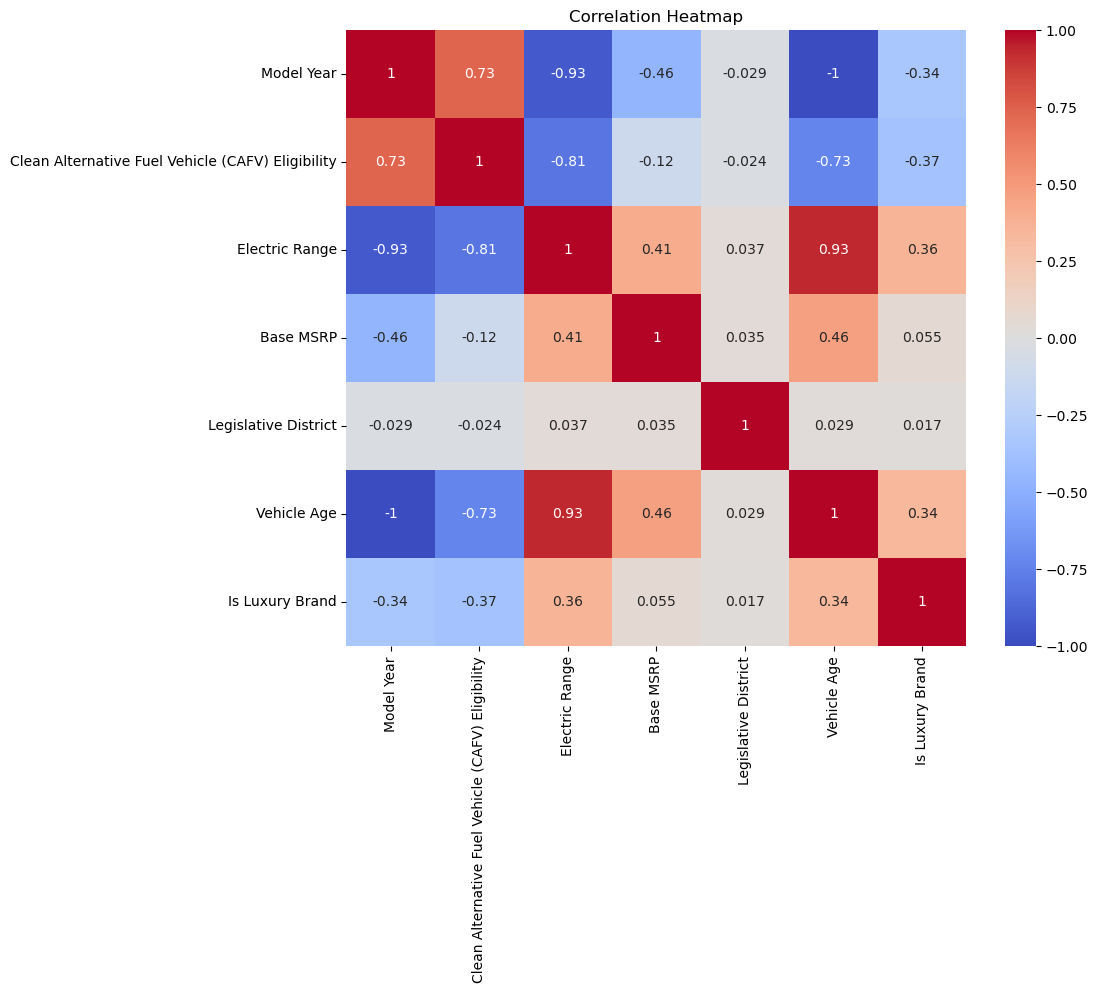

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ['Make', 'Model', 'Electric Vehicle Type', 
            'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
            'Electric Range', 'Base MSRP', 
            'Legislative District', 'Electric Utility', 
            'Vehicle Age', 'Is Luxury Brand']

for feature in features:
    # Histogram
    plt.figure(figsize=(20, 6))
    plt.hist(df2[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Bar Graph
    if df2[feature].dtype == 'object':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df2, x=feature)
        plt.xticks(rotation=45)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Count of {feature}')
        plt.show()
    
    # Pie Chart
    if df2[feature].dtype == 'object':
        plt.figure(figsize=(8,24))
        df2[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')
        plt.show()
    
    # Frequency Polygon
    plt.figure(figsize=(24, 6))
    sns.histplot(df2[feature], kde=True, color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Polygon of {feature}')
    plt.show()
    
    # Scatter Plot
    if df2[feature].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df2, x=feature, y='Base MSRP')
        plt.xlabel(feature)
        plt.ylabel('Base MSRP')
        plt.title(f'Scatter Plot of {feature} vs Base MSRP')
        plt.show()
    
    # Heatmap
    if df2[feature].dtype != 'object':
        plt.figure(figsize=(10, 8))
        sns.heatmap(data=df2.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()


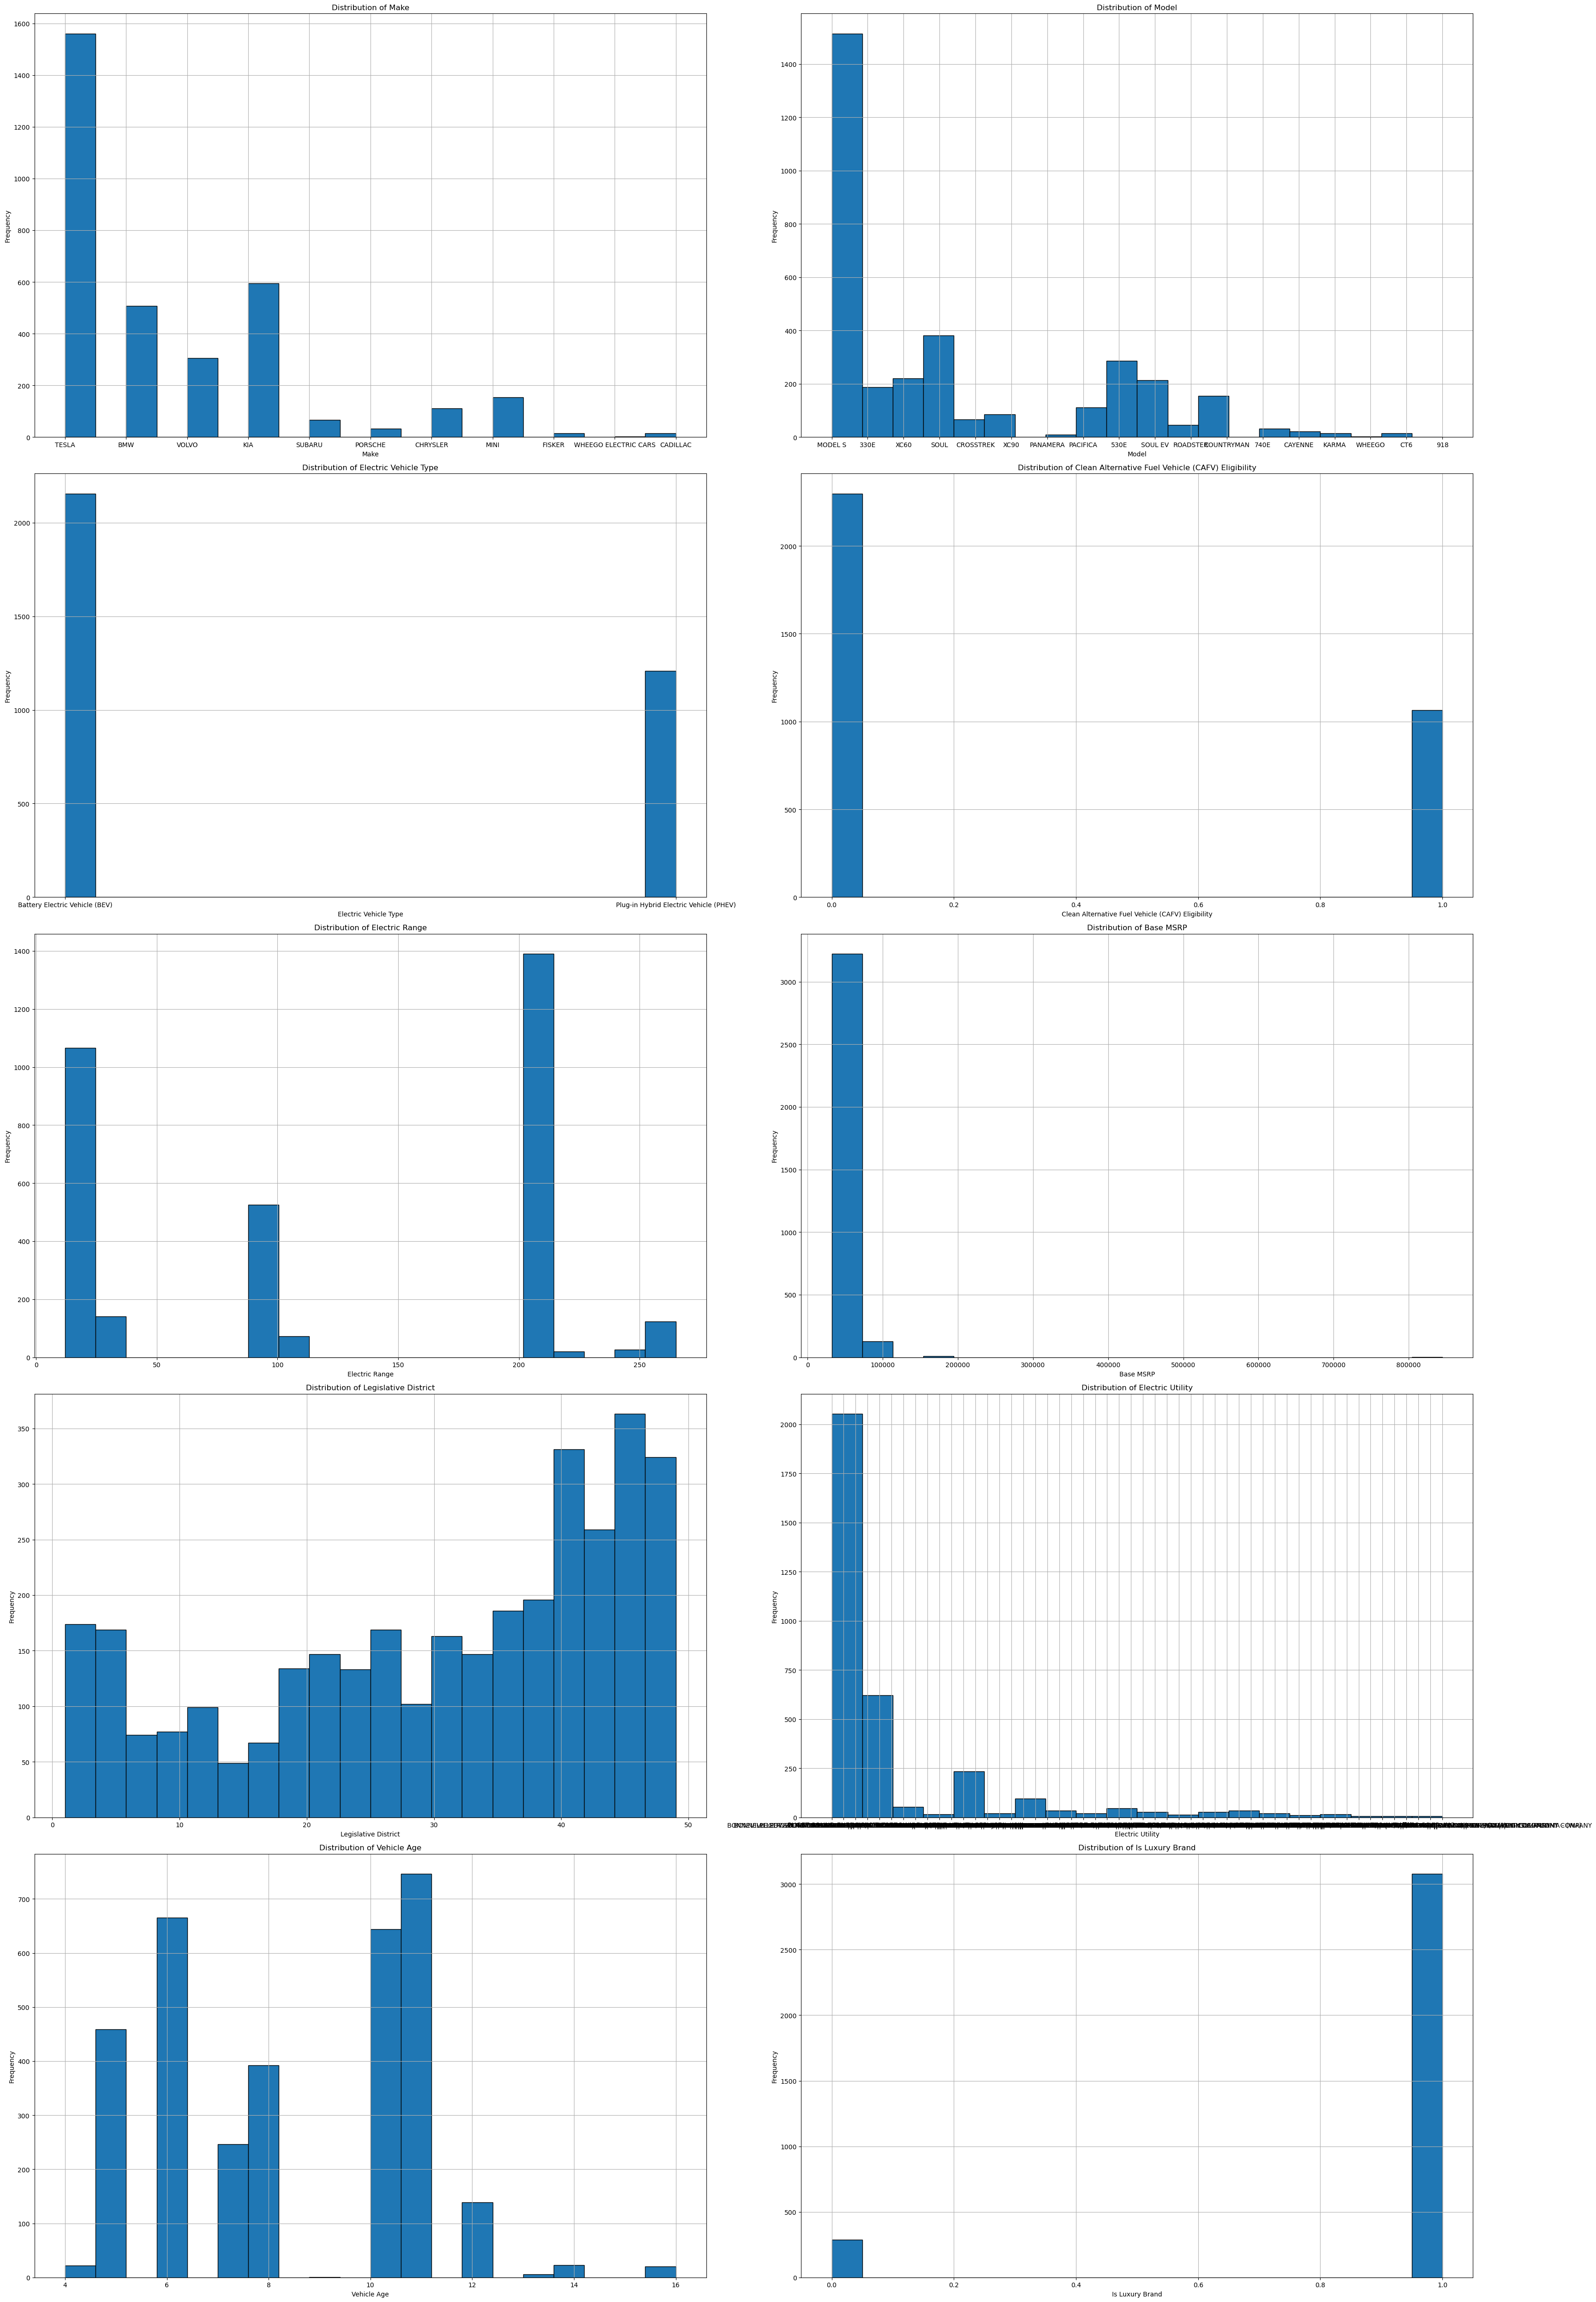

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ['Make', 'Model', 'Electric Vehicle Type', 
            'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
            'Electric Range', 'Base MSRP', 
            'Legislative District', 'Electric Utility', 
            'Vehicle Age', 'Is Luxury Brand']

# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_cols = 2
num_rows = (num_features - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 10*num_rows))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

for i, feature in enumerate(features):
    # Histogram
    axes[i].hist(df2[feature], bins=20, edgecolor='black')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

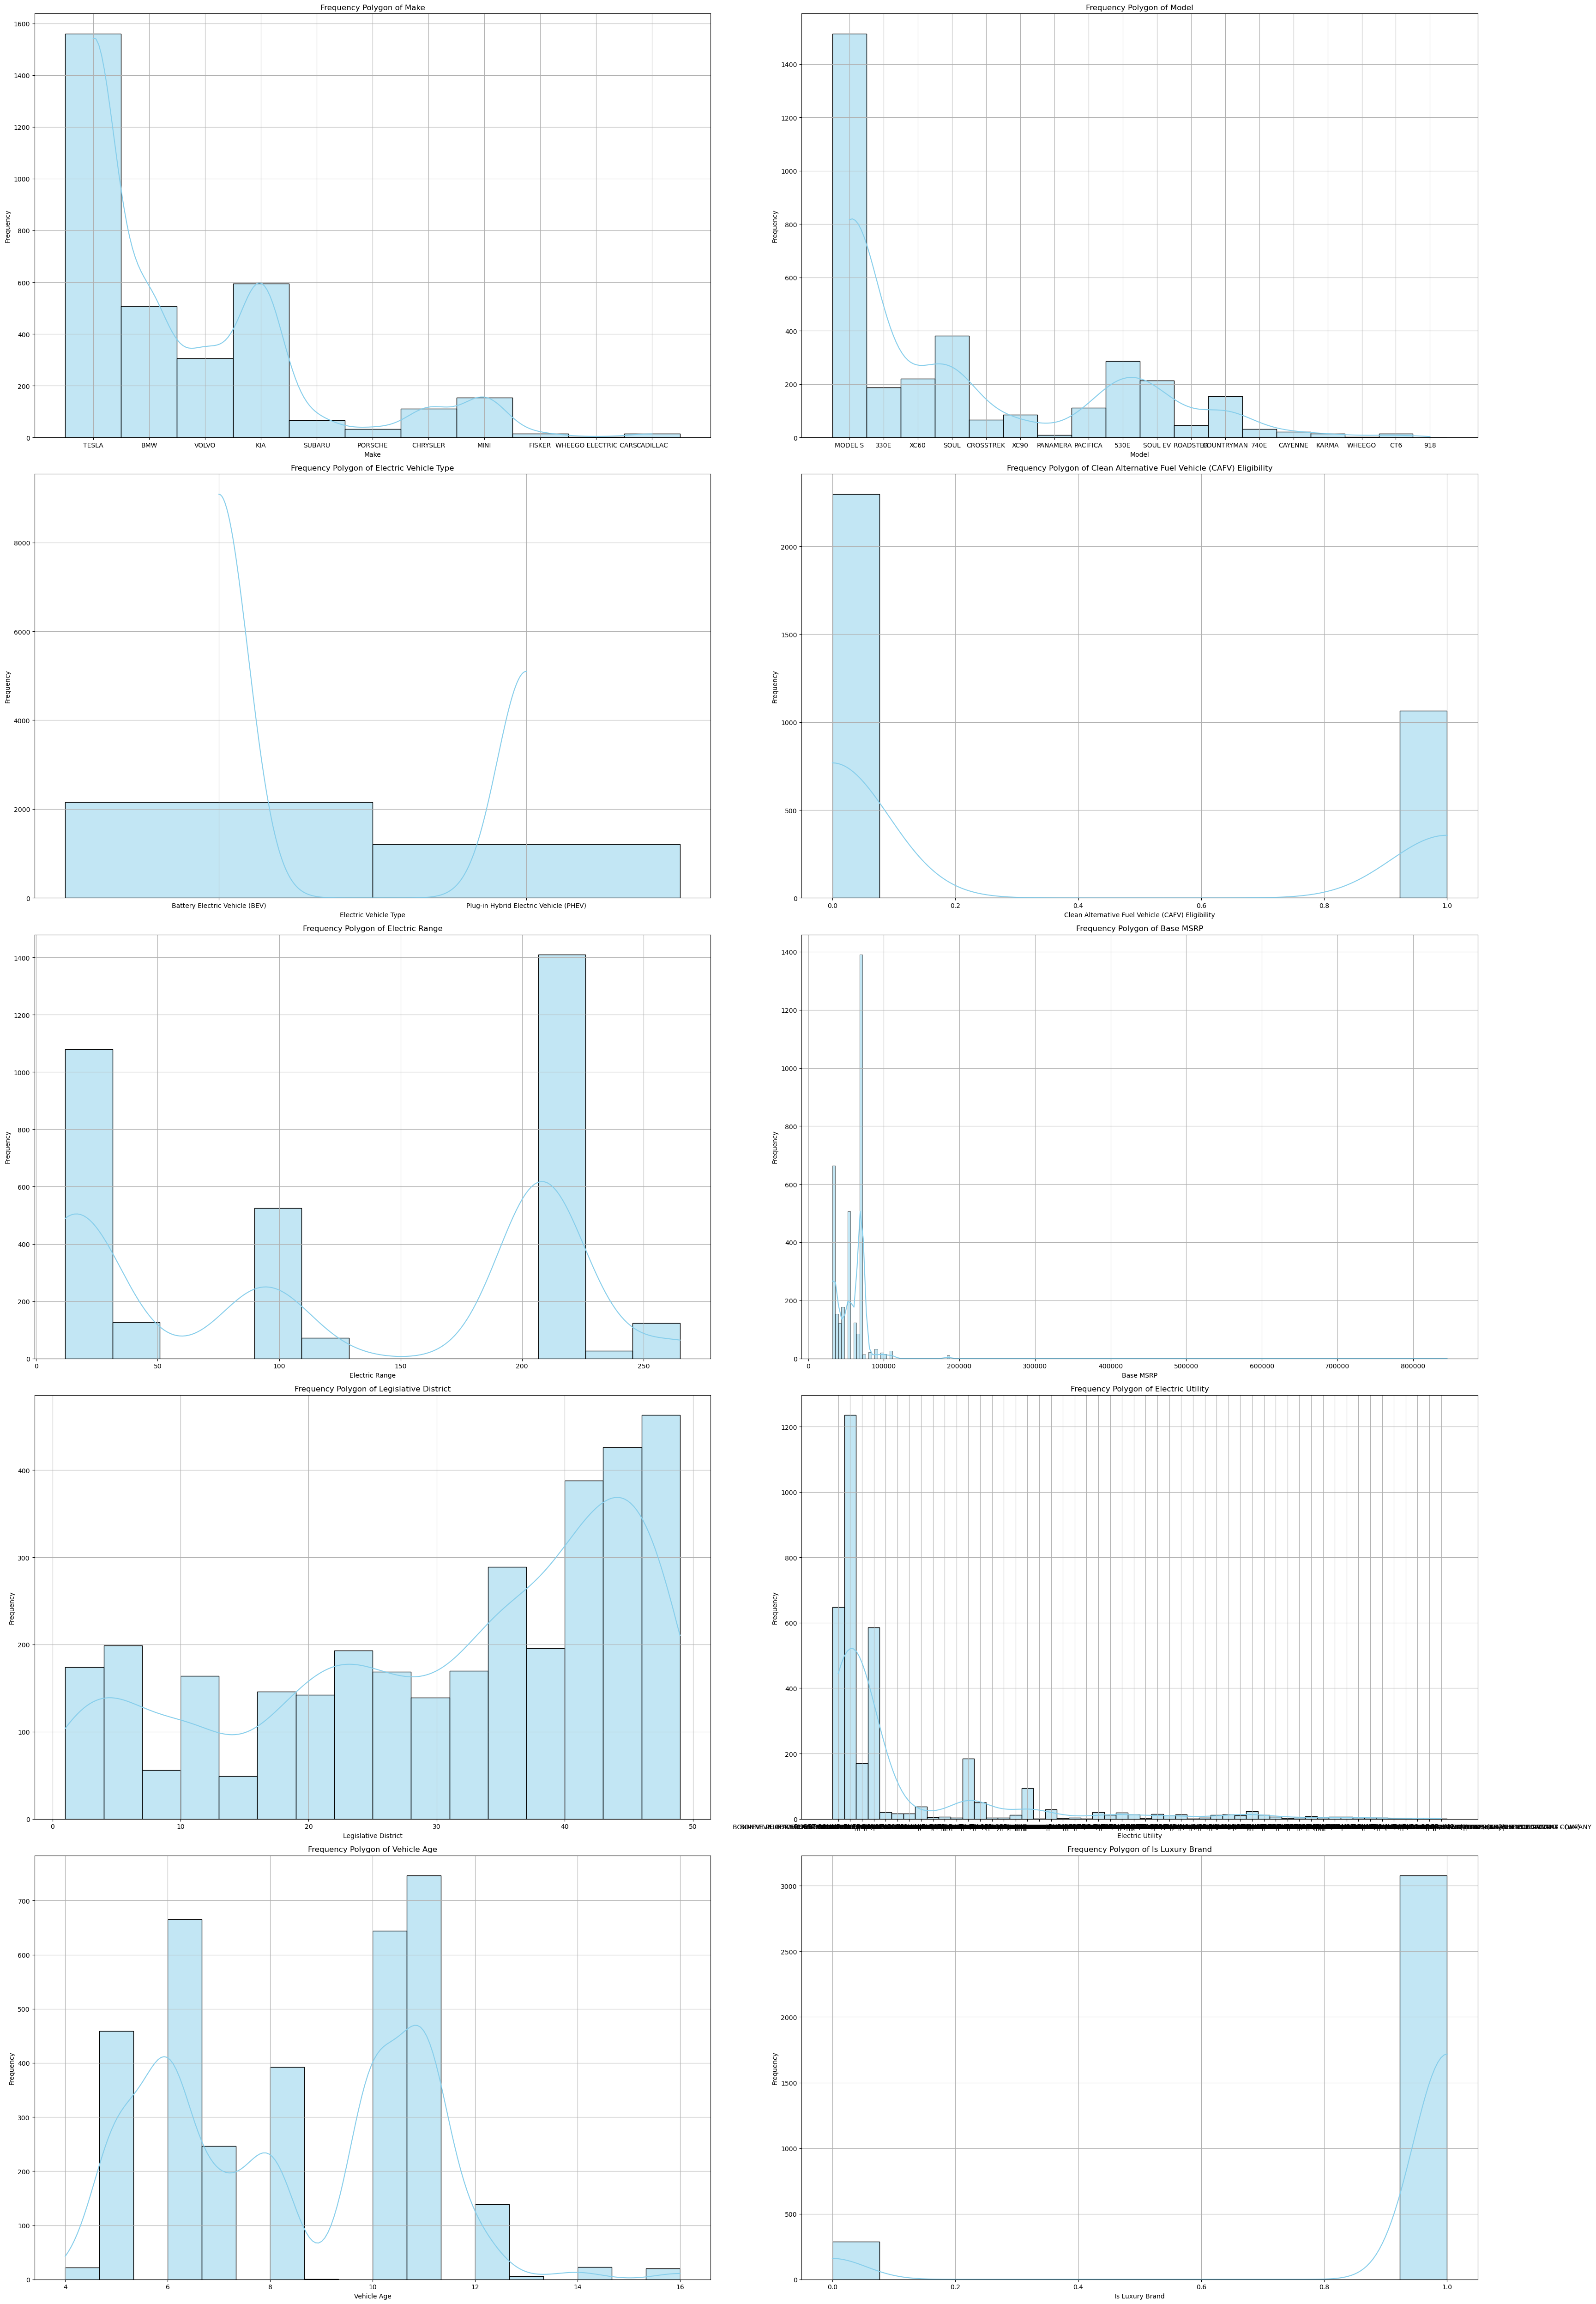

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ['Make', 'Model', 'Electric Vehicle Type', 
            'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
            'Electric Range', 'Base MSRP', 
            'Legislative District', 'Electric Utility', 
            'Vehicle Age', 'Is Luxury Brand']

# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_cols = 2
num_rows = (num_features - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 10*num_rows))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

for i, feature in enumerate(features):
    # Frequency Polygon
    sns.histplot(df2[feature], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Frequency Polygon of {feature}')
    axes[i].grid(True)


# Adjust layout
plt.tight_layout()
plt.show()

In [54]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset using Dask and specify the data types
dtypes = {'County': 'object', 
          'Postal Code': 'object', 
          'Model Year': 'float64', 
          'Make': 'object', 
          'Model': 'object', 
          'Electric Vehicle Type': 'object',
          'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'float64',
          'Electric Range': 'float64',
          'Base MSRP': 'float64',
          'Legislative District': 'float64',
          'Electric Utility': 'object',
          'Vehicle Age': 'float64',
          'Is Luxury Brand': 'float64'}

ddf = dd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/clean_dataset.csv", dtype=dtypes)

# Define the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Interactive Electric Vehicle Dashboard"),
    
    # Add dropdowns for selecting features
    html.Div([
        dcc.Dropdown(
            id='x-dropdown',
            options=[
                {'label': col, 'value': col} for col in ddf.columns
            ],
            value='Electric Range',
            clearable=False,
            style={'width': '48%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='y-dropdown',
            options=[
                {'label': col, 'value': col} for col in ddf.columns
            ],
            value='Base MSRP',
            clearable=False,
            style={'width': '48%', 'float': 'right', 'display': 'inline-block'}
        )
    ]),
    
    # Add scatter plot
    dcc.Graph(id='scatter-plot'),
    
    # Add histogram
    dcc.Graph(id='histogram'),
    
    # Add pie chart
    dcc.Graph(id='pie-chart'),

    # Add bar graph
    dcc.Graph(id='bar-graph'),

    # Add box plot
    dcc.Graph(id='box-plot'),

    # Add line plot
    dcc.Graph(id='line-plot'),

    # Add area plot
    dcc.Graph(id='area-plot'),

    # Add heatmap
    dcc.Graph(id='heatmap')
])

# Define callback to update scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-dropdown', 'value'),
     Input('y-dropdown', 'value')]
)
def update_scatter_plot(x_feature, y_feature):
    fig = px.scatter(ddf.compute(), x=x_feature, y=y_feature, color='Electric Vehicle Type', 
                     hover_name='Make', hover_data=['Model Year', 'Electric Range', 'Base MSRP'],
                     title=f'Scatter Plot: {y_feature} vs {x_feature}',
                     labels={x_feature: x_feature, y_feature: y_feature})
    return fig

# Define callback to update histogram
@app.callback(
    Output('histogram', 'figure'),
    [Input('x-dropdown', 'value')]
)
def update_histogram(x_feature):
    fig = px.histogram(ddf.compute(), x=x_feature, nbins=20, title=f'Histogram: {x_feature}',
                       labels={x_feature: x_feature, 'count': 'Frequency'})
    return fig

# Define callback to update pie chart
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('y-dropdown', 'value')]
)
def update_pie_chart(y_feature):
    fig = px.pie(ddf.compute(), names=y_feature, title=f'Pie Chart: Distribution of {y_feature}',
                 hole=0.3)
    return fig

# Define callback to update bar graph
@app.callback(
    Output('bar-graph', 'figure'),
    [Input('x-dropdown', 'value')]
)
def update_bar_graph(x_feature):
    bar_data = ddf[x_feature].value_counts().compute()
    fig = px.bar(x=bar_data.index, y=bar_data.values, title=f'Bar Graph: {x_feature}', 
                 labels={x_feature: x_feature, 'y': 'Count'})
    return fig



# Define callback to update box plot
@app.callback(
    Output('box-plot', 'figure'),
    [Input('x-dropdown', 'value')]
)
def update_box_plot(x_feature):
    fig = px.box(ddf.compute(), x=x_feature, title=f'Box Plot: {x_feature}', 
                 labels={x_feature: x_feature, 'y': 'Value'})
    return fig

# Define callback to update line plot
@app.callback(
    Output('line-plot', 'figure'),
    [Input('x-dropdown', 'value'),
     Input('y-dropdown', 'value')]
)
def update_line_plot(x_feature, y_feature):
    fig = px.line(ddf.compute(), x=x_feature, y=y_feature, title=f'Line Plot: {y_feature} vs {x_feature}', 
                  labels={x_feature: x_feature, y_feature: y_feature})
    return fig

# Define callback to update area plot
@app.callback(
    Output('area-plot', 'figure'),
    [Input('x-dropdown', 'value'),
     Input('y-dropdown', 'value')]
)
def update_area_plot(x_feature, y_feature):
    fig = px.area(ddf.compute(), x=x_feature, y=y_feature, title=f'Area Plot: {y_feature} vs {x_feature}', 
                  labels={x_feature: x_feature, y_feature: y_feature})
    return fig

# Define callback to update heatmap
@app.callback(
    Output('heatmap', 'figure'),
    [Input('x-dropdown', 'value'),
     Input('y-dropdown', 'value')]
)
def update_heatmap(x_feature, y_feature):
    fig = px.imshow(ddf.compute().pivot_table(index=x_feature, columns=y_feature), 
                    labels={'x': x_feature, 'y': y_feature})
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [55]:
# Dimensionality Reduction.

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df1 contains your dataset with numeric features

# Selecting numeric features for PCA
numeric_features = ddf.select_dtypes(include=['int64', 'float64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[numeric_features])

# Applying PCA
pca = PCA(n_components=4)  # Specify the number of components you want to retain
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame to visualize the results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
print(pca_df.head())  # Display the transformed data

       PCA1      PCA2      PCA3      PCA4
0  1.556093 -0.408626  1.161561  0.093105
1 -1.794899  0.282176 -1.206265  0.644373
2  1.583671  0.093212  0.105939  0.040738
3  1.996461  0.477277 -0.529938 -0.068637
4  1.601515  0.417931 -0.577110  0.006853


In [57]:
pca_df

PCA1      PCA2      PCA3      PCA4
0     1.556093 -0.408626  1.161561  0.093105
1    -1.794899  0.282176 -1.206265  0.644373
2     1.583671  0.093212  0.105939  0.040738
3     1.996461  0.477277 -0.529938 -0.068637
4     1.601515  0.417931 -0.577110  0.006853
...        ...       ...       ...       ...
3358  1.955905 -0.260721  1.022446  0.008374
3359 -3.493953  1.686698 -0.074403 -2.116392
3360  1.614493  0.654090 -1.073873 -0.017790
3361  1.951039 -0.349280  1.208732  0.017615
3362 -3.414608  2.905715  0.591203 -0.962471

[3363 rows x 4 columns]

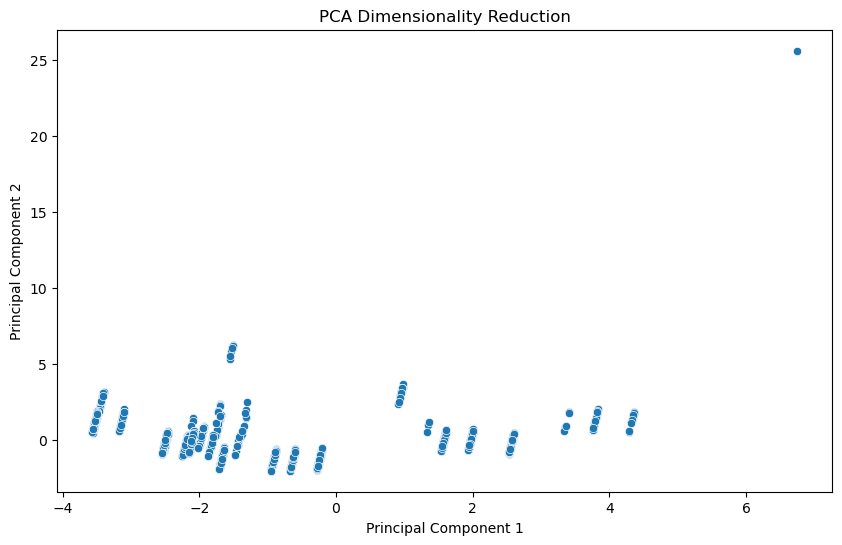

In [58]:
# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

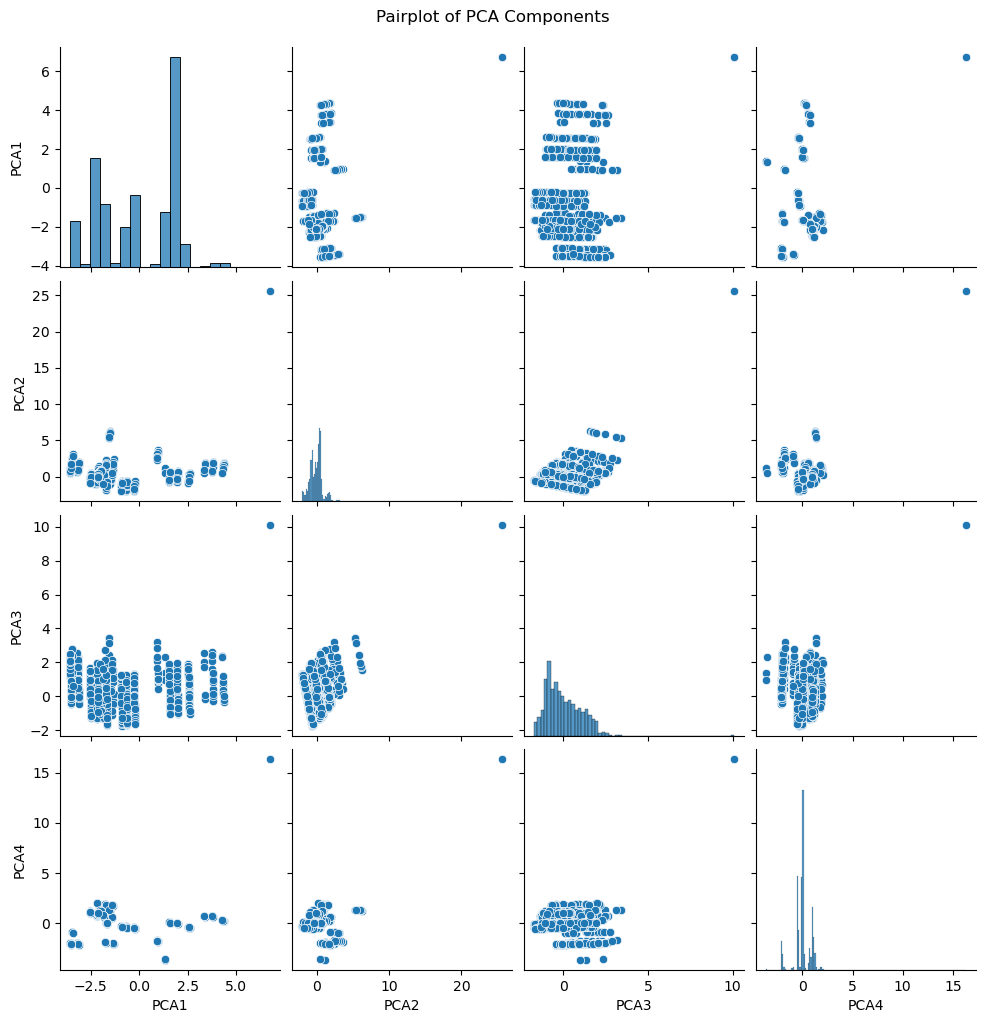

In [59]:
import seaborn as sns

# Plotting pairplot for all PCA components
sns.pairplot(pca_df)
plt.suptitle('Pairplot of PCA Components', y=1.02)
plt.show()

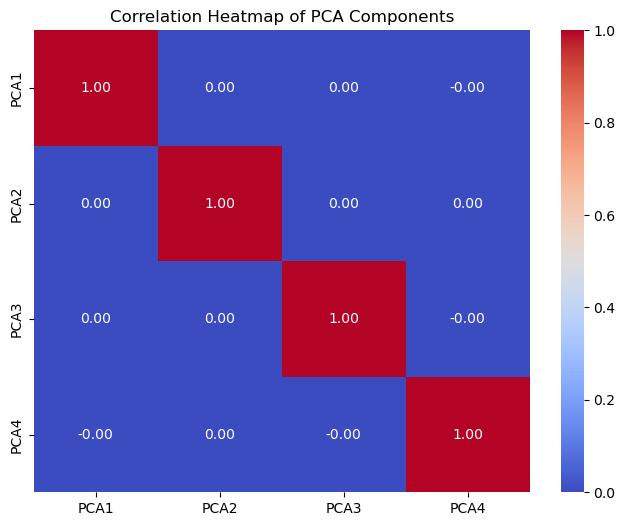

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = pca_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of PCA Components')
plt.show()

In [61]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df1 contains your dataset with numeric features

# Selecting numeric features for PCA
numeric_features = ddf.select_dtypes(include=['int64', 'float64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[numeric_features])

# Applying PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate the correlation matrix between principal components
pca_corr = pd.DataFrame(pca_result).corr()

# Display the correlation matrix
print("Correlation Matrix between Principal Components:")
pca_corr

Correlation Matrix between Principal Components:


0             1             2             3             4  \
0  1.000000e+00  4.731081e-17 -1.849297e-17  7.371007e-17  2.889920e-17   
1  4.731081e-17  1.000000e+00 -5.506418e-16  6.162041e-16  3.412085e-16   
2 -1.849297e-17 -5.506418e-16  1.000000e+00  6.907374e-17  3.881163e-16   
3  7.371007e-17  6.162041e-16  6.907374e-17  1.000000e+00  2.507575e-16   
4  2.889920e-17  3.412085e-16  3.881163e-16  2.507575e-16  1.000000e+00   
5 -3.326304e-17  1.174665e-16  2.448669e-16 -2.736567e-16  2.916532e-16   
6  1.321415e-16 -5.474931e-17  1.388946e-16  6.580812e-17 -6.528461e-17   

              5             6  
0 -3.326304e-17  1.321415e-16  
1  1.174665e-16 -5.474931e-17  
2  2.448669e-16  1.388946e-16  
3 -2.736567e-16  6.580812e-17  
4  2.916532e-16 -6.528461e-17  
5  1.000000e+00  1.431397e-17  
6  1.431397e-17  1.000000e+00

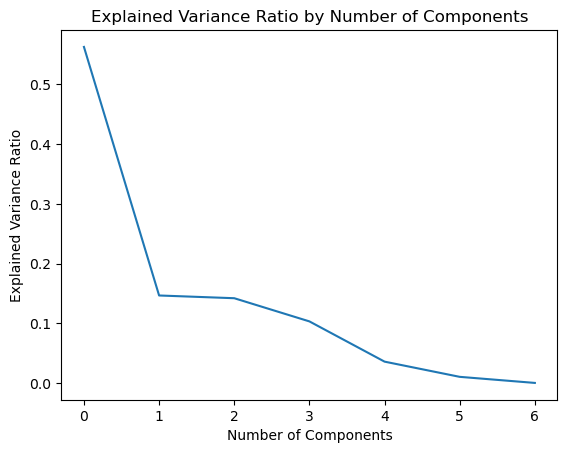

In [62]:
# Noise Reduction:
# Assuming pca_result contains the result of PCA transformation

# Visualize the explained variance ratio
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

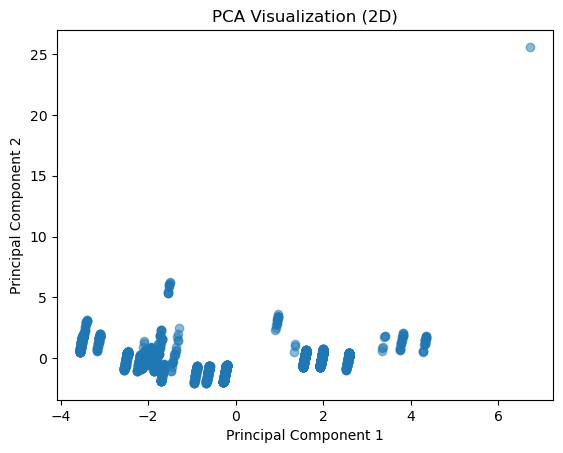

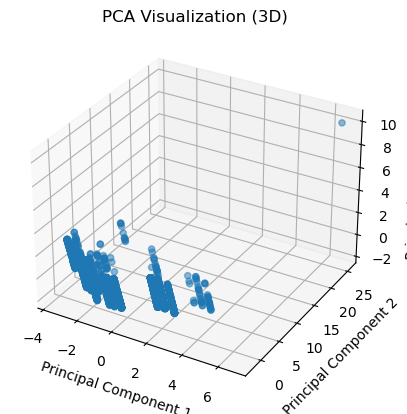

In [63]:
# visualization
# Assuming pca_result contains the result of PCA transformation

# Plot PCA components in 2D or 3D
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2D)')
plt.show()

# For 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization (3D)')
plt.show()

In [64]:
# Feature Selection

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Assuming df2 is your DataFrame
df2 = pd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/clean_dataset.csv")  # You should replace "your_dataset.csv" with your actual file path if loading from a CSV file

# Convert categorical variables into numerical labels
label_encoder = LabelEncoder()
df2['Electric Vehicle Type'] = label_encoder.fit_transform(df2['Electric Vehicle Type'])
df2['Make'] = label_encoder.fit_transform(df2['Make'])

# Select features and target
X = df2[['Model Year', 'Make', 'Electric Range', 'Base MSRP', 'Legislative District']]
y = df2['Clean Alternative Fuel Vehicle (CAFV) Eligibility']


In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with f_classif scoring function (ANOVA F-value between label/feature for classification tasks)
k_best = SelectKBest(score_func=f_classif, k=3)

# Fit SelectKBest to training data and transform it
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using selected features
knn.fit(X_train_kbest, y_train)

# Make predictions on the test data using selected features
y_pred = knn.predict(X_test_kbest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)
print("Selected Features:", X.columns[k_best.get_support()])


Accuracy with selected features: 1.0
Selected Features: Index(['Model Year', 'Make', 'Electric Range'], dtype='object')


C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\1837273610.py:166: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



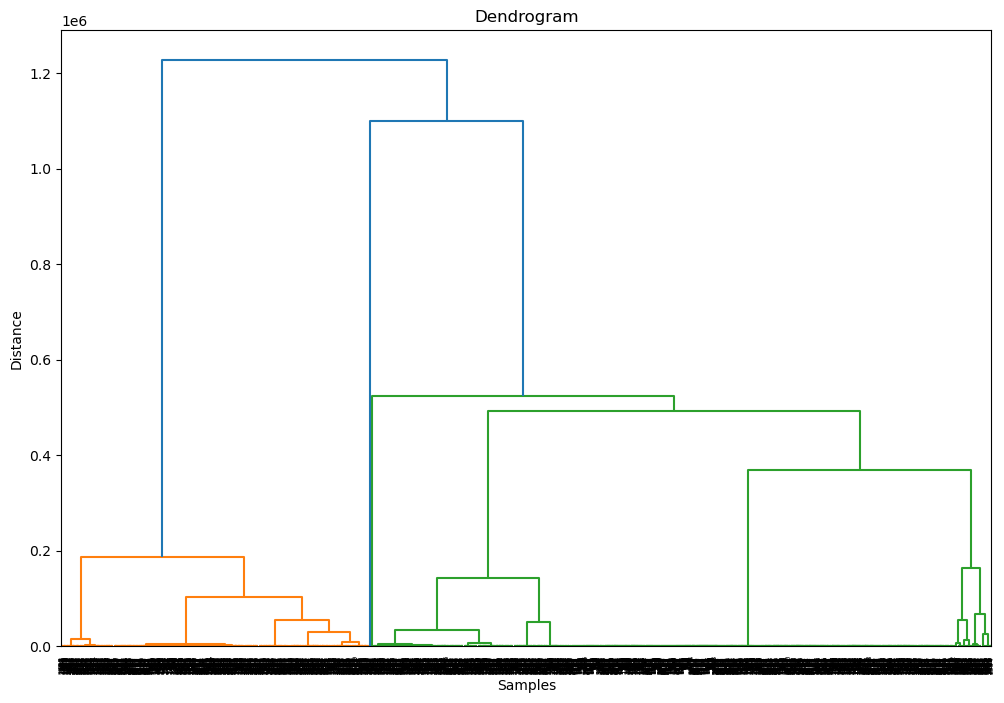

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming df2 is your DataFrame
df2 = pd.read_csv("C:/Ritik Sharma/VIT  2nd SEMESTER/EDA J PROJECT/clean_dataset.csv")  # You should replace "your_dataset.csv" with your actual file path if loading from a CSV file

# One-hot encode the 'Make' column
df2 = pd.get_dummies(df2, columns=['Make'])

# Select features
X = df2[['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']]

# Calculate the distances between each pair of samples
Z = hierarchy.linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [68]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming df2 is your DataFrame containing the dataset

# Drop any non-numeric columns or handle them separately
numeric_columns = df2.select_dtypes(include=['number']).columns
X_numeric = df2[numeric_columns]

# Encode categorical variables
categorical_columns = df2.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])

# Define your features (independent variables) and target variable
# For demonstration purposes, let's assume the target variable is 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
X = df2.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
y = df2['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Apply chi-square feature selection
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores)

# Get selected features
selected_features = fit.transform(X)
print(selected_features.shape)


                      Feature          Score
0                      County      31.541272
1                 Postal Code     185.209996
2                  Model Year       5.462177
3                       Model    1265.951520
4       Electric Vehicle Type    1780.989285
5              Electric Range  145995.344086
6                   Base MSRP  464565.444786
7        Legislative District      13.562450
8            Electric Utility      34.007947
9                 Vehicle Age    1309.507885
10            Is Luxury Brand      40.051115
11                   Make_BMW    1092.475610
12              Make_CADILLAC       6.497170
13              Make_CHRYSLER      51.513278
14                Make_FISKER       6.961254
15                   Make_KIA     275.665651
16                  Make_MINI     331.836773
17               Make_PORSCHE      71.107880
18                Make_SUBARU     144.370544
19                 Make_TESLA     723.970396
20                 Make_VOLVO     657.209193
21  Make_W

In [69]:
import pandas as pd

# Assuming df2 is your DataFrame containing the dataset
# You may need to preprocess the data to convert categorical variables to numerical format if needed

# Define your features (independent variables) and target variable
# For demonstration purposes, let's assume the target variable is 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
X = df2.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
y = df2['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Calculate Pearson correlation coefficients between features and target variable
correlation_values = X.corrwith(y)

# Convert correlation values to DataFrame for better organization
correlation_df = pd.DataFrame({'Feature': correlation_values.index, 'Correlation with Target': correlation_values.values})

# Sort the DataFrame by absolute correlation values in descending order
correlation_df['Absolute Correlation'] = correlation_df['Correlation with Target'].abs()  # Absolute values for sorting
correlation_df.sort_values(by='Absolute Correlation', ascending=False, inplace=True)

# Print the correlation results
print(correlation_df)

                      Feature  Correlation with Target  Absolute Correlation
4       Electric Vehicle Type                 0.909301              0.909301
5              Electric Range                -0.809810              0.809810
9                 Vehicle Age                -0.730987              0.730987
2                  Model Year                 0.730987              0.730987
19                 Make_TESLA                -0.633669              0.633669
11                   Make_BMW                 0.618482              0.618482
20                 Make_VOLVO                 0.463589              0.463589
3                       Model                -0.411136              0.411136
10            Is Luxury Brand                -0.374218              0.374218
16                  Make_MINI                 0.321571              0.321571
15                   Make_KIA                -0.315522              0.315522
18                Make_SUBARU                 0.209289              0.209289

In [70]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
from tabulate import tabulate

# Assuming df2 is your DataFrame containing the dataset
# Define your features (independent variables) and target variable
X = df2.drop(columns=['Vehicle Age', 'Is Luxury Brand', 'Electric Range'])  # Remove target variables from features
target_variables = ['Vehicle Age', 'Is Luxury Brand', 'Electric Range']  # List of target variables

correlation_tables = {}

for target_var in target_variables:
    correlation_values = X.corrwith(df2[target_var])
    correlation_df = pd.DataFrame({'Feature': correlation_values.index, 'Correlation with ' + target_var: correlation_values.values})
    correlation_df['Absolute Correlation'] = correlation_df['Correlation with ' + target_var].abs()
    correlation_df.sort_values(by='Absolute Correlation', ascending=False, inplace=True)
    correlation_tables[target_var] = correlation_df

# Print correlation tables for different target variables
for target_var, correlation_df in correlation_tables.items():
    print(f"Correlation table for {target_var}:")
    print(tabulate(correlation_df, headers='keys', tablefmt='grid'))
    print("\n")


Correlation table for Vehicle Age:
+----+---------------------------------------------------+--------------------------------+------------------------+
|    | Feature                                           |   Correlation with Vehicle Age |   Absolute Correlation |
+====+===================================================+================================+========================+
|  2 | Model Year                                        |                   -1           |            1           |
+----+---------------------------------------------------+--------------------------------+------------------------+
| 17 | Make_TESLA                                        |                    0.890469    |            0.890469    |
+----+---------------------------------------------------+--------------------------------+------------------------+
|  4 | Electric Vehicle Type                             |                   -0.793498    |            0.793498    |
+----+-----------------------

In [72]:
# Assuming X is your DataFrame containing all the features
correlation_matrix = df2.corr()

# Print correlation matrix in table form
print("Correlation Matrix:")
display(correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2))


Correlation Matrix:


C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\988377122.py:6: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [73]:
import statsmodels.api as sm

def forward_selection_simple_linear(X, y, significance_level=0.05):
    selected_features = []
    num_features = X.shape[1]
    for i in range(num_features):
        remaining_features = [feature for feature in X.columns if feature not in selected_features]
        p_values = []
        for feature in remaining_features:
            X_temp = X[selected_features + [feature]]
            X_temp = sm.add_constant(X_temp)
            model = sm.OLS(y, X_temp).fit()
            p_value = model.pvalues[feature]
            p_values.append((feature, p_value))
        best_feature, best_p_value = min(p_values, key=lambda x: x[1])
        if best_p_value < significance_level:
            selected_features.append(best_feature)
        else:
            break
    return selected_features

# Example usage:
selected_features_forward = forward_selection_simple_linear(X, y)
print("Selected features (Forward Selection with Simple Linear Regression):", selected_features_forward)

Selected features (Forward Selection with Simple Linear Regression): ['Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'County', 'Legislative District', 'Postal Code', 'Base MSRP', 'Electric Utility']


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df2 is your DataFrame containing the dataset
# Define your features (independent variables) and target variable
X = df2[['Base MSRP', 'Electric Range', 'Electric Utility']]  # Features
y = df2['Vehicle Age']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to store the best feature and its corresponding MSE
best_feature = None
lowest_mse = float('inf')

# Loop through each feature and calculate MSE
for feature in X.columns:
    # Fit linear regression model using the current feature
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[[feature]])
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Feature: {feature}")
    print(f"MSE: {mse}\n")

    # Check if the current MSE is the lowest encountered so far
    if mse < lowest_mse:
        lowest_mse = mse
        best_feature = feature

# Print the best feature and its corresponding MSE
print("Best Feature:", best_feature)
print("MSE:", lowest_mse)


Feature: Base MSRP
MSE: 4.61065838560137

Feature: Electric Range
MSE: 0.7799585910598922

Feature: Electric Utility
MSE: 6.345926593040526

Best Feature: Electric Range
MSE: 0.7799585910598922


In [75]:
import itertools

# Initialize variables to store the best features and its corresponding MSE
best_features = None
lowest_mse = float('inf')

# Loop through each combination of two features and calculate MSE
for feature_pair in itertools.combinations(X.columns, 2):
    # Fit linear regression model using the current features
    model = LinearRegression()
    model.fit(X_train[list(feature_pair)], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[list(feature_pair)])
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Features: {feature_pair}")
    print(f"MSE: {mse}\n")

    # Check if the current MSE is the lowest encountered so far
    if mse < lowest_mse:
        lowest_mse = mse
        best_features = feature_pair

# Print the best features and their corresponding MSE
print("Best Features:", best_features)
print("MSE:", lowest_mse)


Features: ('Base MSRP', 'Electric Range')
MSE: 0.7331659090181231

Features: ('Base MSRP', 'Electric Utility')
MSE: 4.600467700113733

Features: ('Electric Range', 'Electric Utility')
MSE: 0.7798374721503019

Best Features: ('Base MSRP', 'Electric Range')
MSE: 0.7331659090181231


In [76]:
import itertools

# Initialize variables to store the best features and corresponding MSE
best_features = None
lowest_mse = float('inf')

# Loop through combinations of three features and calculate MSE
for features in itertools.combinations(X.columns, 3):
    # Fit linear regression model using the current set of features
    model = LinearRegression()
    model.fit(X_train[list(features)], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[list(features)])
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Features: {features}")
    print(f"MSE: {mse}\n")

    # Check if the current MSE is the lowest encountered so far
    if mse < lowest_mse:
        lowest_mse = mse
        best_features = features

# Print the best features and their corresponding MSE
print("Best Features:", best_features)
print("MSE:", lowest_mse)

Features: ('Base MSRP', 'Electric Range', 'Electric Utility')
MSE: 0.732858221045177

Best Features: ('Base MSRP', 'Electric Range', 'Electric Utility')
MSE: 0.732858221045177


In [77]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training features and target variable

# Step 1: Start with all features included
selected_features = X_train.columns.tolist()

# Step 6: Stopping criterion (e.g., continue until a predefined number of features is reached)
while len(selected_features) > 0:
    # Step 2: Fit a model using all the features
    X_train_with_const = sm.add_constant(X_train[selected_features])  # Add a constant for the intercept
    model = sm.OLS(y_train, X_train_with_const)
    results = model.fit()
    
    # Step 3: Determine the least significant feature
    p_values = results.pvalues[1:]  # Exclude the constant
    least_significant_feature = p_values.idxmax()  # Find the feature with the highest p-value
    
    # Step 4: Remove the least significant feature
    if p_values.max() > 0.05:  # Stopping criterion based on p-value (adjust as needed)
        selected_features.remove(least_significant_feature)
    else:
        break

# Step 5: Evaluate the model with the remaining features
X_train_with_const = sm.add_constant(X_train[selected_features])  # Add a constant for the intercept
final_model = sm.OLS(y_train, X_train_with_const)
final_results = final_model.fit()

# Print the final selected features and model summary
print("Selected Features:", selected_features)
print(final_results.summary())


Selected Features: ['Base MSRP', 'Electric Range']
                            OLS Regression Results                            
Dep. Variable:            Vehicle Age   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     9306.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:50:37   Log-Likelihood:                -3457.5
No. Observations:                2690   AIC:                             6921.
Df Residuals:                    2687   BIC:                             6939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [78]:
import numpy as np

# Calculate the mean of non-zero values in 'Base MSRP'
mean_base_msrp = df2.loc[df2['Base MSRP'] != 0, 'Base MSRP'].mean()

# Replace 0 values with the mean
df2['Base MSRP'].replace(0, mean_base_msrp, inplace=True)

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from sklearn.preprocessing import LabelEncoder

# DataFrame columns
columns = ['County', 'Postal Code', 'Model Year', 'Make', 'Model',
           'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
           'Electric Range', 'Base MSRP', 'Legislative District', 'Electric Utility']

# Create an empty DataFrame to store encoded data
encoded_df = pd.DataFrame()

# Initialize Bayesian model
model = BayesianModel()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through columns
for column in columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Encode the categorical column
        encoded_df[column] = label_encoder.fit_transform(df[column])
        # Add the edge to the Bayesian model (assuming the first column is the parent)
        if encoded_df.columns[-1] != encoded_df.columns[0]:
            model.add_edge(encoded_df.columns[0], encoded_df.columns[-1])

# Fit the Bayesian network
model.fit(encoded_df, estimator=BayesianEstimator)

# Print the structure of the Bayesian network
print("Bayesian Network Structure:")
print(model.edges())


Bayesian Network Structure:
[('County', 'Make'), ('County', 'Model'), ('County', 'Electric Vehicle Type'), ('County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'), ('County', 'Electric Utility')]


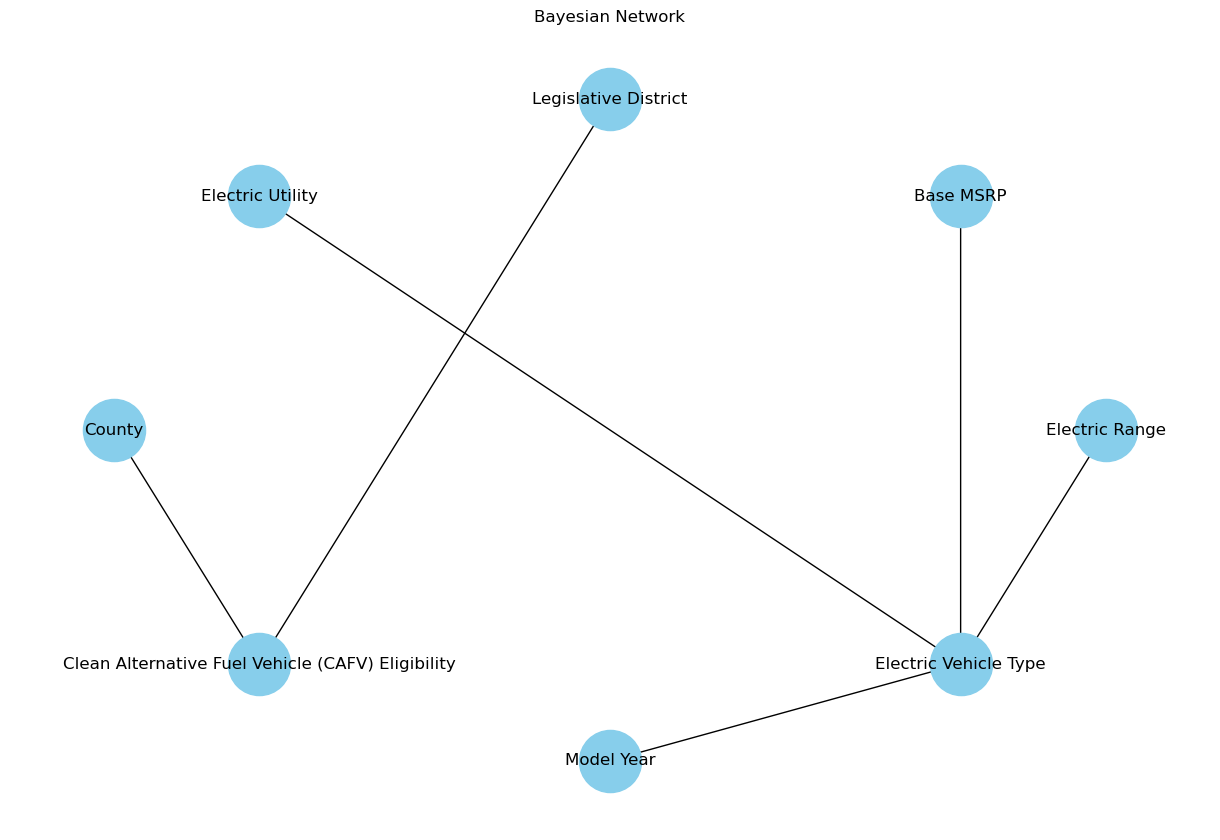

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel

# Assuming df is your DataFrame containing the dataset
# Define your features (independent variables) and target variable
X = df[['County', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP', 'Legislative District', 'Electric Utility']]
y = df[['Clean Alternative Fuel Vehicle (CAFV) Eligibility']]  # Target variables

# Initialize Bayesian model
model = BayesianModel()

# Define the structure of the Bayesian network based on prior knowledge or assumptions
# For example, let's assume dependencies between variables as follows:
# County -> Clean Alternative Fuel Vehicle (CAFV) Eligibility
# Model Year -> Electric Vehicle Type
# Electric Range -> Electric Vehicle Type
# Base MSRP -> Electric Vehicle Type
# Legislative District -> Clean Alternative Fuel Vehicle (CAFV) Eligibility
# Electric Utility -> Electric Vehicle Type
# Note: This structure should be defined based on domain knowledge or data analysis.
model.add_edges_from([('County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'),
                      ('Model Year', 'Electric Vehicle Type'),
                      ('Electric Range', 'Electric Vehicle Type'),
                      ('Base MSRP', 'Electric Vehicle Type'),
                      ('Legislative District', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'),
                      ('Electric Utility', 'Electric Vehicle Type')])

# Draw the Bayesian network
plt.figure(figsize=(12, 8))
try:
    pos = nx.shell_layout(model)
    nx.draw(model, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, arrows=False)
    plt.title("Bayesian Network")
    plt.show()
except Exception as e:
    print("An error occurred while drawing the network:", e)


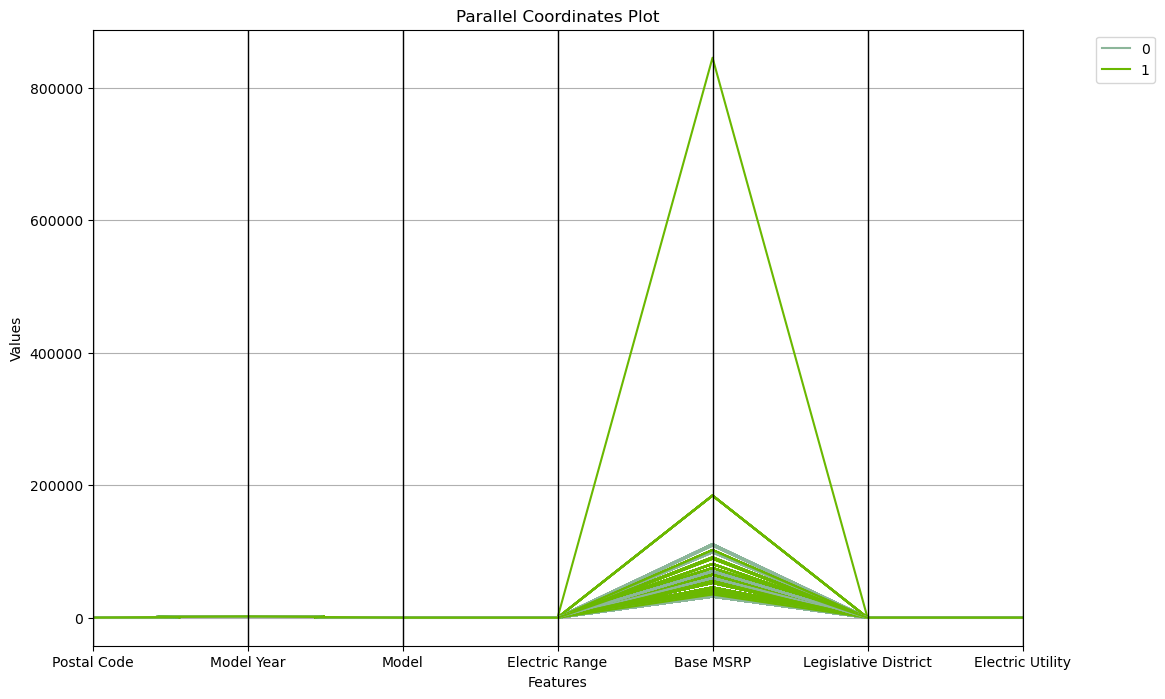

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns for the parallel coordinates plot
columns = ['Postal Code', 'Model Year', 'Model', 'Electric Vehicle Type','Electric Range', 'Base MSRP', 'Legislative District', 'Electric Utility']

# Draw the parallel coordinates plot
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(df2[columns], 'Electric Vehicle Type')  # Corrected the column name to 'Electric Range'
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [82]:
total_electric = df.pivot_table(columns=['Model Year'], aggfunc='size')
print(total_electric)

Model Year
1997        1
1998        1
1999        3
2000        7
2002        2
2003        1
2008       20
2010       23
2011      782
2012     1630
2013     4455
2014     3539
2015     4833
2016     5518
2017     8523
2018    14151
2019    10860
2020    11425
2021    18774
2022    27592
2023    51351
2024     3309
dtype: int64


In [83]:
Ncars = total_electric.reset_index()
Ncars = Ncars.rename(columns={"Model Year": "year", 0: "total_cars"})

In [84]:
# Drop 2024 cause there are not enough values
Ncars = Ncars.drop([21])
Ncars

year  total_cars
0   1997           1
1   1998           1
2   1999           3
3   2000           7
4   2002           2
5   2003           1
6   2008          20
7   2010          23
8   2011         782
9   2012        1630
10  2013        4455
11  2014        3539
12  2015        4833
13  2016        5518
14  2017        8523
15  2018       14151
16  2019       10860
17  2020       11425
18  2021       18774
19  2022       27592
20  2023       51351

In [85]:
#Store columns in x and y variables

x = Ncars["year"]
y = Ncars["total_cars"]

OldCars = Ncars.iloc[:11, :]
NewCars = Ncars.iloc[11:, :]

x1 = OldCars["year"]
y1 = OldCars["total_cars"]

x2 = NewCars["year"]
y2 = NewCars["total_cars"]

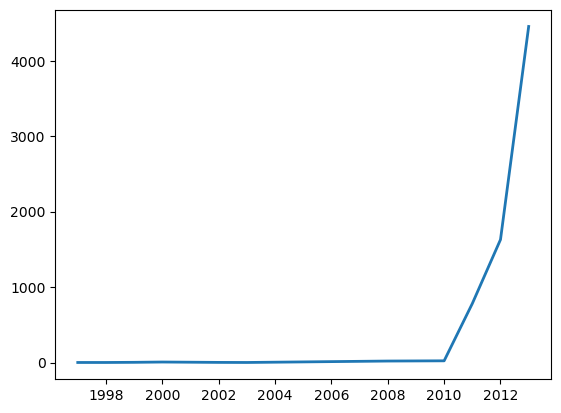

In [86]:
fig, ax = plt.subplots()

ax.plot(x1, y1, linewidth=2.0)

plt.show()

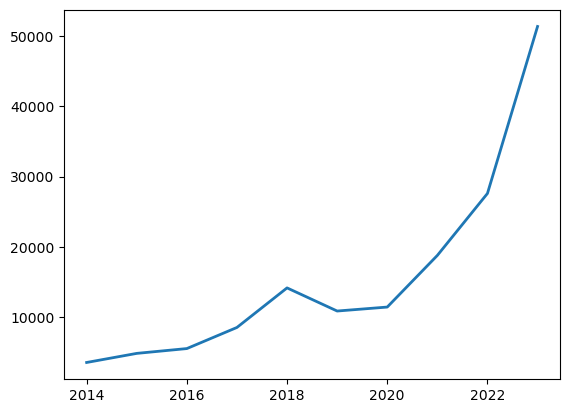

In [87]:
fig, ax = plt.subplots()

ax.plot(x2, y2, linewidth=2.0)

plt.show()

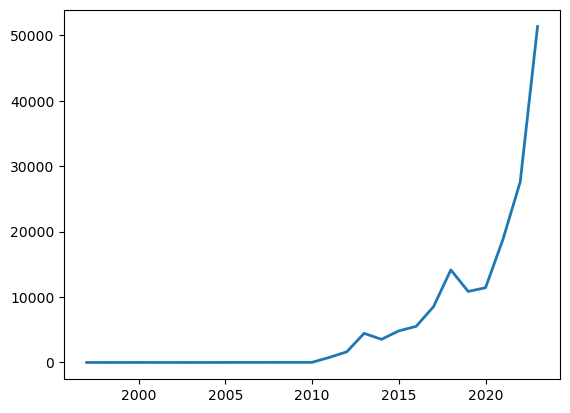

In [88]:
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

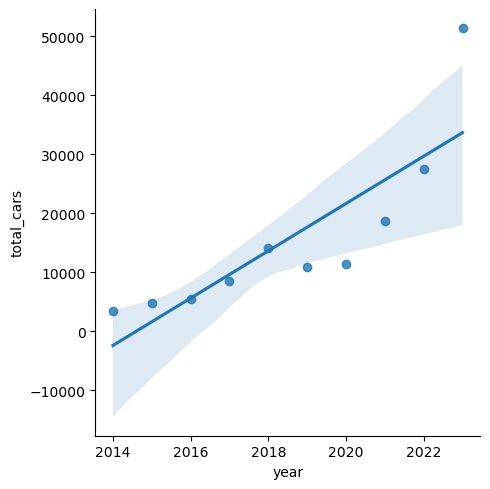

In [89]:
sns.lmplot(x="year", 
           y="total_cars",
          data = NewCars)

In [90]:
X_train = x.to_numpy()
y_train = y.to_numpy()

In [91]:
X_train= X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [92]:
def polynomial_function(degree):
    
    x = X_train
    
    y = y_train

    df = pd.DataFrame({'x':[x], 'y':[y]}).T
    df.columns = [''] * len(df.columns)
    display(df)
    
    return x, y

In [93]:
def fit(x, y, degree=2):
    
    x = np.array(x).reshape(-1, 1)

    poly = PolynomialFeatures(degree)
    poly_features = poly.fit_transform(x.reshape(-1, 1))

    lr = LR()
    lr.fit(poly_features, y)
    y_pred = lr.predict(poly_features)
    plt.plot(x, y_pred)
    plt.scatter(x, y)
    plt.title(f'Degree = {degree}')
    plt.show()

x  [[1997], [1998], [1999], [2000], [2002], [2003...
y  [[1], [1], [3], [7], [2], [1], [20], [23], [78...

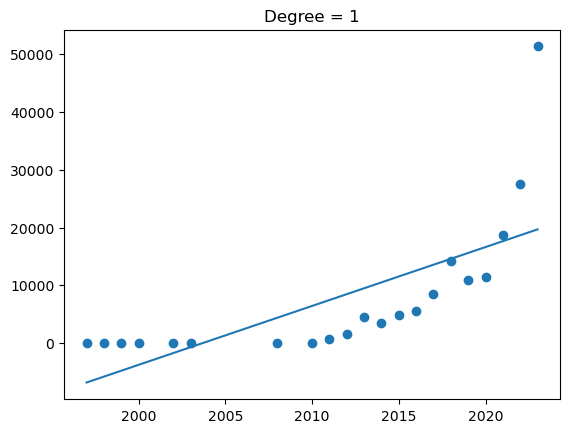

In [94]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=1)

x  [[1997], [1998], [1999], [2000], [2002], [2003...
y  [[1], [1], [3], [7], [2], [1], [20], [23], [78...

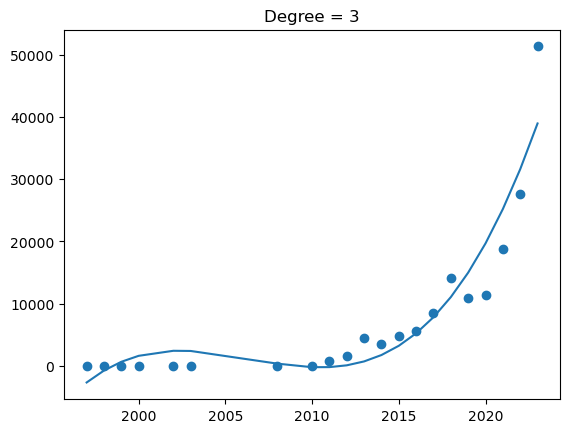

In [95]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=3)

x  [[1997], [1998], [1999], [2000], [2002], [2003...
y  [[1], [1], [3], [7], [2], [1], [20], [23], [78...

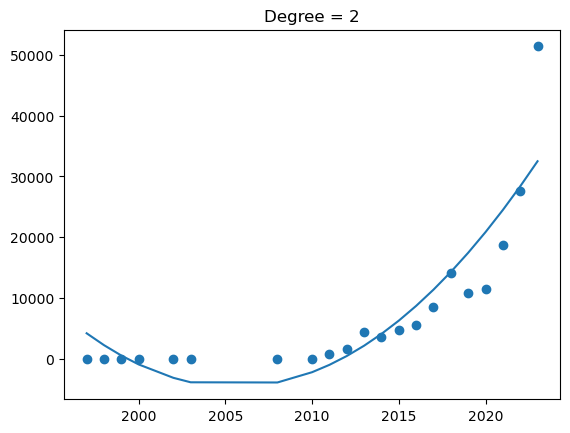

In [96]:
x, y = polynomial_function(degree=2)
fit(x, y, degree=2)

In [97]:
# "Determining the Optimal Degree for Polynomial Regression". 
# the main purpose of the code, which is to find the best degree for a 
# Polynomial Regression model that minimizes the Mean Squared Error (MSE) 
# on the validation set.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

min_mse = float('inf')
best_degree = 0

# Try degrees from 1 to 10
for degree in range(1, 11):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_val_poly = poly.transform(X_val.reshape(-1, 1))
    
    lr = LR()
    lr.fit(X_train_poly, y_train)
    
    y_pred = lr.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_pred)
    
    if mse < min_mse:
        min_mse = mse
        best_degree = degree

print(f'The best degree is {best_degree} with MSE: {min_mse}')


The best degree is 10 with MSE: 35570899.08218243


In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features to higher degree features.
X_train_transform = poly.fit_transform(X_train)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_transform, y_train)

# Predicting on training data-set
y_train_predicted = poly_model.predict(X_train_transform)

# Predict the number of cars for future years
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
future_years_transform = poly.fit_transform(future_years)
predictions = poly_model.predict(future_years_transform)

# Print the predicted number of cars
for year, prediction in zip(future_years, predictions):
    print(f"The predicted number of cars in the year {year} is {prediction}")


The predicted number of cars in the year [2024] is [40584.77018535]
The predicted number of cars in the year [2025] is [45905.4836117]
The predicted number of cars in the year [2026] is [51522.51921761]


In [99]:
# Train the model as before
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_transform = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_transform, y_train)

# Ask the user for the year they're interested in
year = input("Enter the year you want to predict for: ")

# Make sure the year is in the correct format
future_year = np.array(int(year)).reshape(-1, 1)
future_year_transform = poly.fit_transform(future_year)

# Predict the number of cars for the entered year
prediction = poly_model.predict(future_year_transform)

print(f"The predicted number of cars in the year {year} is {prediction[0]}")


Enter the year you want to predict for: 2024
The predicted number of cars in the year 2024 is [40584.77018535]


C:\Users\sharm\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             total_cars   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -193.988
Date:                Fri, 26 Apr 2024   AIC                            399.976
Time:                        23:53:18   BIC                            405.950
Sample:                             0   HQIC                           401.142
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0684      0.216      4.957      0.000       0.646       1.491
ar.L2          0.0062      0.265      0.023      0.981      -0.513       0.525
ar.L3          0.0774      0.017      4.462      0.0

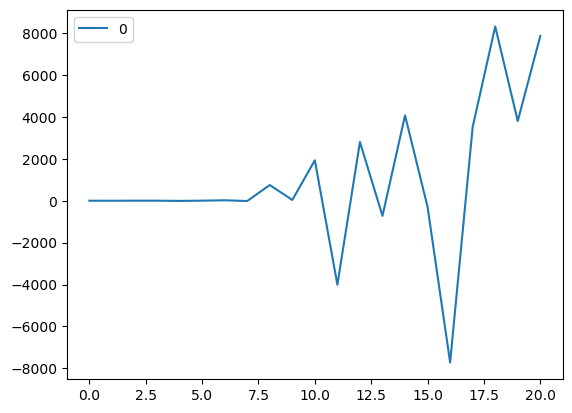

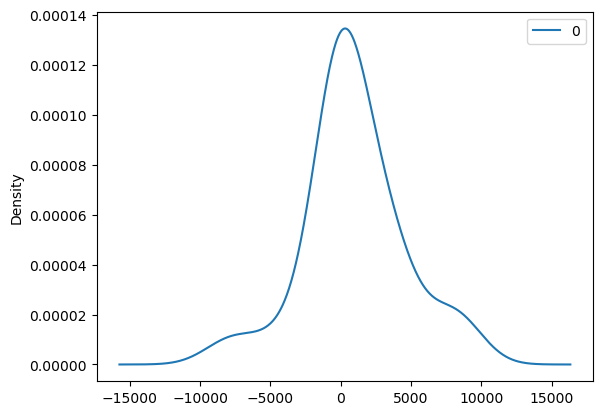

                 0
count    21.000000
mean    969.084405
std    3486.557462
min   -7720.478264
25%      -8.797337
50%       3.476790
75%    2803.799189
max    8317.490712


C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\1837273610.py:166: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\1837273610.py:166: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\1837273610.py:166: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\sharm\AppData\Local\Temp\ipykernel_10336\1837273610.py:166: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a

In [100]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Ncars' is your existing DataFrame and 'total_cars' is your label
y = Ncars['total_cars']

# Fit ARIMA model
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

# Print residuals
print(residuals.describe())

# Predict the future values
n_periods = 10  # for example, predict the next 3 periods
fc = model_fit.forecast(steps=n_periods)  # 95% conf

# Create a pandas series with the forecasted values
fc_series = pd.Series(fc)

# Plot the original data and the forecasted data
plt.figure(figsize=(10,8), dpi=1000)
plt.plot(Ncars.index, y, label='original')
plt.plot(range(Ncars.index[-1]+1, Ncars.index[-1] + n_periods + 1), fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Total Cars')
plt.legend(loc='upper left', fontsize=8)
plt.show()
